# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 - In applying various clustering algorithms to the dataset we can expect different segments to be formed i.e. segmentation purchasing habits and behaviors. After analyzing results we can infer, and determine, the makeup of these clusters. This will allow us to refine and prioritize marketing efforts for better outcomes.

### **The objective:**

 - We will be preprocessing our data and performing feature engineering. We may then begin scaling our customer data, reducing dimensionality, and segmenting the data using various clustering algorithms including K-Means, K-Medoids, Hierarchical, DBSCAN, & Gaussian Mixture Model. Models will be evaluated using silhouette scores and visual analysis, and hyperparameters will be evaluated and adjusted accordingly. Segmentation will be performed to determine customer behaviors (not demographics).

### **The key questions:**

- Which models provide satisfactory segmentation through distinct clusters? What customers/behaviors make up those clusters?

### **The problem formulation**:

- Through analysis and unsupervised learning methods we can better understand customer behaviors, spending habits, and spending methods. We will group these customers into a manageable number of segments for which each cluster receives a more targeted approach in future campaigns.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** data was collected in the year 2016.

### **Loading Libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To import DBSCAN
from sklearn.cluster import DBSCAN

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### **Let us load the data**

In [2]:
# loading the dataset
df = pd.read_csv("marketing_campaign.csv")

# Copying our dataset 
data = df.copy()

### **Check the shape of the data**

In [3]:
# Checking dimensions
data.shape

(2240, 27)

In [4]:
# Viewing first 5 rows
data.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [5]:
# Viewing last 5 rows
data.tail(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

### **Let us check the data types and and missing values of each column** 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
# Finding the percentage of missing values in each column of the data
def missing_values_percentage(data):
    
    # Calculating the number of missing values in each column
    missing_counts = data.isnull().sum()
    
    # Calculating the total number of rows
    total_rows = (data.shape[0])
    
    # Calculating the percentage of missing values
    missing_percentage = (missing_counts / total_rows) *100
    
    # Creating a DataFrame to display the results
    missing_summary = pd.DataFrame({
        'Missing Values Count': missing_counts,
        'Percentage of Missing Values': missing_percentage
    })
    
    return missing_summary

print(missing_values_percentage(data))

                     Missing Values Count  Percentage of Missing Values
ID                                      0                      0.000000
Year_Birth                              0                      0.000000
Education                               0                      0.000000
Marital_Status                          0                      0.000000
Income                                 24                      1.071429
Kidhome                                 0                      0.000000
Teenhome                                0                      0.000000
Dt_Customer                             0                      0.000000
Recency                                 0                      0.000000
MntWines                                0                      0.000000
MntFruits                               0                      0.000000
MntMeatProducts                         0                      0.000000
MntFishProducts                         0                      0

#### **We have a small proportion of missing values in our "Income" column**

We can observe that ID has no null values. Also the number of unique values are equal to the number of observations. So, ID looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [8]:
# Removing ID column from data
data.drop(columns = "ID", inplace = True)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [9]:
# Descriptive Statistics
data.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.012946     0.009375     0.149107  
std        0.245316      0.113069     0.096391     0.356274  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

**Number of unique observations in each category**

In [10]:
# List of the categorical columns in the data
cols = ["Education", "Marital_Status", "Kidhome", "Teenhome", "Complain"]

for column in cols:
    print("Unique values in", column, "are :")
    print(data[column].unique())
    print("-" * 30)

Unique values in Education are :
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
------------------------------
Unique values in Marital_Status are :
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
------------------------------
Unique values in Kidhome are :
[0 1 2]
------------------------------
Unique values in Teenhome are :
[0 1 2]
------------------------------
Unique values in Complain are :
[0 1]
------------------------------


We could observe from the summary statistics of categorical variables that the Education variable has 5 categories. 2n Cycle is equivalent to Master so we will replace those values. 
Similarly, there are 8 categories in Marital_Status with some categories we can combine with others.

### **Let us replace  the "2n Cycle" category with "Master" in Education and "Alone", "Absurd, and "YOLO" with "Single" in Marital_Status**

In [11]:
data["Education"].replace(to_replace = "2n Cycle", value = "Master", inplace=True)  

data["Marital_Status"].replace(to_replace = "Alone", value = "Single", inplace=True)
data["Marital_Status"].replace(to_replace = "Absurd", value = "Single", inplace=True)
data["Marital_Status"].replace(to_replace = "YOLO", value = "Single", inplace=True)

## **1. Univariate Analysis - Numerical Data**


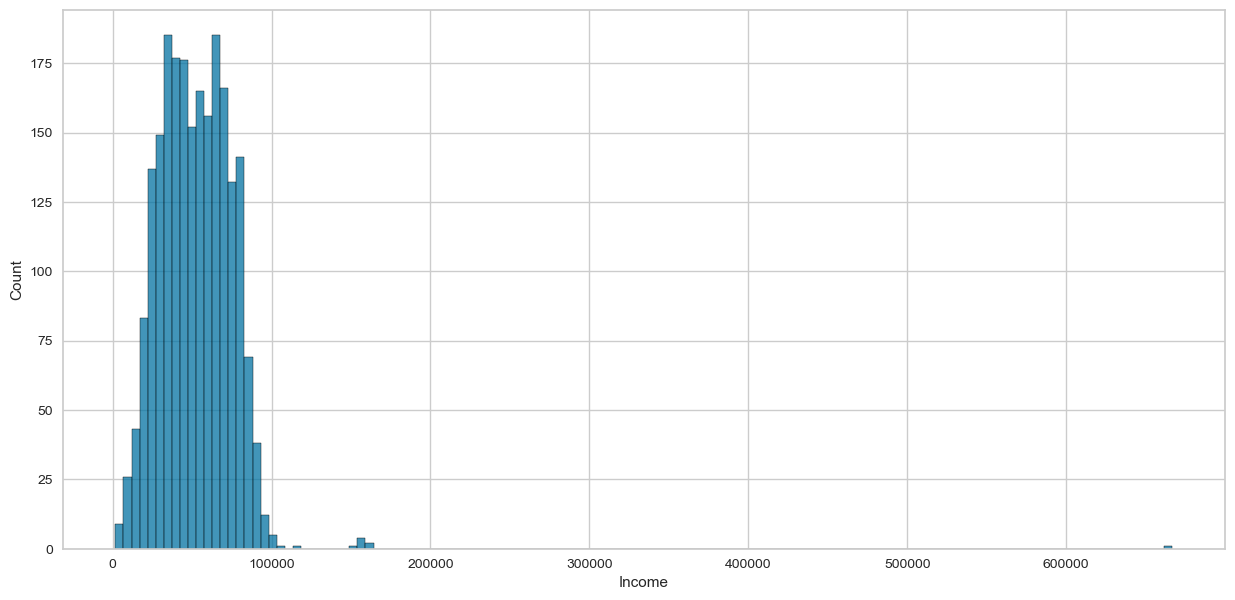

In [12]:
# Histogram for the Income feature
plt.figure(figsize=(15, 7))
sns.histplot(x="Income", data=data)
plt.show()

<AxesSubplot:xlabel='Income'>

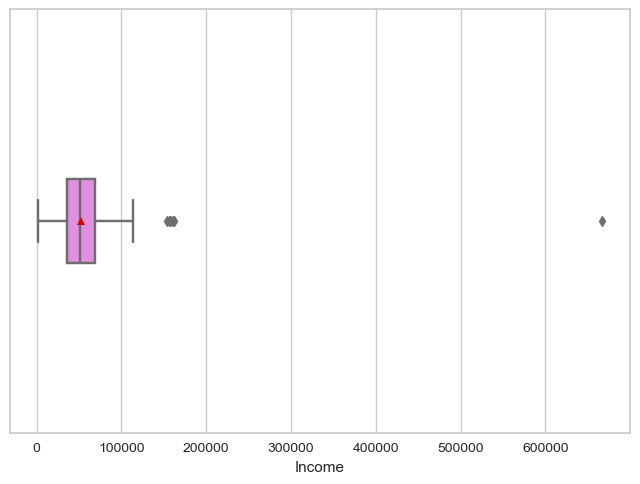

In [13]:
# Boxplot for the Income feature
sns.boxplot(data=data, x="Income", showmeans=True, color="violet", width = .2)

- We are seeing an extreme value on the right side of the distribution of the 'Income' feature. We will treat these as outliers as they significantly skew our data and results.

In [14]:
# Calculating the upper whisker for the Income variable
Q1 = data.quantile(q=0.25)                          
Q3 = data.quantile(q=.75)                          
IQR = Q3-Q1                                       
upper_whisker = (Q3 + 1.5 * IQR)["Income"]          

print(upper_whisker)                                

118350.5


In [15]:
# Let's check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
164   01-03-2014       98        20          2  ...                   22   
617   03-06-2013       31        85          1  ...                    0   
655   07-02-2014       81         1          1  ...                    0   
687   04-08-2012       21        55         16  ...                   28   
1300  04-06-2013       37        39          1  ...                    0   
1653  29-04-2013       13         1          0  ...                   28   
2132  29-08-2013       85         2          1  ...                    0   
2233  02-06-2013       23         9         14  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 26 columns]

In [16]:
# Checking the 99.5% percentile value for the Income variable
data.quantile(q=.995)["Income"]

102145.75000000003

There are only a few rows with extreme values for the Income variable. We have enough information to confidently drop these values from the dataset.

In [17]:
# Dropping observations identified as outliers 
data.drop(index=[164,617,655,687,1300,1653,2132,2233], inplace=True)

**Checking the distribution of the Income variable after dropping outliers.**

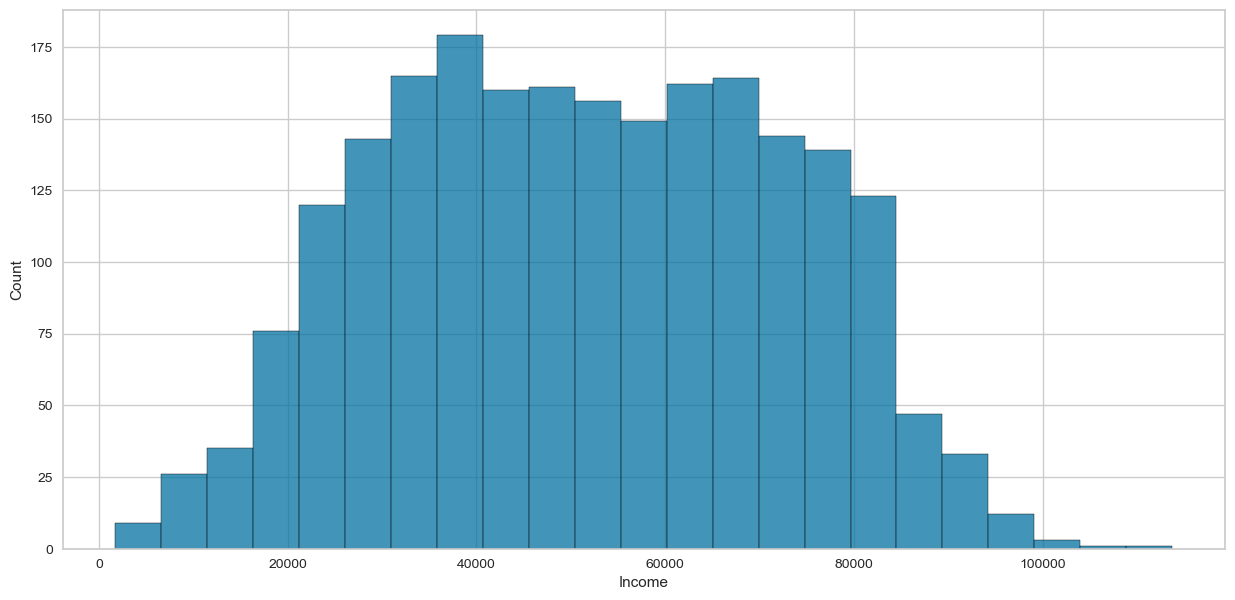

In [18]:
# Plotting histogram and 'Income'
plt.figure(figsize=(15, 7))
sns.histplot(x="Income", data=data)
plt.show()

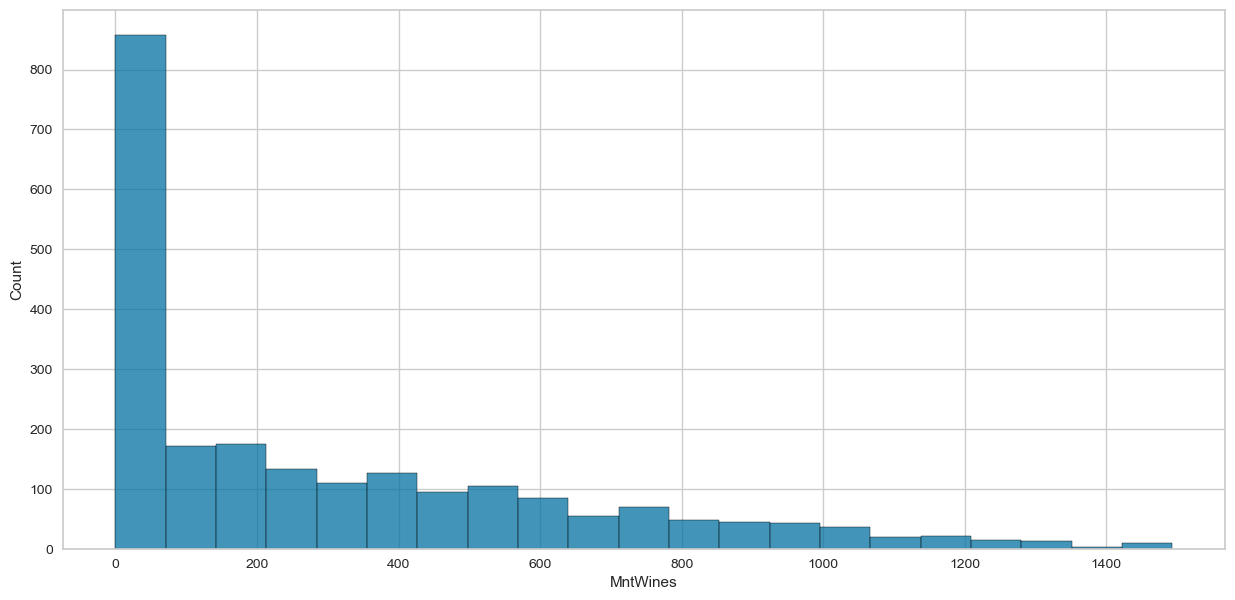

In [19]:
# Plotting the histogram for 'MntWines'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntWines", data=data)
plt.show()

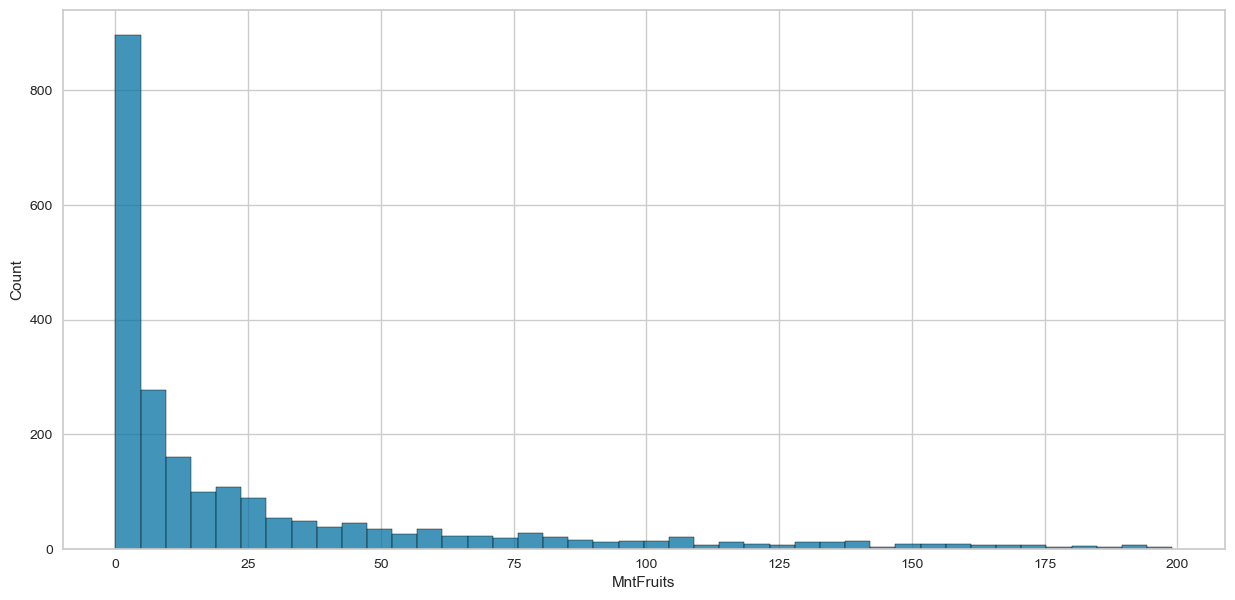

In [20]:
# Plotting the histogram for 'MntFruits'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntFruits", data=data)
plt.show()

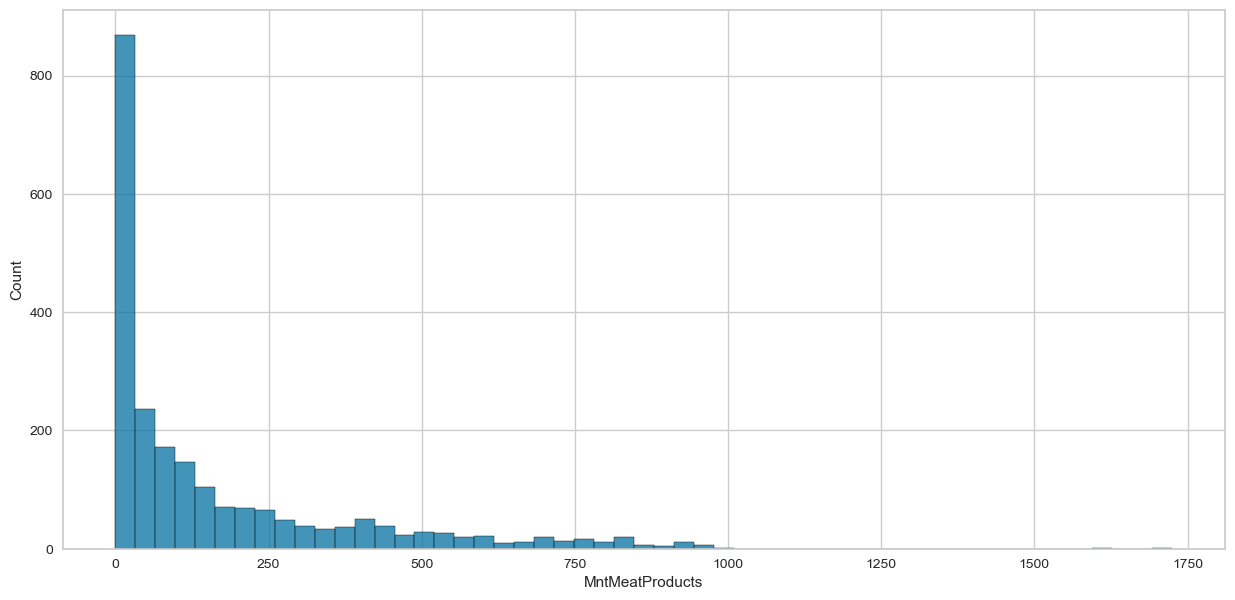

In [21]:
# Plotting the histogram for 'MntMeatProducts' 

plt.figure(figsize=(15, 7))
sns.histplot(x="MntMeatProducts", data=data)
plt.show()

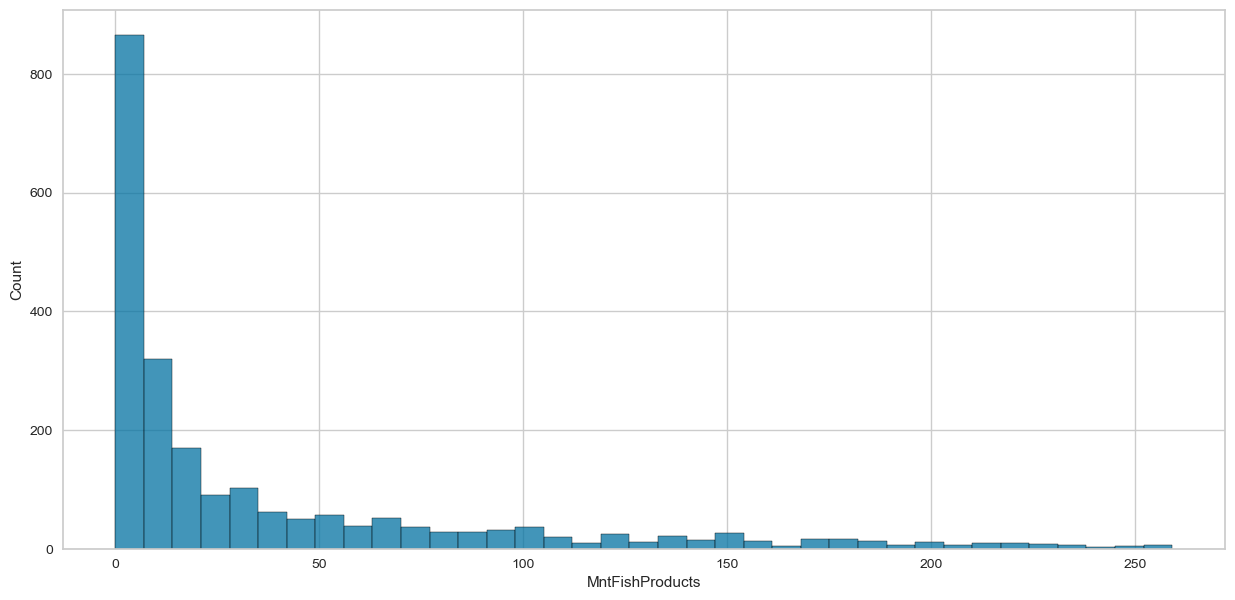

In [22]:
# Plotting the histogram for 'MntFishProduct'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntFishProducts", data=data)
plt.show()

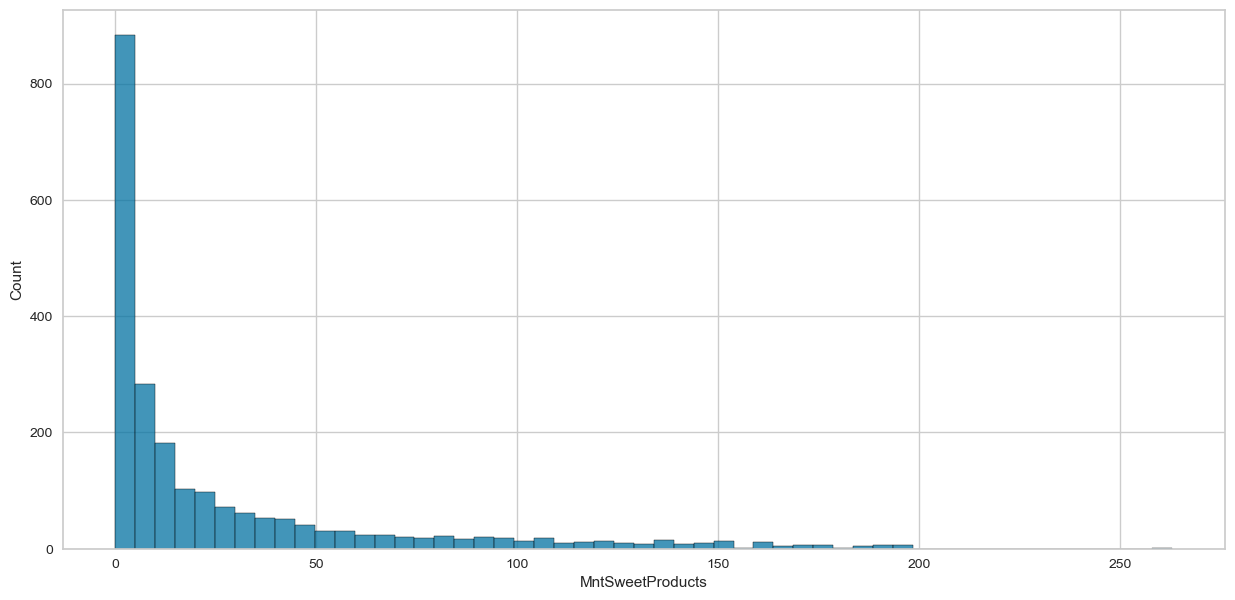

In [23]:
# Plotting the histogram for 'MntSweetProducts'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntSweetProducts", data=data)
plt.show()

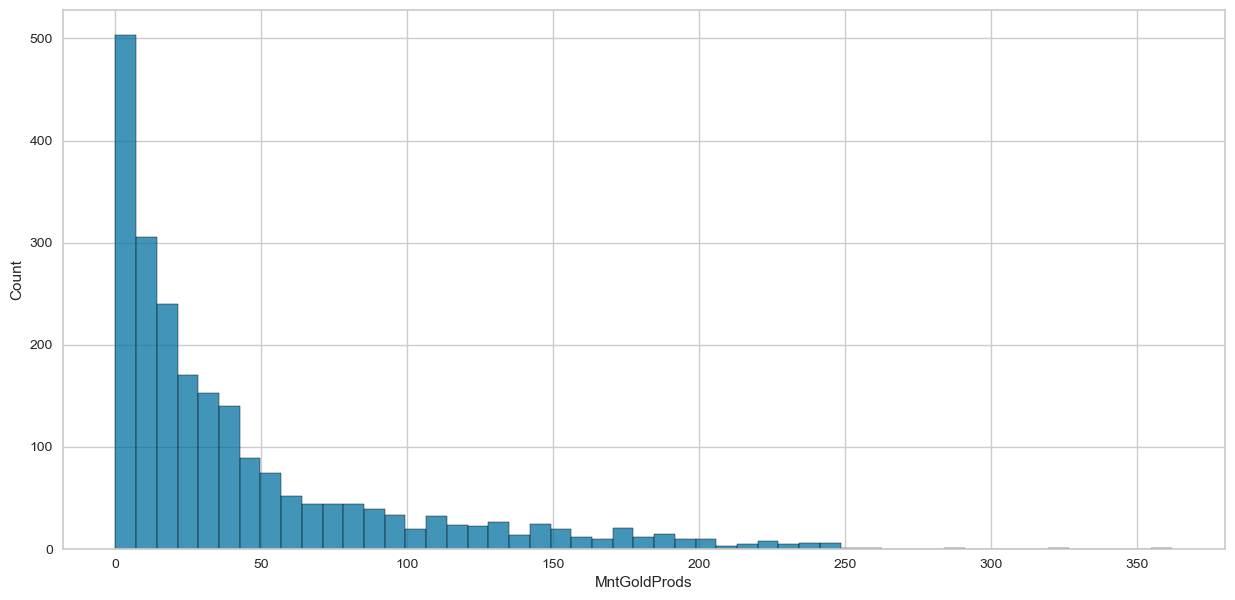

In [24]:
# Plotting the histogram for 'MntGoldProducts'
plt.figure(figsize=(15, 7))
sns.histplot(x="MntGoldProds", data=data)
plt.show()

Year_Birth
Skew : -0.35


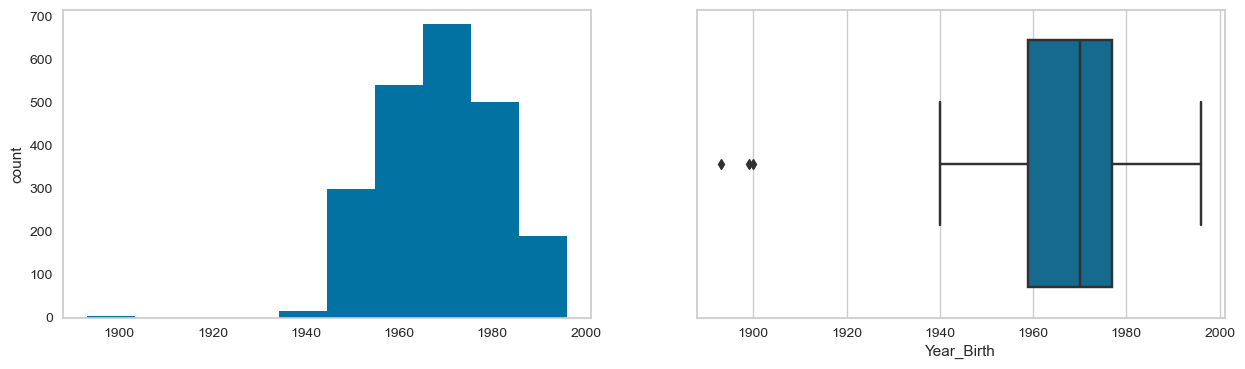

Income
Skew : 0.01


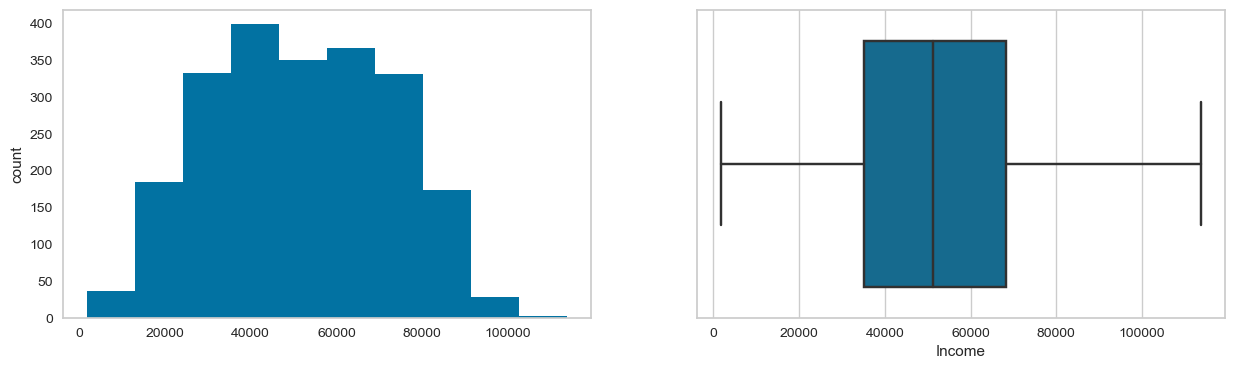

Kidhome
Skew : 0.64


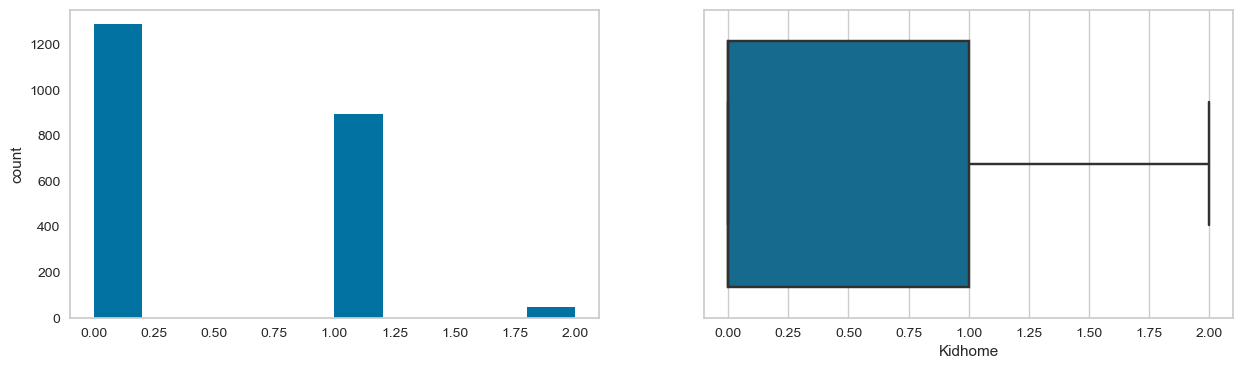

Teenhome
Skew : 0.4


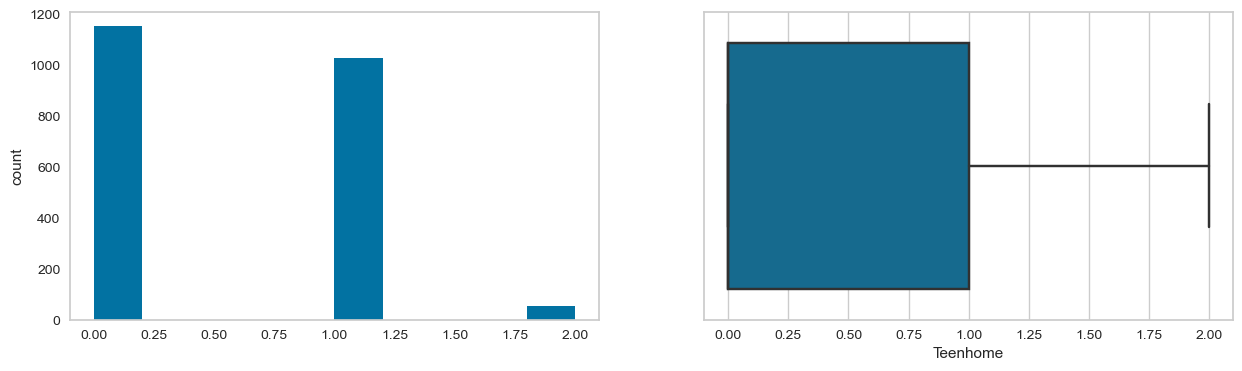

Recency
Skew : -0.0


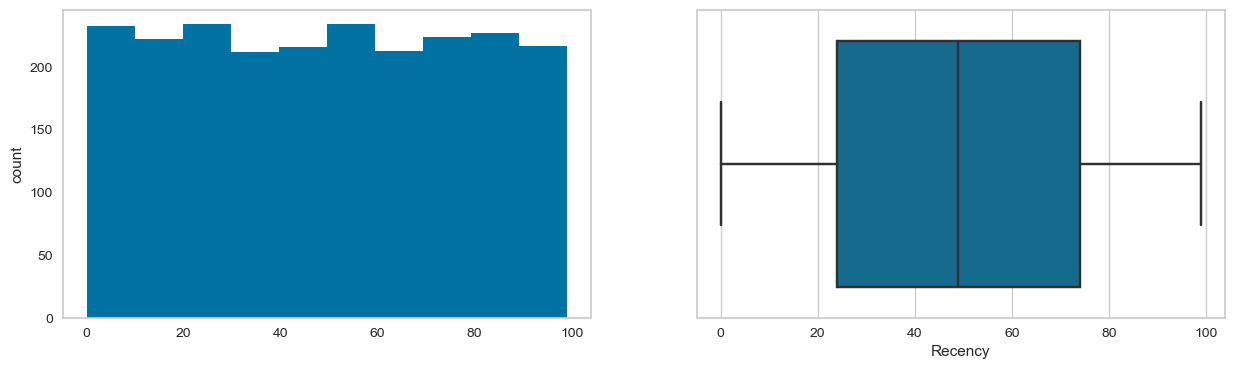

MntWines
Skew : 1.17


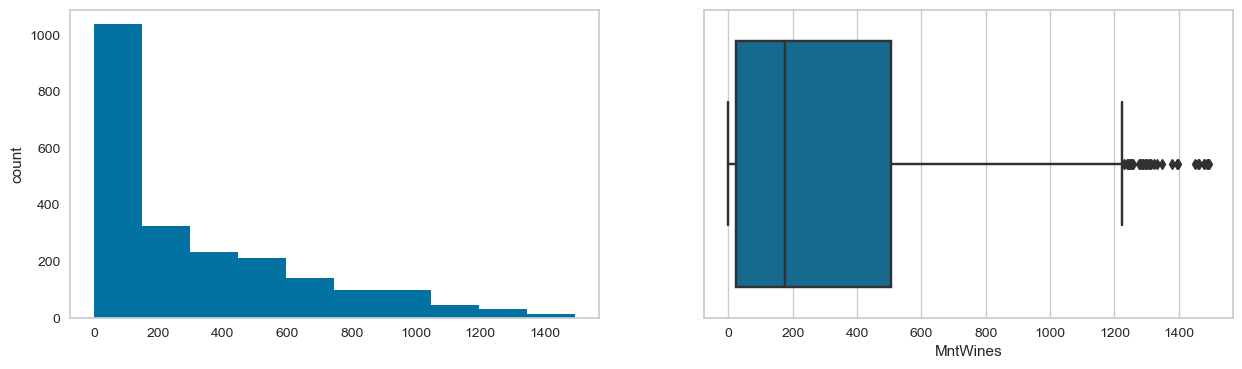

MntFruits
Skew : 2.1


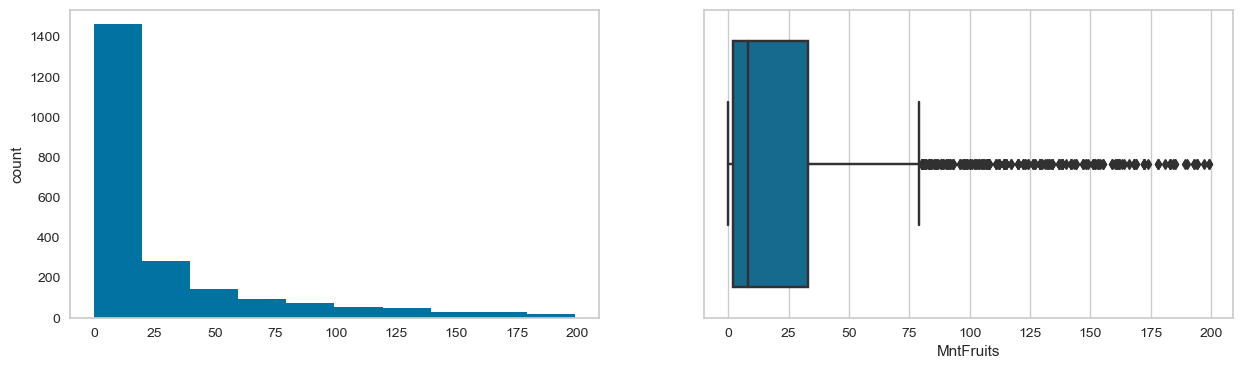

MntMeatProducts
Skew : 1.89


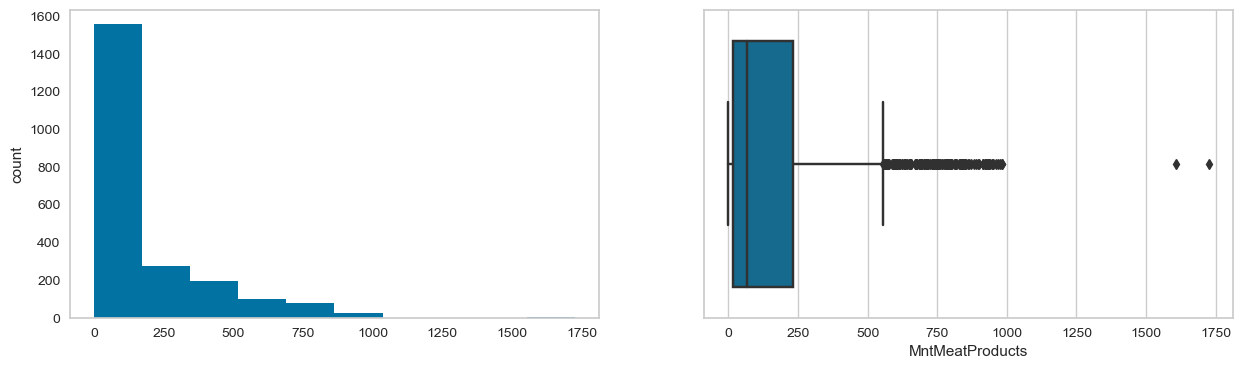

MntFishProducts
Skew : 1.91


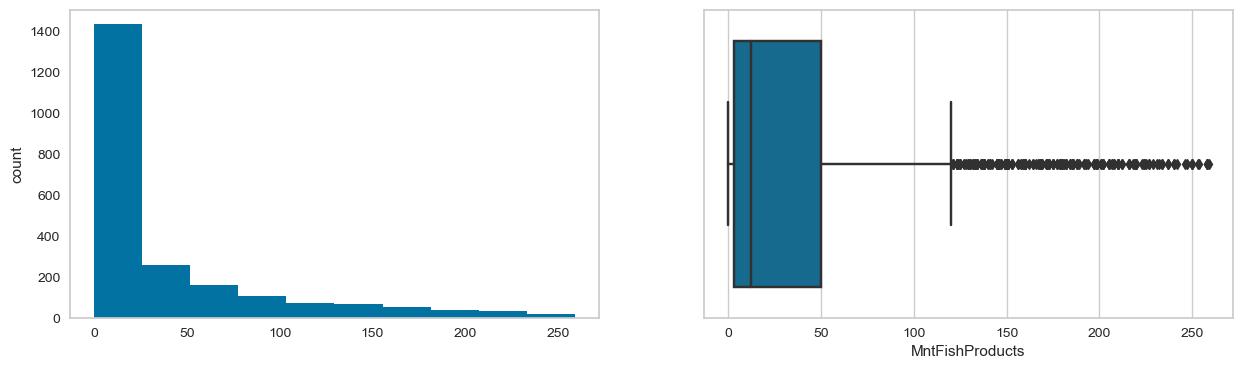

MntSweetProducts
Skew : 2.13


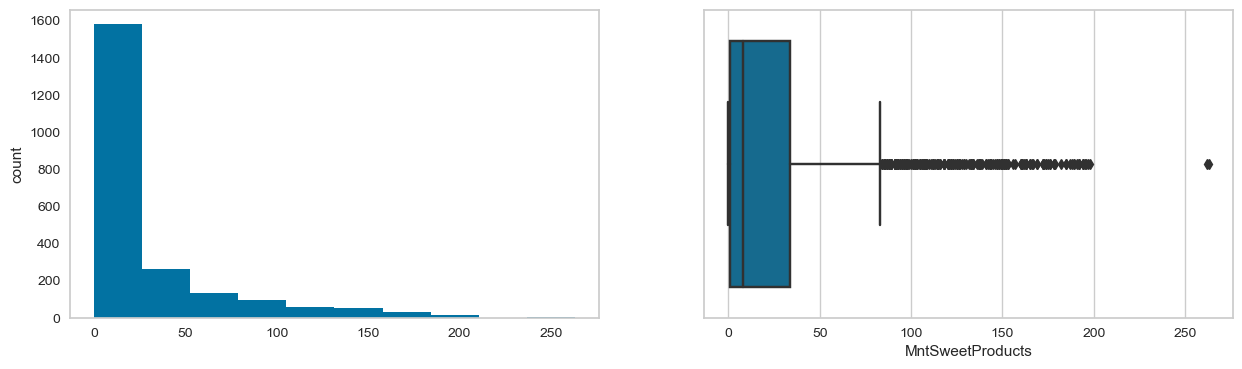

MntGoldProds
Skew : 1.88


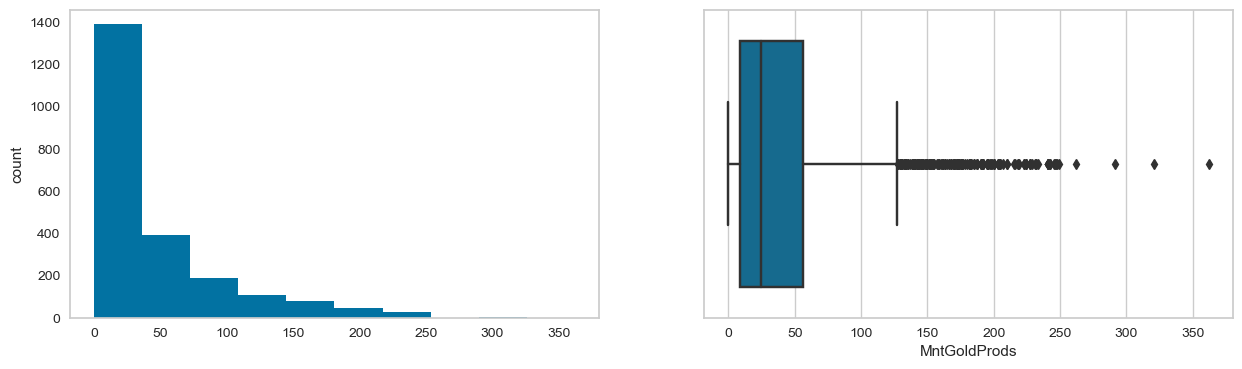

NumDealsPurchases
Skew : 2.32


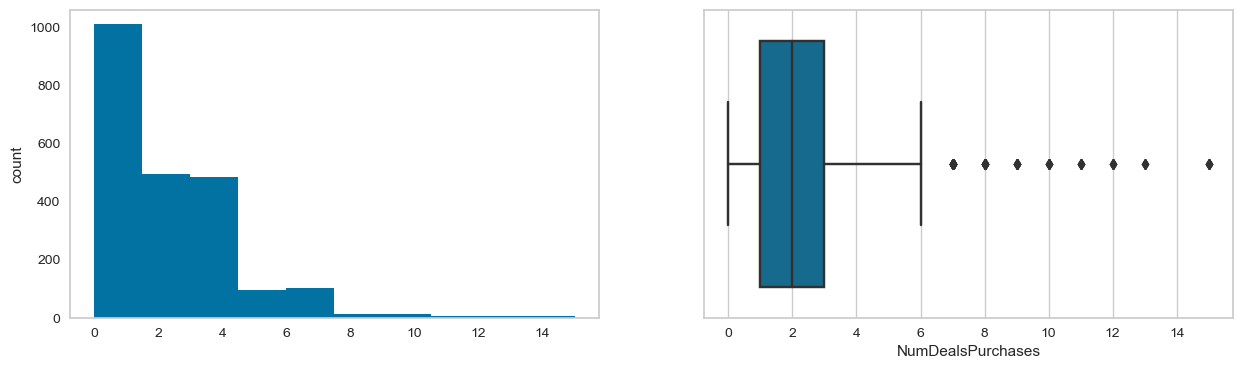

NumWebPurchases
Skew : 1.39


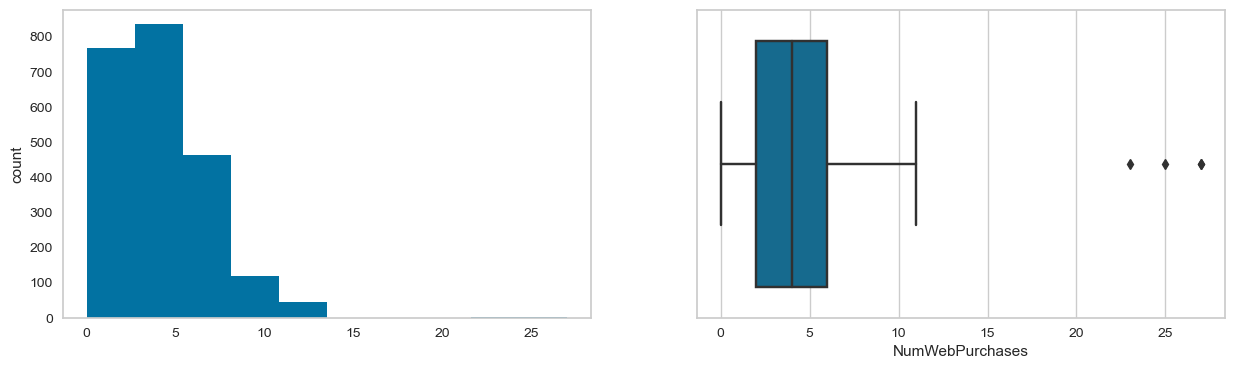

NumCatalogPurchases
Skew : 1.37


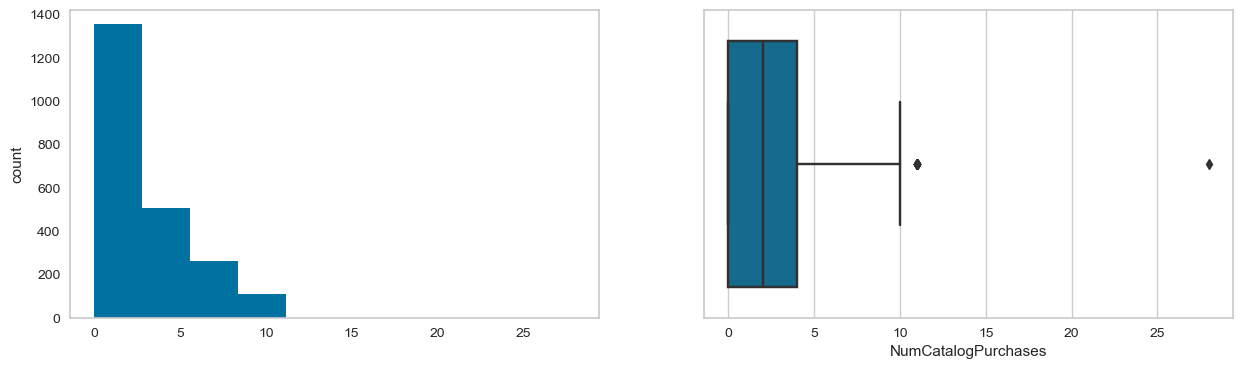

NumStorePurchases
Skew : 0.71


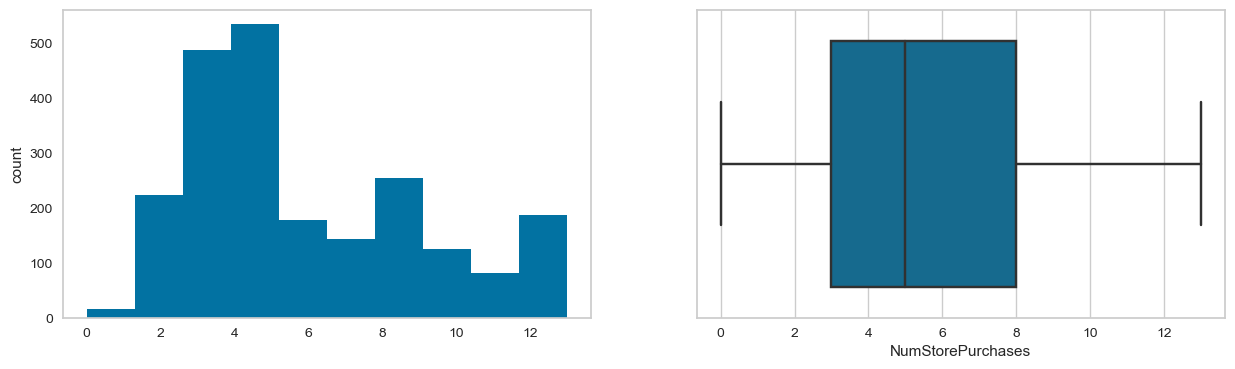

NumWebVisitsMonth
Skew : 0.22


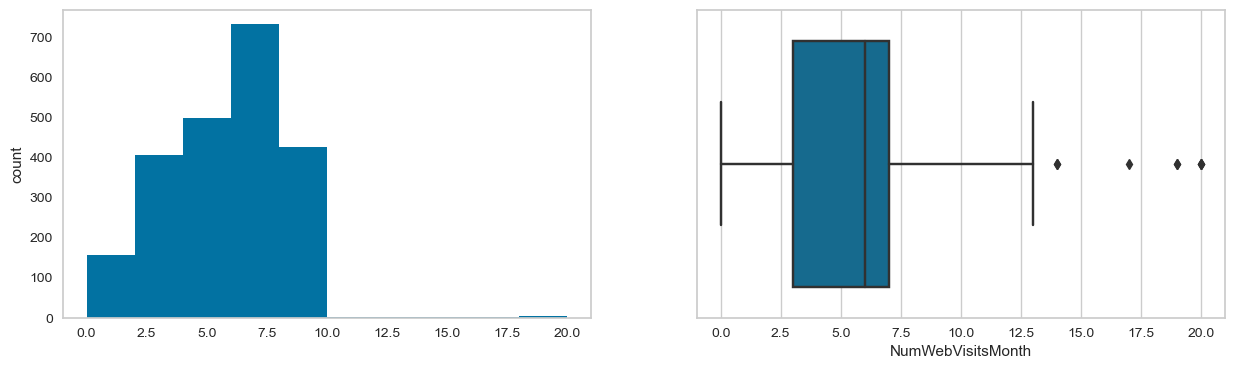

AcceptedCmp3
Skew : 3.28


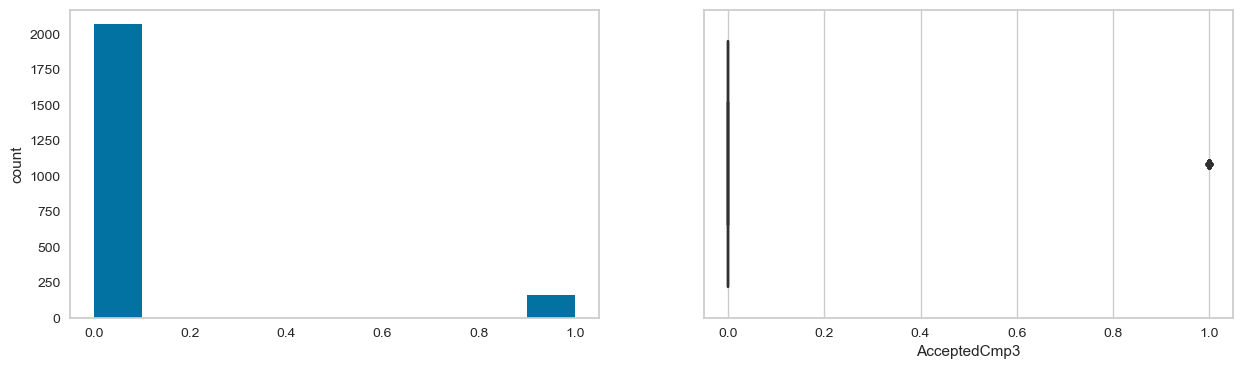

AcceptedCmp4
Skew : 3.23


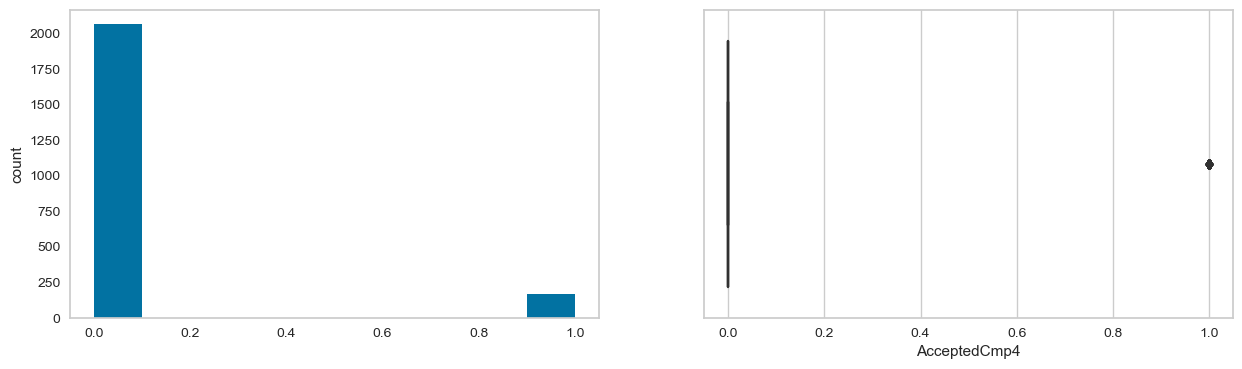

AcceptedCmp5
Skew : 3.28


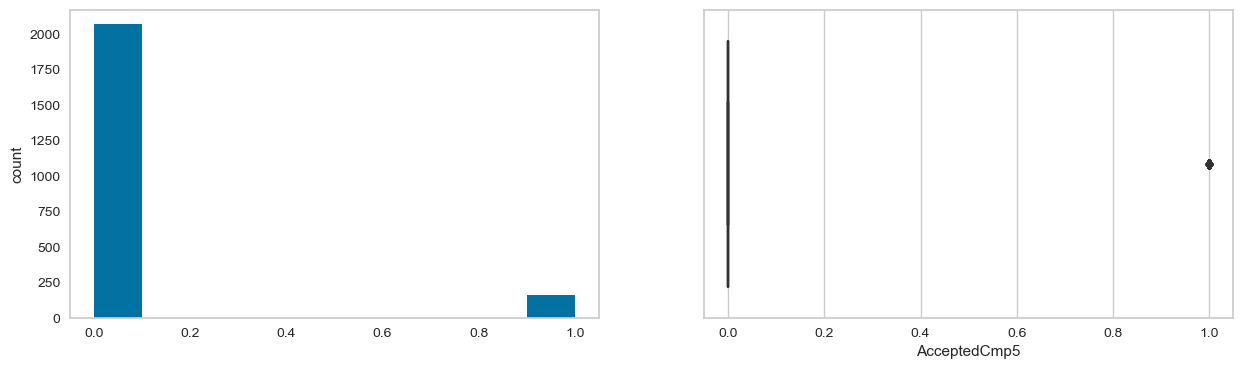

AcceptedCmp1
Skew : 3.55


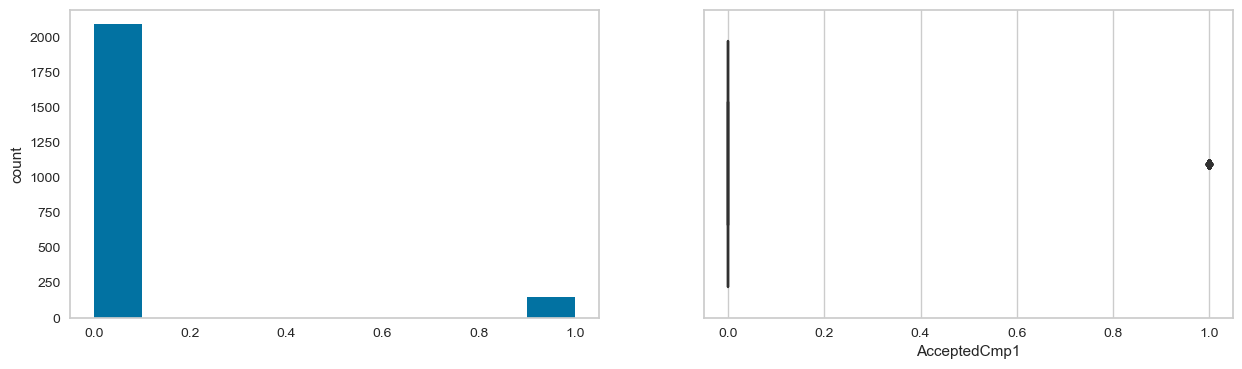

AcceptedCmp2
Skew : 8.61


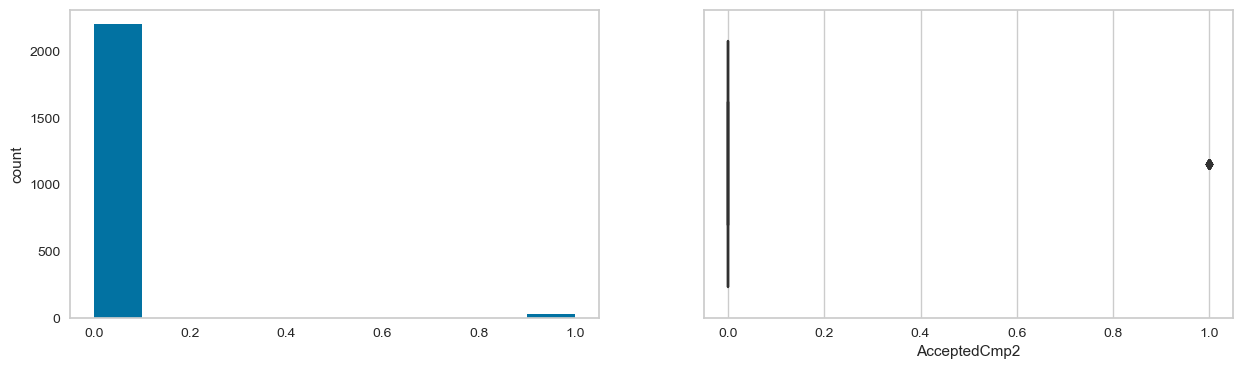

Complain
Skew : 10.17


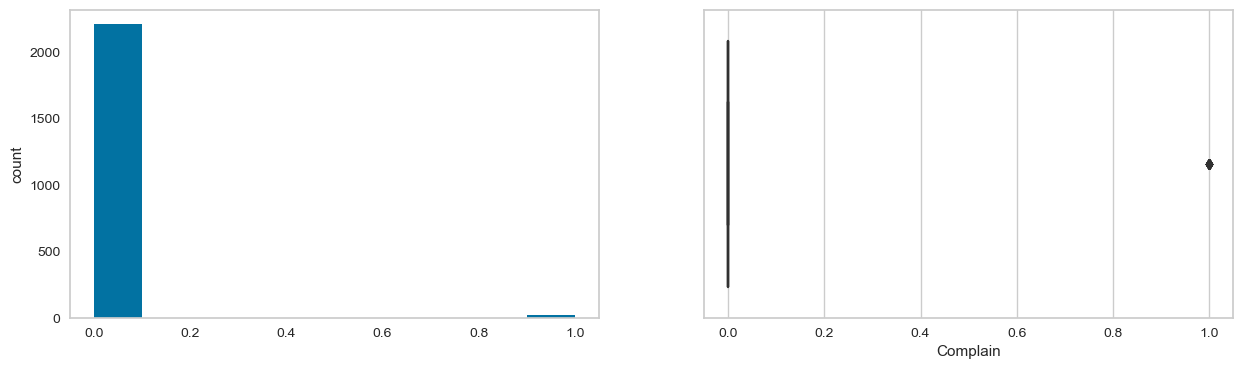

Response
Skew : 1.97


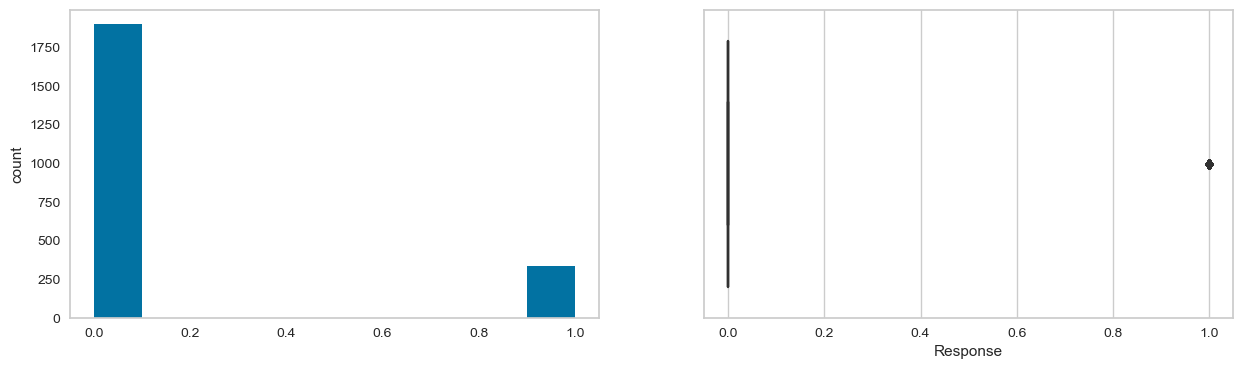

In [25]:
cont_cols = data.select_dtypes(include=['number']).columns.tolist()
for col in cont_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

#### **Our Income feature now reflects a normal distribution. Age, as well as campaign and product features show skew which we will treat during feature engineering.**

## **2. Univariate analysis - Categorical Data**

In [26]:
# Creating bar plots that indicate the percentage for each category. 
# Takes the categorical column as the input and returns the bar plot for the variable.
def perc_on_bar(z):
    total = len(data[z])                                          
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05                  
        y = p.get_y() + p.get_height()                            
        ax.annotate(percentage, (x, y), size = 12)                 
    plt.show()                                                    

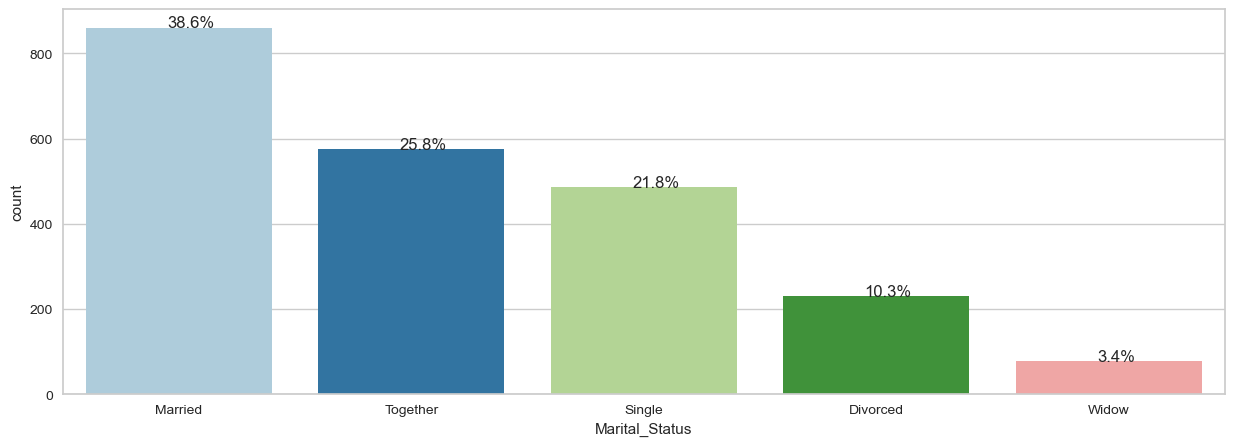

In [27]:
perc_on_bar('Marital_Status')

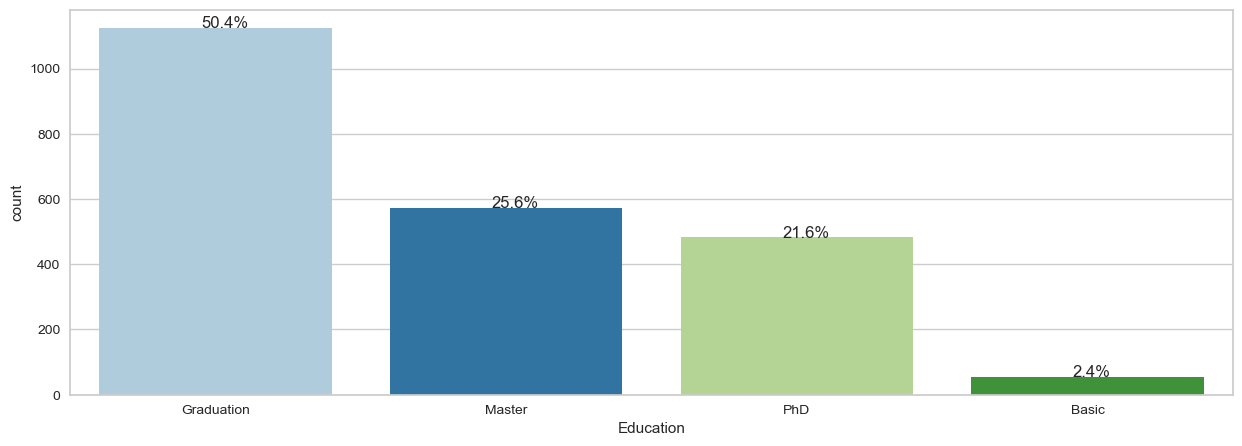

In [28]:
perc_on_bar('Education')

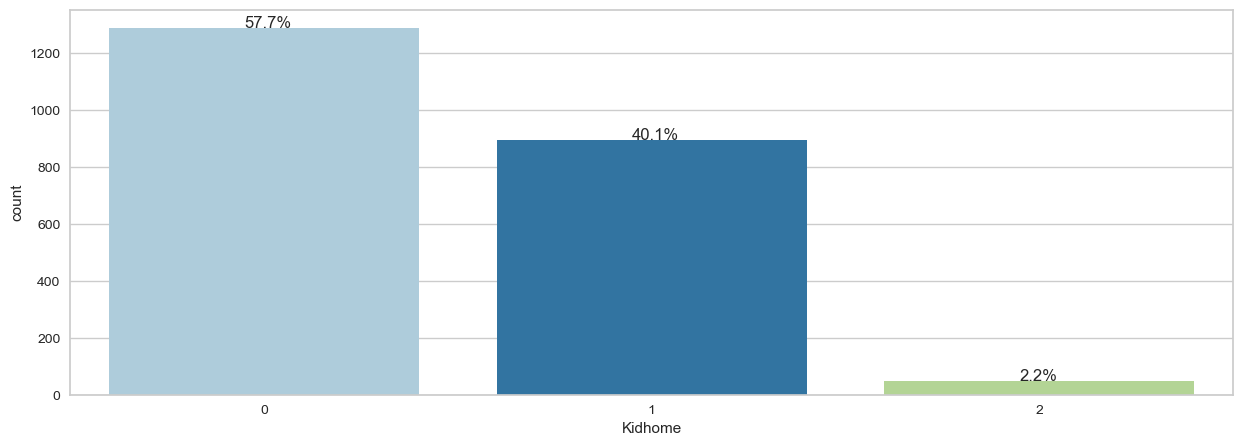

In [29]:
perc_on_bar('Kidhome')

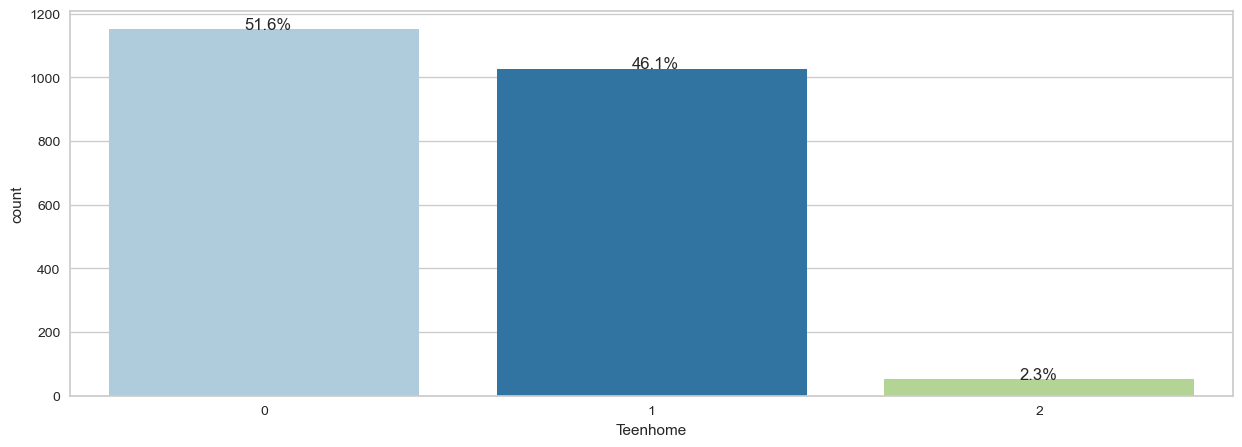

In [30]:
perc_on_bar("Teenhome")

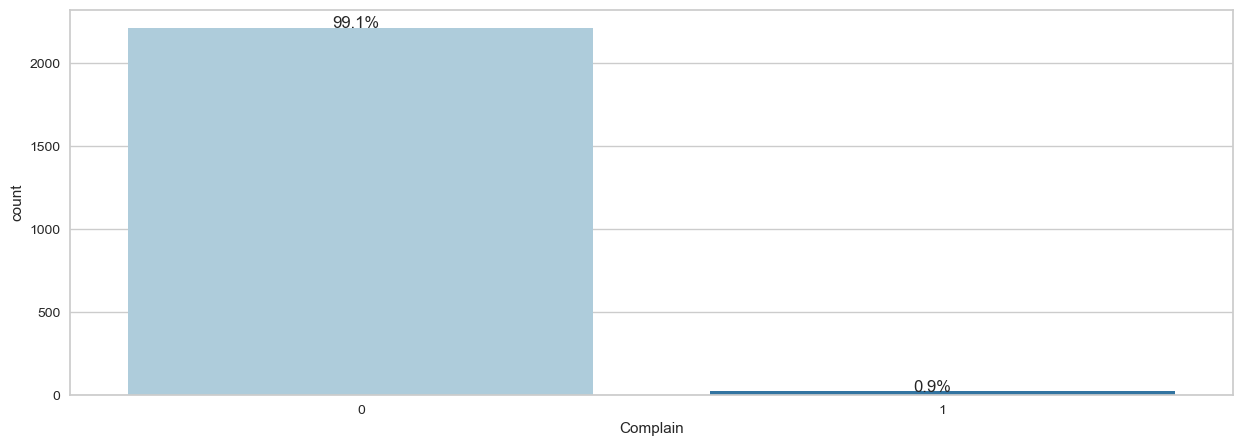

In [31]:
perc_on_bar("Complain")

#### **We see by combining the values in Marital_status that those in a relationship make up a greater proportion than those who are not. We also see college graduates account for approximately half of our Education values. Preliminary results of Kidhome and Teenhome show at least half of the customers do not have children, but due to how this information is collected and organized feature engineering can help combine and refine these results.**

## **Bivariate Analysis**

### **Correlation Heat map**

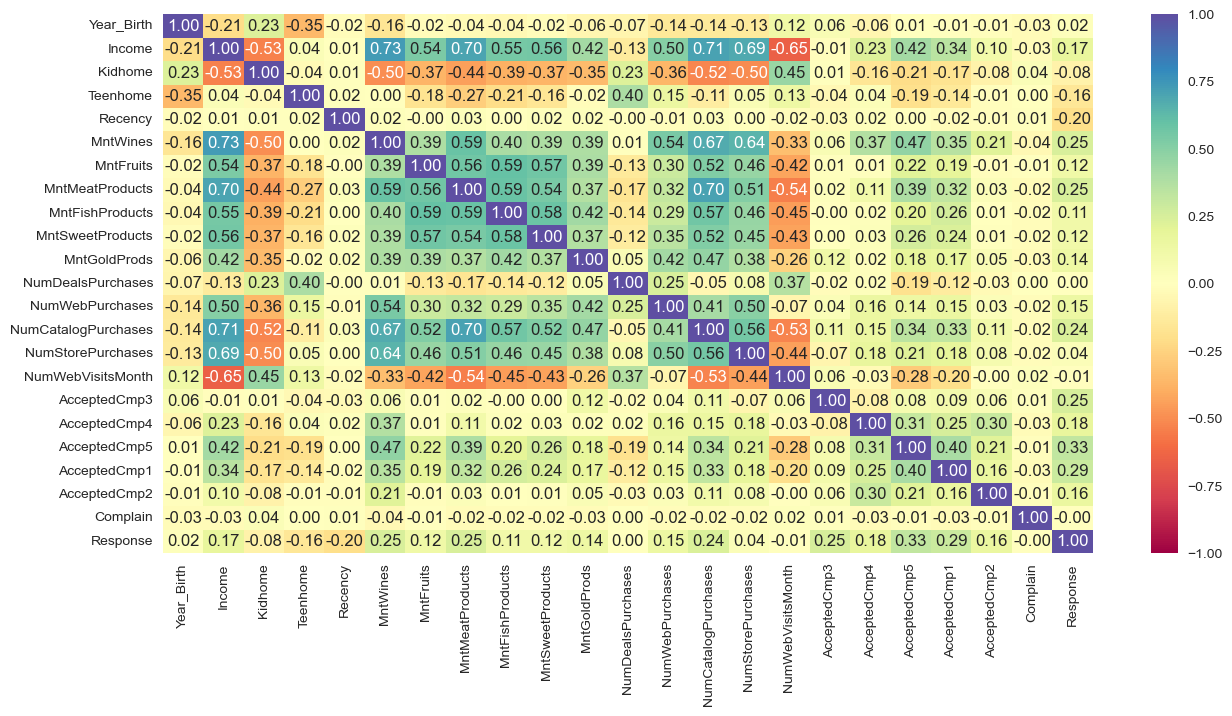

In [32]:
cols_list = data.select_dtypes(include= np.number).columns.tolist()
plt.figure(figsize = (15,7))
sns.heatmap(data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral",)
plt.show()

#### **We can see a variety of positive and negative correlations. We see income is positively correlated with catalog and store purchases, with a higher correlation than web purchases. There is also a strong negative correlation between income and web visits. We also see a negative correlation with Income and Kidhome**

### **Education Vs Income**

AxesSubplot(0.125,0.11;0.775x0.77)


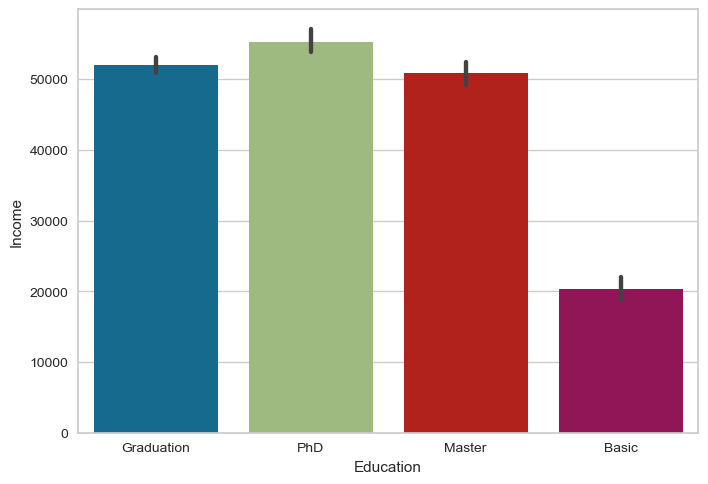

In [33]:
print(sns.barplot(x="Education", y="Income", data=data))

#### **In our dataset we see individuals who have completed higher-education earn > 2x more than those with Basic education**

### **Marital Status Vs Income**

AxesSubplot(0.125,0.11;0.775x0.77)


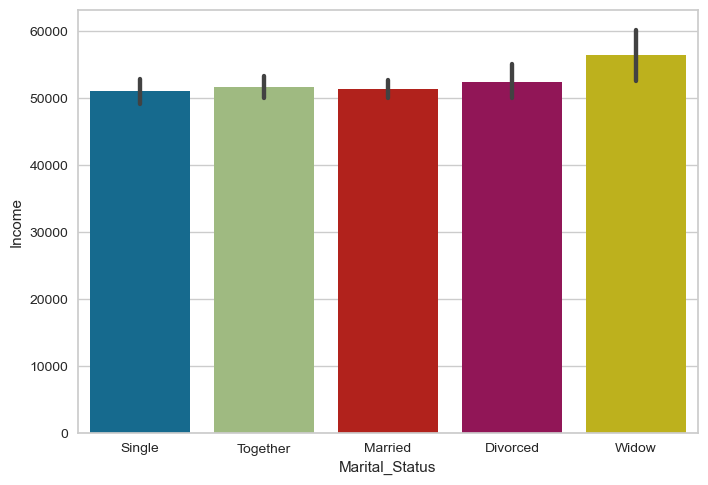

In [34]:
print(sns.barplot(x="Marital_Status", y="Income", data=data))

#### **Based on our dataset, Income is relatively consistent regardless of Marital_Status**

### **Kidhome Vs Income**

AxesSubplot(0.125,0.11;0.775x0.77)


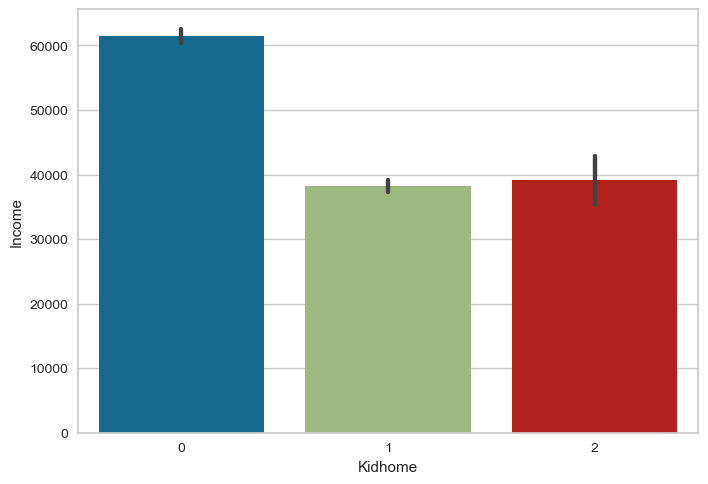

In [35]:
print(sns.barplot(x="Kidhome", y="Income", data=data))

#### **We see those without children have higher Income. Those with 1 child have slightly less than those with 2.**

### **Marital_Status Vs Kidhome**

<AxesSubplot:xlabel='Marital_Status'>

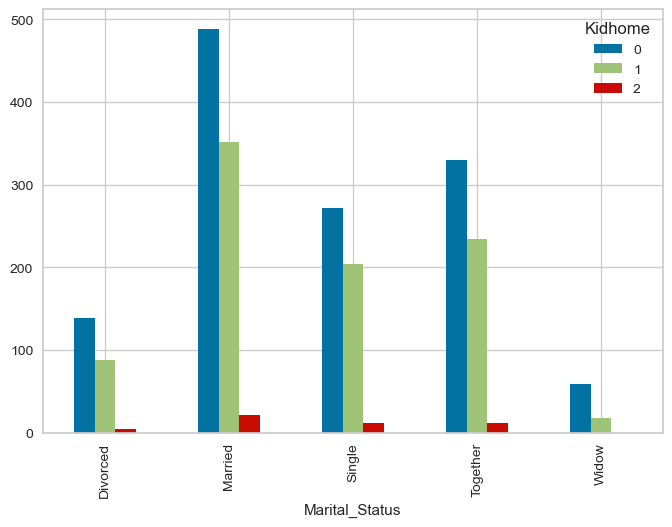

In [36]:
# Plotting the bar plot for Marital_Status and Kidhome
pd.crosstab(data["Marital_Status"],data["Kidhome"]).plot(kind='bar',stacked=False)

#### **Individuals in a relationship (Married + Together) without children account for the majority of the dataset. A significant number of customers (Single & in a relationship) also have 1 child, with 2 being a significant minority.**

## **Feature Engineering and Data Processing**

### **Age** 

In [37]:
# Extracting only the year from the Year_Birth variable and subtracting it from 2016 will give us the age of the customer at the time of data collection in 2016

data["Age"] = 2016 - pd.to_datetime(data["Year_Birth"], format="%Y").apply(lambda x: x.year) 

# Sorting the values in ascending order 
data["Age"].sort_values()                                         

1170     20
46       20
696      21
747      21
1850     21
       ... 
424      75
1950     76
192     116
339     117
239     123
Name: Age, Length: 2232, dtype: int64

- We can observe from the above output that there are customers with an age greater than 115. We will drop these observations.

In [38]:
# Finding indices of rows where the value in the specified column is over 115
indices_to_drop = data[data["Age"] > 115].index

# Dropping the rows with these indices
data.drop(indices_to_drop, inplace=True)

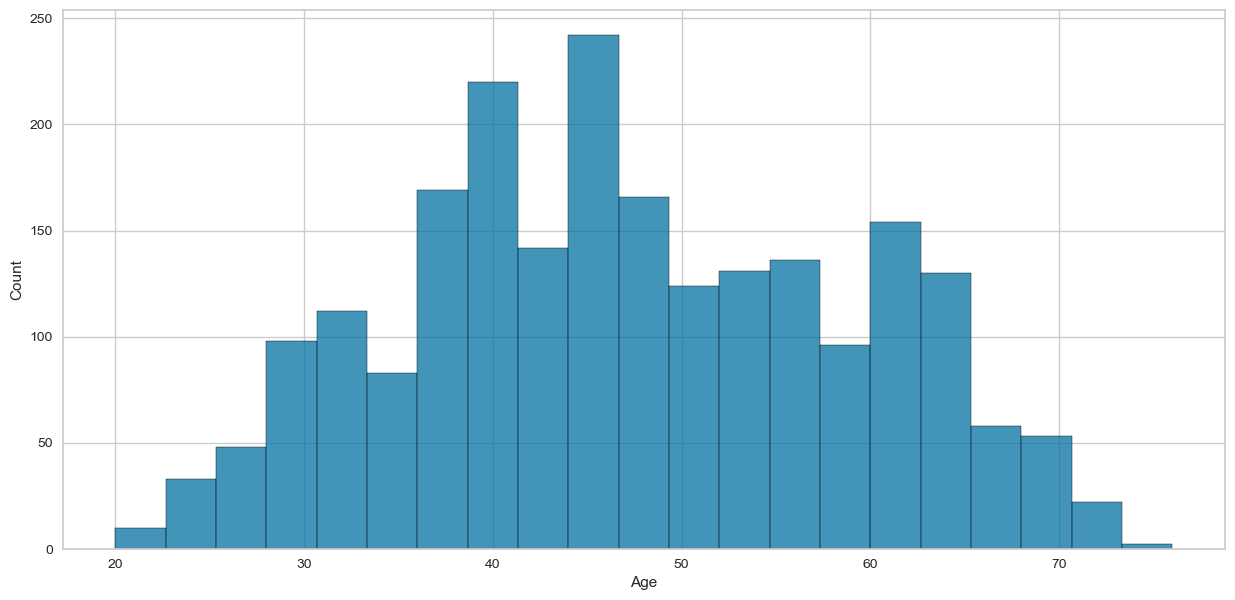

In [39]:
# Plotting histogram to check the distribution of age
plt.figure(figsize=(15, 7))
sns.histplot(x="Age", data=data)
plt.show()

#### **We now have a normal distribution of mainly middle-aged individuals**

### **Kids** 
* Let's create feature "Kids" indicating the total kids and teens in the home.

In [40]:
# Adding Kidhome and Teenhome variables to create the new feature called "Kids"
data["Kids"] = data["Kidhome"]+data["Teenhome"]

### **Family Size**
* Let's create a new variable called 'Family Size' to find out how many members each family has.
* For this, we need to have a look at the Marital_Status variable, and see what are the categories.

In [41]:
# Checking the unique categories in Marial_Status
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

* We can combine the sub-categories Single, Divorced, Widow as "Single" and we can combine the sub-categories Married and Together as "Relationship" 
* Then we can create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Then, we can use the Kids (calculated above) and the Status column to find the family size.

In [42]:
# Replacing "Married" and "Together" with "Relationship"
data["Marital_Status"].replace(to_replace = "Married", value = "Relationship", inplace=True)
data["Marital_Status"].replace(to_replace = "Together", value = "Relationship", inplace=True)

In [43]:
# Replacing "Divorced" and "Widow" with "Single"
data["Marital_Status"].replace(to_replace = "Divorced", value = "Single", inplace=True)
data["Marital_Status"].replace(to_replace = "Widow", value = "Single", inplace=True)

In [44]:
# Creating a new feature called "Status" by replacing "Single" with 1 and "Relationship" with 2 in Marital_Status
data["Status"] = data["Marital_Status"].replace({"Single": 1, "Relationship": 2}) 

In [45]:
# Adding two variables Status and Kids to get the total number of persons in each family
data["Family_Size"] = data["Kids"]+data["Status"]

### **Expenses** 
* Let's create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [46]:
# Adding the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data["Expenses"] = data["MntWines"]+data["MntFruits"]+data["MntMeatProducts"]+data["MntFishProducts"]+data["MntSweetProducts"]+data["MntGoldProds"]


### **Total Purchases**
* Let's create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [47]:
# Adding the number of purchases from each channel 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data["NumTotalPurchases"] = data["NumDealsPurchases"]+data["NumWebPurchases"]+data["NumCatalogPurchases"]+data["NumStorePurchases"]

### **Engaged in days**
* Let's create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [48]:
# Converting Dt_customer variable to Python date time object
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"]) 

**Let's check the max and min of the date.**

In [49]:
# Checking the minimum date
data["Dt_Customer"].min()

Timestamp('2012-01-08 00:00:00')

In [50]:
# Checking the maximum date
data["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

- From the above output from the max function, we observed that the last customer enrollment date is December 6th, 2014. We can extract the number of days a customer has been with the company using January 1st, 2015 as that threshold?

In [51]:
 # Assigning date to the day variable
data["day"] = "01-01-2015"                         

# Converting the variable day to Python datetime object
data["day"] = pd.to_datetime(data.day)              

In [52]:
data["Engaged_in_days"] = (data["day"] - data["Dt_Customer"]).dt.days     

### **TotalAcceptedCmp**
* Let's create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [53]:
# Adding all the campaign related variables to get the total number of accepted campaigns by a customer
data["TotalAcceptedCmp"] = data["AcceptedCmp1"]+data["AcceptedCmp2"]+data["AcceptedCmp3"]+data["AcceptedCmp4"]+data["AcceptedCmp5"]+data["Response"]

### **AmountPerPurchase**
* Let's create a new feature called "AmountPerPurchase" indicating the amount spent per purchase.

In [54]:
# Dividing the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase 
data['AmountPerPurchase'] = data["Expenses"]/data["NumTotalPurchases"]

In [55]:
# Checking the max value
data["AmountPerPurchase"].max()

inf

- We received an unexpected value in our new feature. Since we utilized a division operator let's see if we are dividing by zero.

In [56]:
# Finding how many observations have NumTotalPurchases equal to 0
(data["NumTotalPurchases"] == 0).sum()

2

In [57]:
# Droping the observations with NumTotalPurchases equal to 0, using their indices
indices_to_drop = data[data["NumTotalPurchases"] == 0].index

# Droping these rows from the DataFrame
data.drop(indices_to_drop, inplace=True)

**Now, let's check the distribution of values in AmountPerPurchase column.**

In [58]:
# Check the summary statistics of the AmountPerPurchase variable 
data["AmountPerPurchase"].describe()

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: AmountPerPurchase, dtype: float64

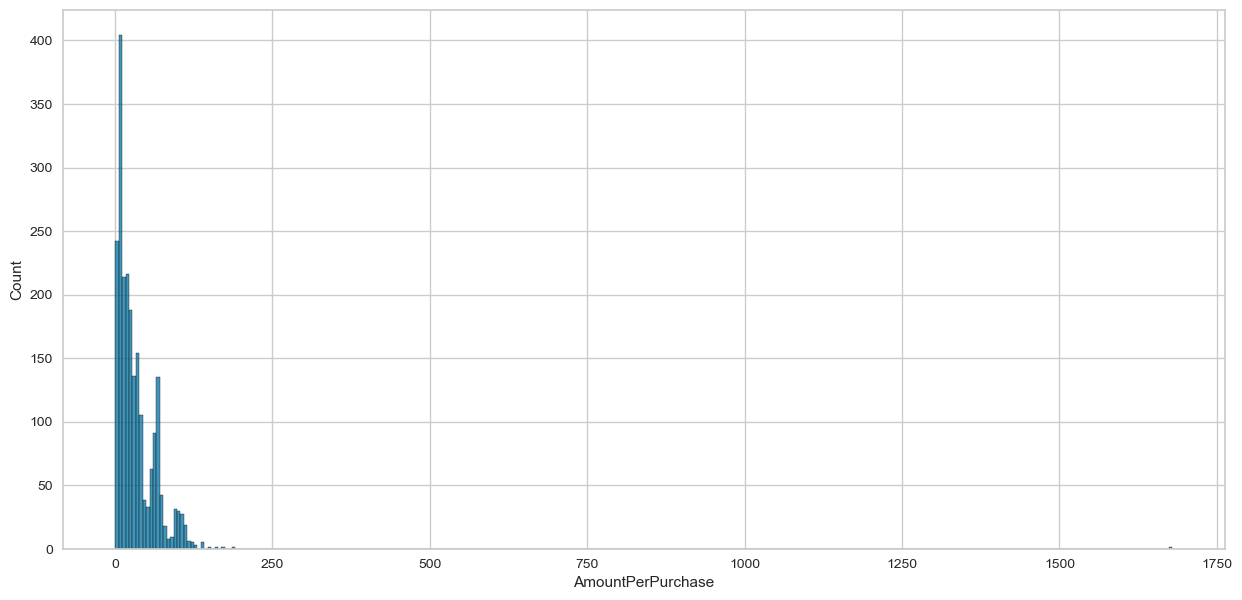

In [59]:
# Plotting the histogram for the AmountPerPurchase variable
plt.figure(figsize=(15, 7))
sns.histplot(x="AmountPerPurchase", data=data)
plt.show()

<AxesSubplot:xlabel='AmountPerPurchase'>

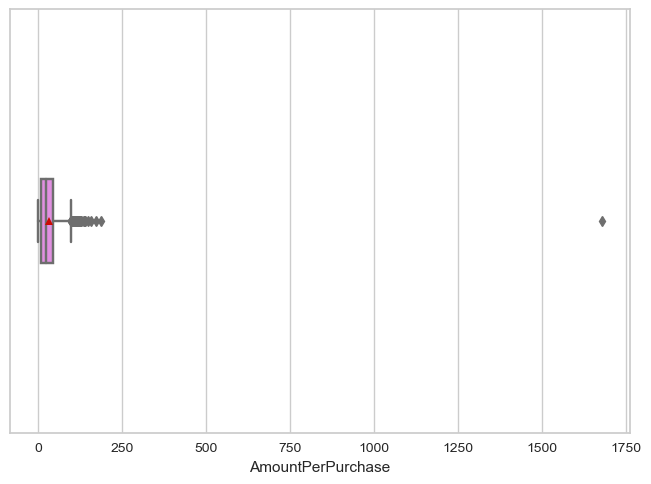

In [60]:
sns.boxplot(data=data, x="AmountPerPurchase", showmeans=True, color="violet", width = .2)

#### **We see there is a heavy skew in our new feature. Since this is a single value and not reflective of our sample let us remove the value and recheck our distribution.**

In [61]:
data = data[data['AmountPerPurchase']<1500]

<AxesSubplot:xlabel='AmountPerPurchase'>

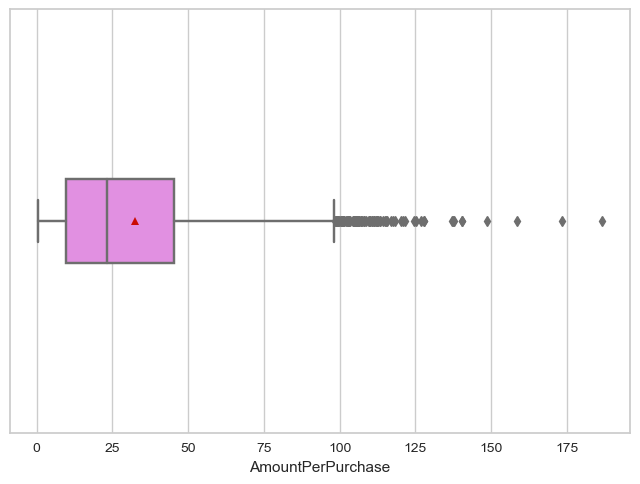

In [62]:
sns.boxplot(data=data, x="AmountPerPurchase", showmeans=True, color="violet", width = .2)

### **Imputing Missing Values**

In [63]:
# Imputing the missing values for the Income variable with the median
median_income = data["Income"].median()

# Imputing missing values in 'Income' with the median
data["Income"].fillna(median_income, inplace=True)

**Now that we are done with data preprocessing, let's visualize new features against the new income variable we have after imputing missing values.**

### **Income Vs Expenses**

Text(0, 0.5, 'Expenses')

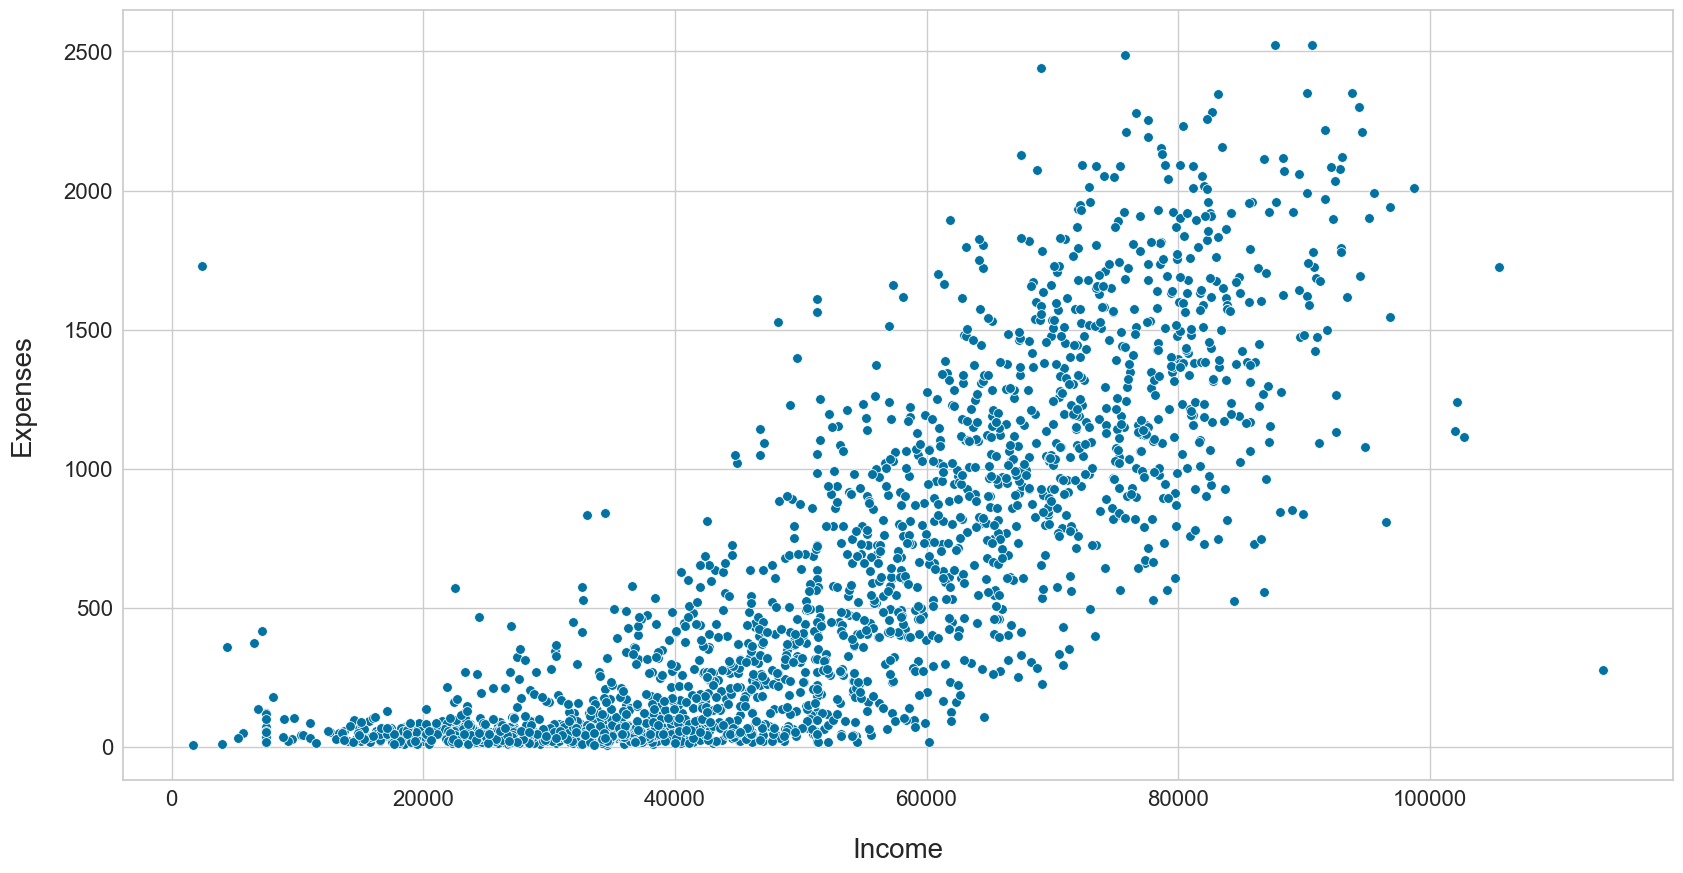

In [64]:
# Plotting the scatter plot with Expenses on Y-axis and Income on X-axis  

plt.figure(figsize=(20, 10))                                    
sns.scatterplot(y="Expenses", x="Income", data=data)                                        # Hint: Use sns.scatterplot()  
plt.xticks(fontsize=16)                                         
plt.yticks(fontsize=16)                                         
plt.xlabel("Income", fontsize=20, labelpad=20)                  
plt.ylabel("Expenses", fontsize=20, labelpad=20)                

#### **Here we can visualize the positive correlation between Income and Expenses (total amount spent by a customer)**

### **Family Size Vs Income**

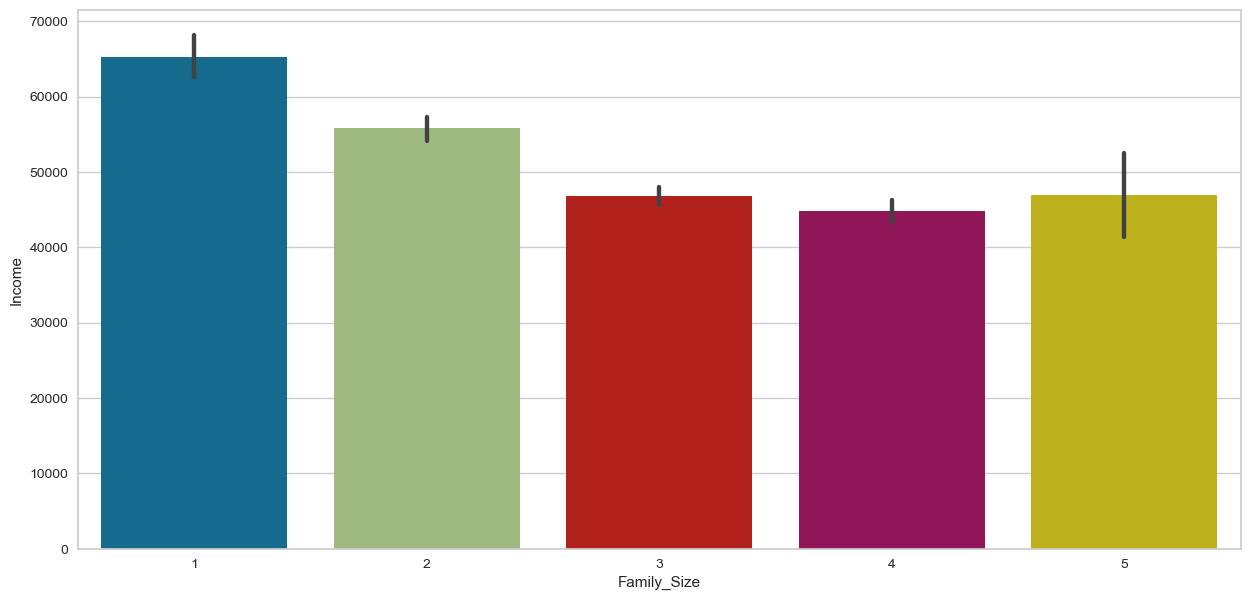

In [65]:
# Plotting the bar plot for Family Size on X-axis and Income on Y-axis
plt.figure(figsize = (15,7))
sns.barplot(x="Family_Size", y="Income", data=data)
plt.show()

#### **Families of size 1 and 2 have higher Income**

## Preparing Data for Segmentation

### Dropping columns that we will not use for segmentation

The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. This is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.

We will use behavioral data for segmentation (amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.

Here, we will use the behavioral attributes for segmentation and drop the demographic attributes like Income, Age, and Family_Size. In addition to this, we need to drop some other columns which are mentioned below.

* `Dt_Customer`: We have created the `Engaged_in_days` variable using the Dt_Customer variable. Hence, we can drop this variable as it will not help with segmentation.
* `Complain`: About 95% of the customers didn't complain and have the same value for this column. This variable will not have a major impact on segmentation. Hence, we can drop this variable. 
* `day`:  We have created the `Engaged_in_days` variable using the 'day' variable. Hence, we can drop this variable as it will not help with segmentation.
* `Status`: This column was created just to get the `Family_Size` variable that contains the information about the Status. Hence, we can drop this variable.
* We also need to drop categorical variables like `Education` and `Marital_Status`, `Kids`, `Kidhome`, and `Teenhome` as distance-based algorithms cannot use the default distance like Euclidean to find the distance between categorical and numerical variables.
* We can also drop categorical variables like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and `Response` for which we have create the variable `TotalAcceptedCmp` which is the aggregate of all these variables.

In [66]:
# Dropping all the irrelevant columns and storing in data_model
data_model = data.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Family_Size'
    ],
    axis=1,
)

In [67]:
# Checking the shape of new data 
data_model.shape

(2226, 17)

In [68]:
# Checking first five rows of new data
data_model.head(5)

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0                   10                  4                  7      1617   
1                    1                  2                  5        27   
2                    2                 10                  4       776   
3                    0                  4                  6        53   
4                    3                  6                  5       422   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0                 25              997                 1          64.680000  
1                  6              151                 0           4.500000  
2                 21              498                 0          36.952381  
3                  8               91                 0           6.625000  
4                 19              347                 0          22.210526

**Let's plot the correlation plot after we've removed the irrelevant variables.**

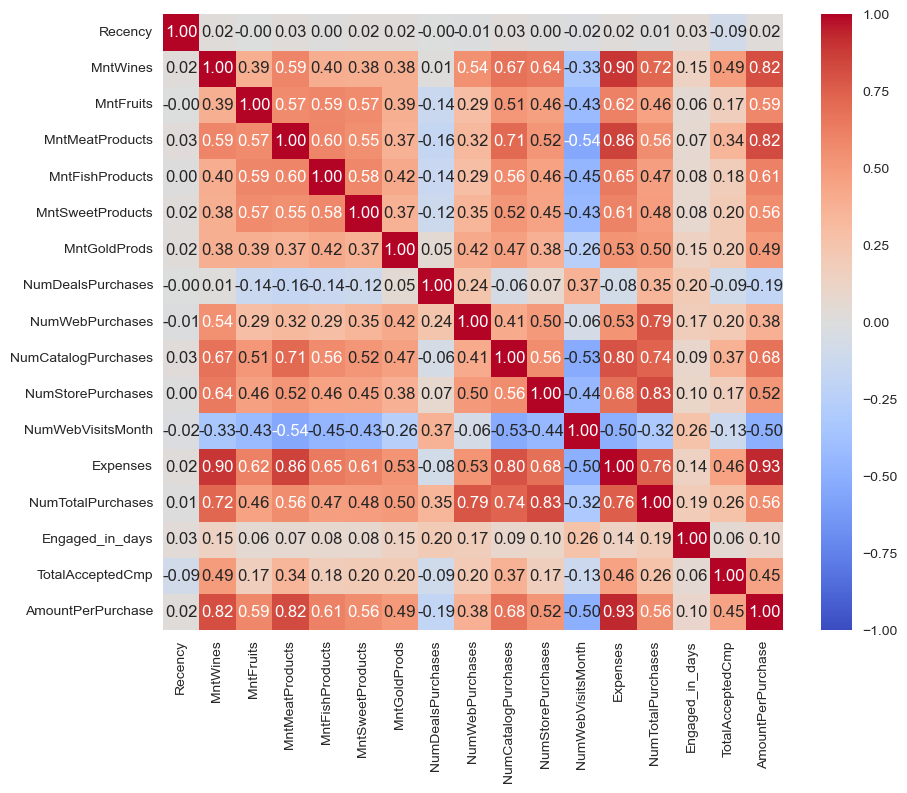

In [69]:
# Plotting the correlation plot for new data
corr_matrix = data_model.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

**We can see a slightly higher positive correlation of NumTotalPurchases with NumStorePurchases when compared to Catalog and Web. We also see a higher positive correlation with Expenses (total amount spent) with NumCatalogPurchases. We also see Expenses highly correlated with Wine and Meat purchases.**

### Scaling the Data

We will scale the data to avoid the problem of one feature dominating over others (due to high variance in units/ranges) because the unsupervised learning algorithm uses distance to find the similarity between data points.

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [70]:
# Applying standard scaler on new data
scaler = StandardScaler()                                                   
df_scaled = pd.DataFrame(scaler.fit_transform(data_model), columns = data_model.columns)

df_scaled.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.306898  0.978835   1.549301         1.754810         2.454945   
1 -0.383890 -0.874222  -0.638206        -0.730913        -0.652287   
2 -0.798364  0.358179   0.568694        -0.173927         1.339997   
3 -0.798364 -0.874222  -0.562775        -0.666468        -0.506065   
4  1.550318 -0.393140   0.417831        -0.215355         0.151938   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.470586      0.841482           0.357409         1.404603   
1         -0.633579     -0.732520          -0.170522        -1.120085   
2         -0.149863     -0.041495          -0.698453         1.404603   
3         -0.585207     -0.751715          -0.170522        -0.759416   
4         -0.004748     -0.559764           1.413271         0.322594   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0             2.632519          -0.562152           0.696492  1.683980   
1            -0.586665          -1.179950          -0.137052 -0.963363   
2            -0.228978           1.291243          -0.553824  0.283719   
3            -0.944352          -0.562152           0.279720 -0.920073   
4             0.128710           0.055646          -0.137052 -0.305690   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0           1.329247         1.976035          0.619609           1.128474  
1          -1.168495        -1.666996         -0.503558          -0.984186  
2           0.803407        -0.172750         -0.503558           0.155077  
3          -0.905575        -1.925367         -0.503558          -0.909587  
4           0.540486        -0.822984         -0.503558          -0.362446

## **Applying T-SNE and PCA**

### **Applying T-SNE**

<AxesSubplot:xlabel='0', ylabel='1'>

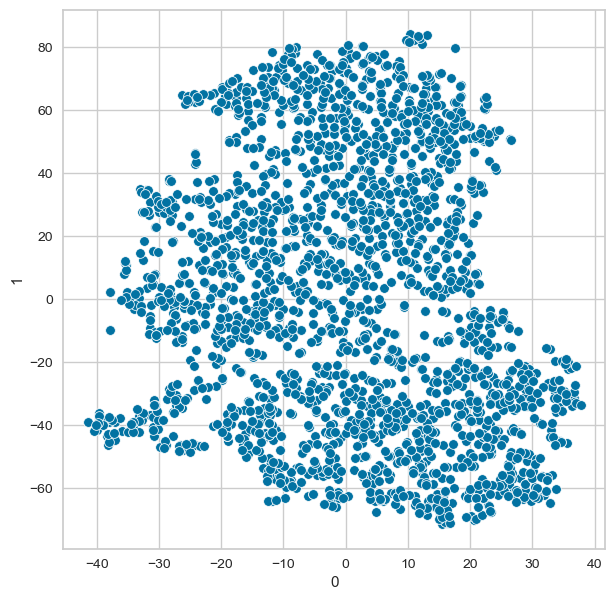

In [71]:
# Initializing TSNE
tsne = TSNE(n_components=2, random_state=1, perplexity=35)        

# Fitting TSNE 
data_tsne = tsne.fit_transform(df_scaled)     

# Converting the embeddings to a dataframe
data_tsne = pd.DataFrame(data_tsne, columns=[0, 1])           

# Scatter plot for two components
plt.figure(figsize=(7, 7))                                                    
sns.scatterplot(x=0, y=1, data=data_tsne)                             

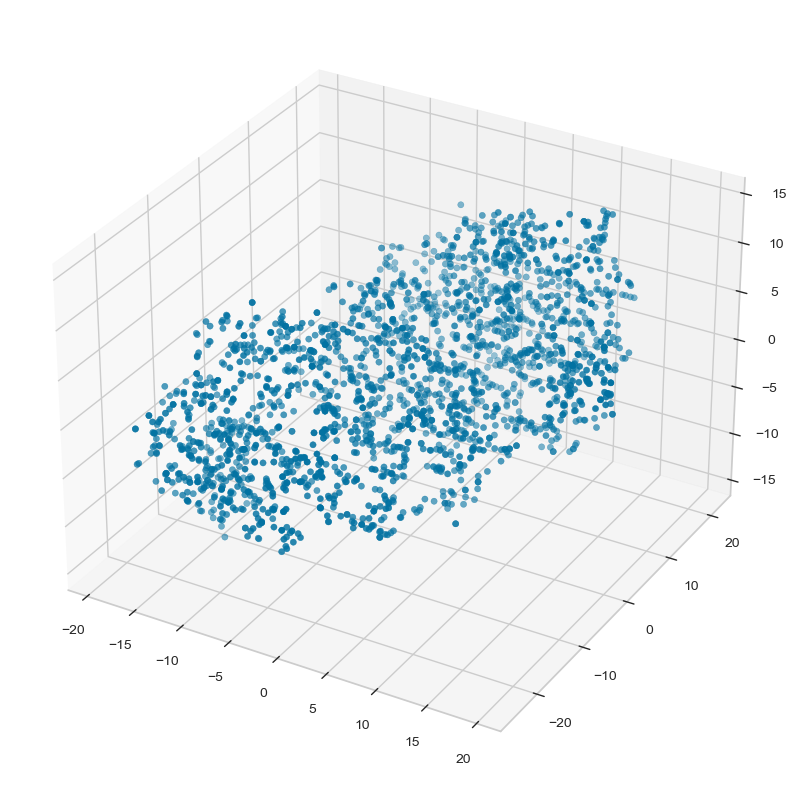

In [72]:
tsne = TSNE(n_components = 3, random_state = 1)
data_tsne = tsne.fit_transform(df_scaled)
data_tsne = pd.DataFrame(data_tsne, columns = [0,1,2])

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
x = data_tsne[0]
y = data_tsne[1]
z = data_tsne[2]
ax.scatter(x,y,z)
plt.show()


Our t-SNE visualizations are reflecting no underlying pattern in the data. Let us try altering the perplexity parameter to see if there is any effect in visualizing clusters.

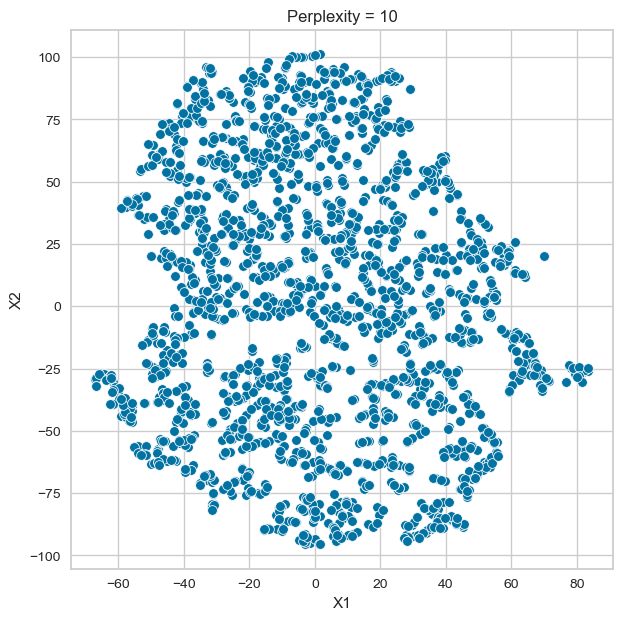

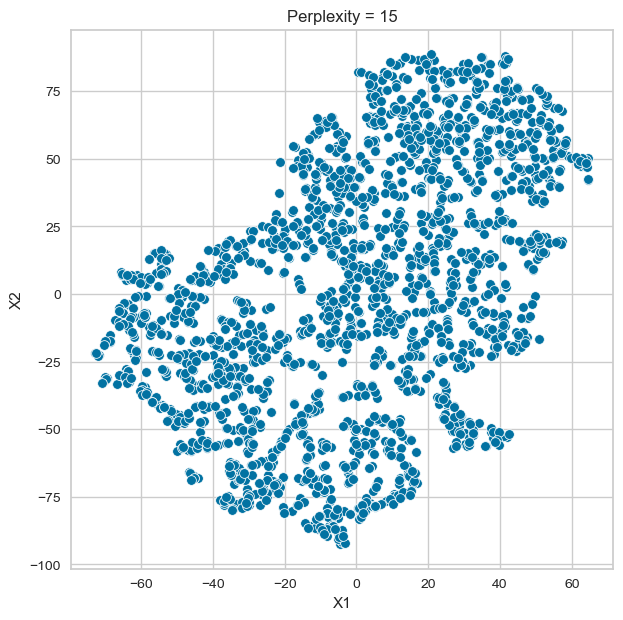

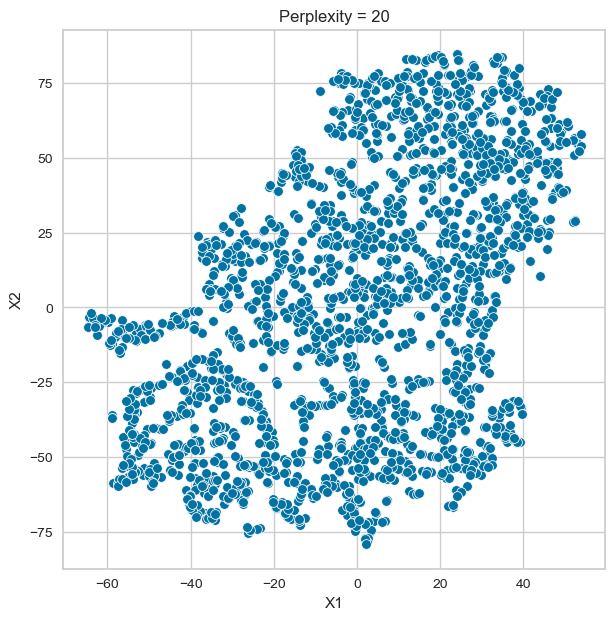

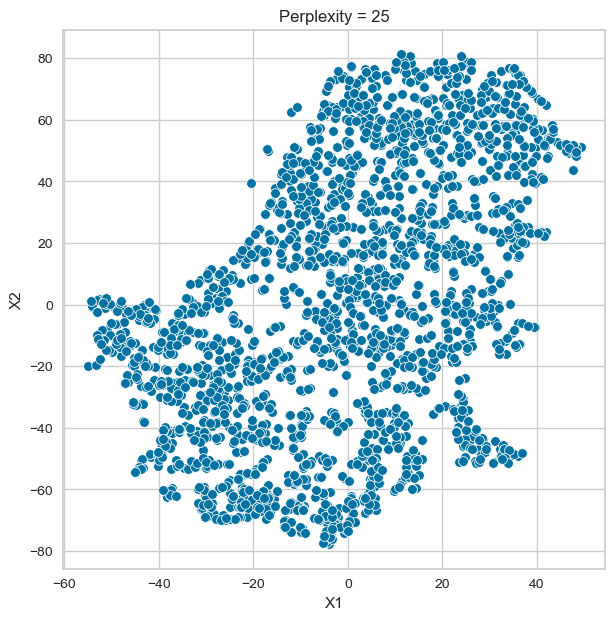

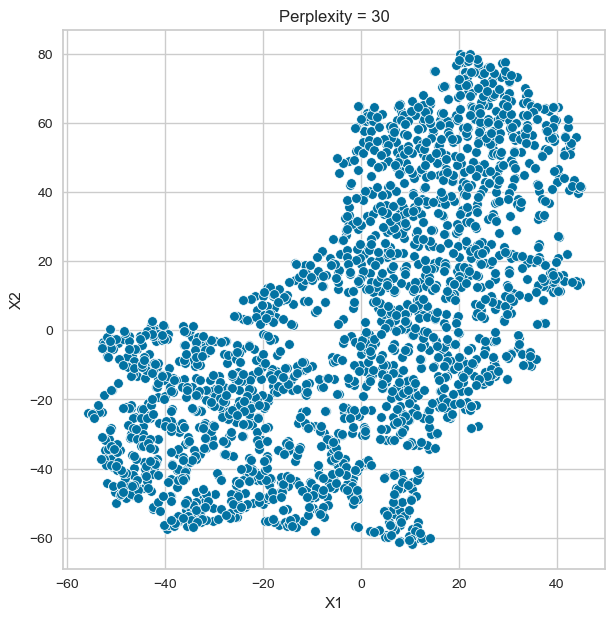

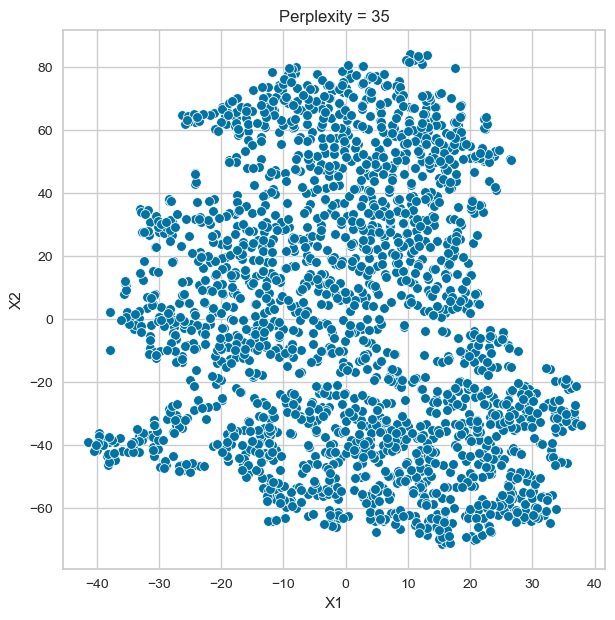

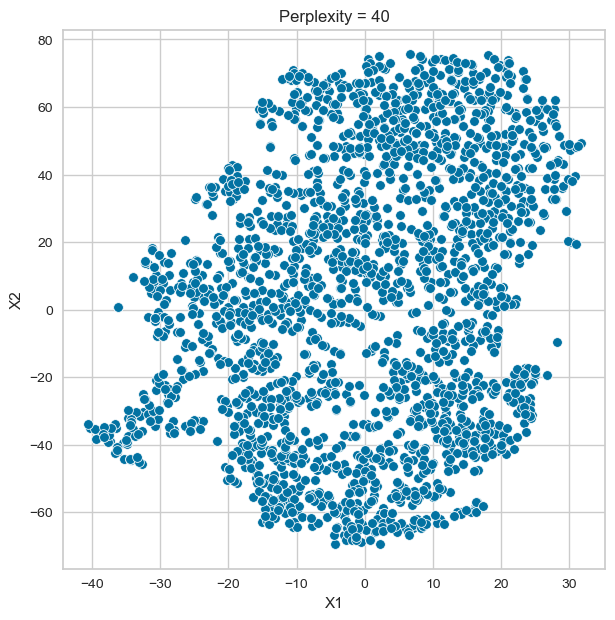

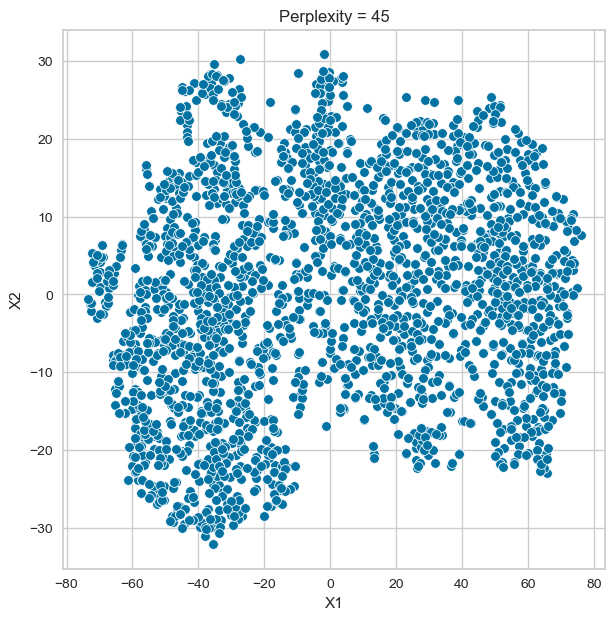

In [73]:
# We will visualize T-SNE with different values of perplexity (in increments of 5) in 2d space
for i in range(10,50,5):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    data_tsne = tsne.fit_transform(df_scaled)
    data_tsne = pd.DataFrame(data_tsne)
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7,7))
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    plt.title('Perplexity = {}'.format(i))

**t-SNE is still unable to determine any underlying patterns in our data, even after tuning the hyperparameter to adjust balance between the local and global structure. Let us now utilize PCA before performing various clustering algorithsm**

### **Applying PCA**

When the variables used in clustering are highly correlated, it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or bias toward a few variables). PCA can be used to reduce the multicollinearity between the variables. 

In this case, PCA will help our models by eliminating irrelevant features, enhancing cluster separation, and reduce computing times.

In [74]:
# Defining the number of principal components to generate
n = df_scaled.shape[1]                                        
pca = PCA(n_components=n, random_state=1)                                       
data_pca = pd.DataFrame(pca.fit_transform(df_scaled))                      

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_     


**Let's plot the first two components and see how the data points are distributed.**

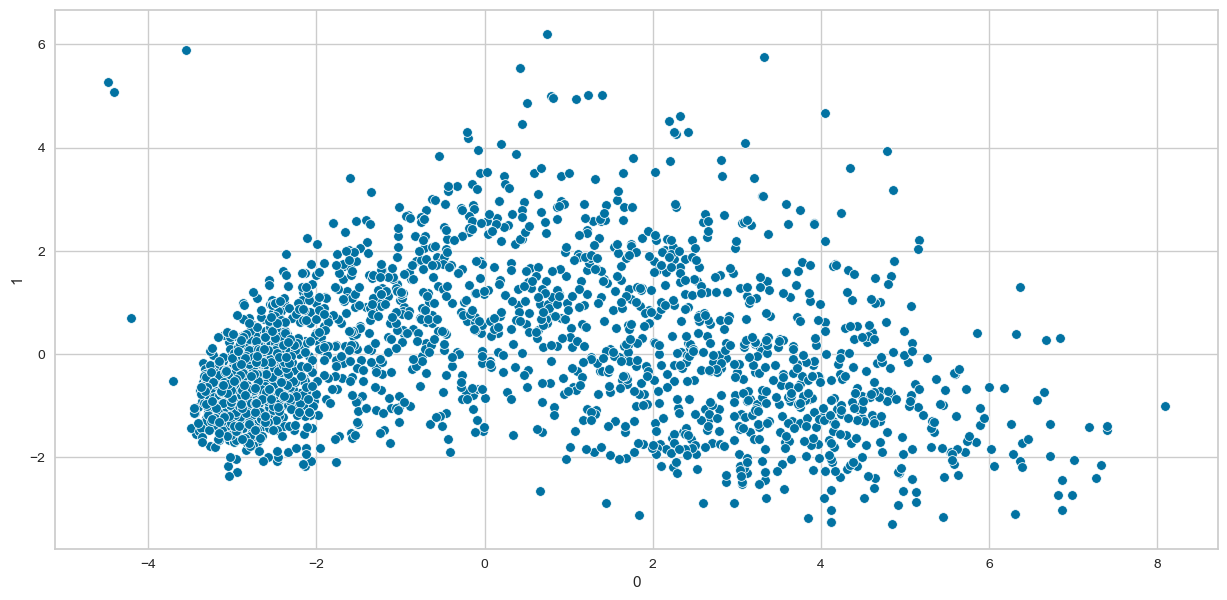

In [75]:
# Scatter plot for two components using the dataframe data_pca
plt.figure(figsize = (15,7))
sns.scatterplot(x=0, y=1, data=data_pca)
plt.show()

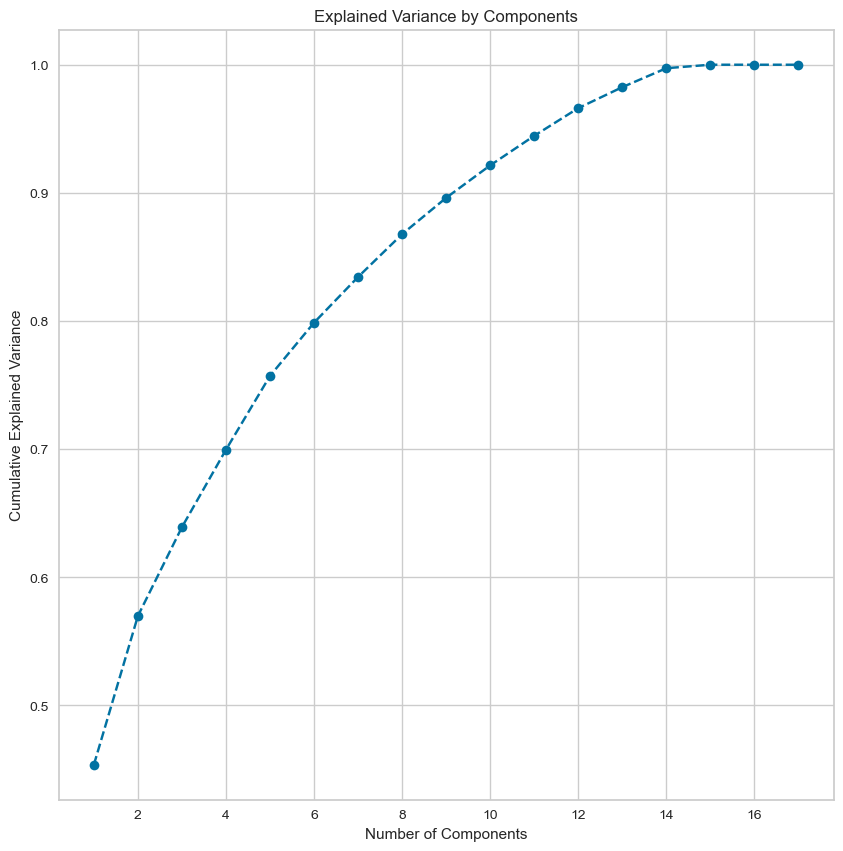

In [76]:
# Plotting explained cumulative variance by principal components
plt.figure(figsize = (10,10))
plt.plot(range(1,18), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

**With 5 components we can explain over 75% of the variance. Let's apply clustering algorithms on the data generated after applying PCA**

## **K-Means** 

In [77]:
distortions = []

# Setting the K range from 2 to 10
K = range(2, 10)    

# Initializing K-Means
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=1)              
    kmeanModel.fit(data_pca)  
    distortions.append(kmeanModel.inertia_)                      

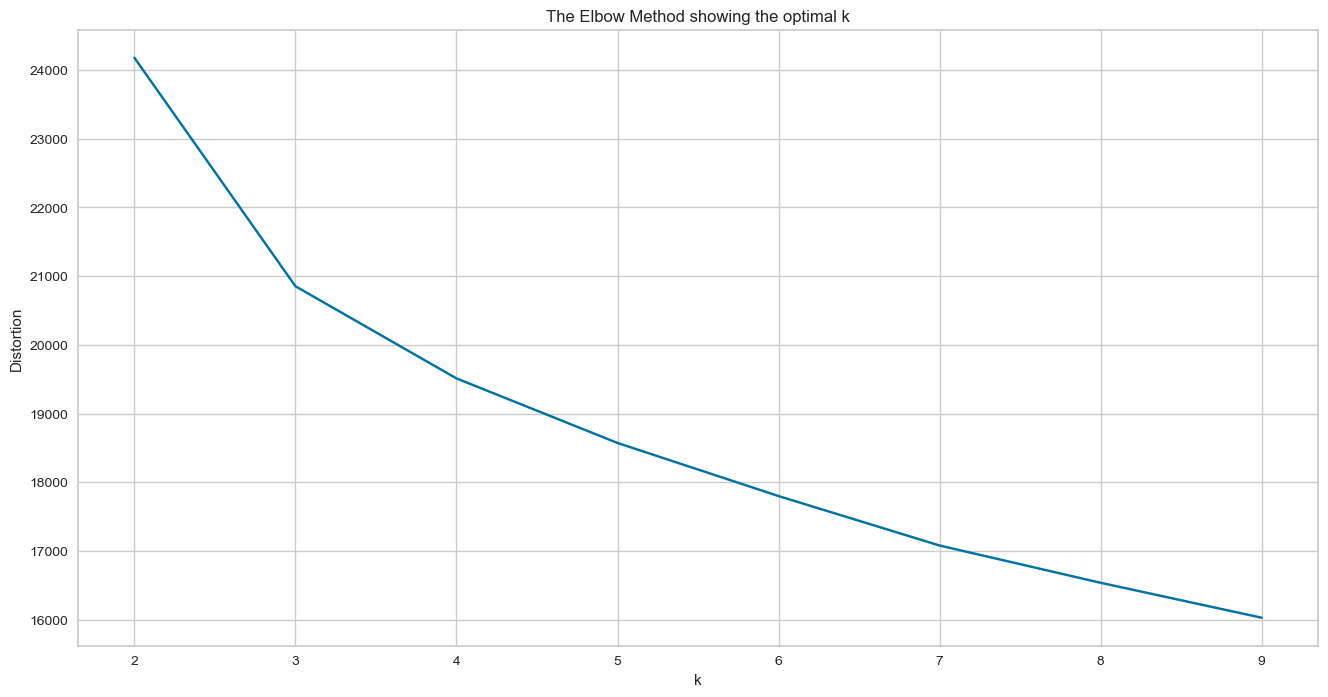

In [78]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            
plt.plot(K, distortions, "bx-")                                        
plt.xlabel("k")                                                        
plt.ylabel("Distortion")                                               
plt.title("The Elbow Method showing the optimal k")                   
plt.show()

**In the above plot, the elbow is seen for K=3 and K=5 as there is some drop in distortion at K=3 and K=5.**

**We can use the silhouette score as a metric for different K values to make a better decision about picking the number of clusters(K).**

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the clusters are dense and well separated, which is good.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

**Finding silhouette score for each value of K**

In [79]:
sil_score = []                                                             
cluster_list = range(3, 9)                                                 
for n_clusters in cluster_list:
    
    # Initializing K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    
    # Fitting and predicting on the pca data
    preds = clusterer.fit_predict(data_pca) 
    
    # Calculating silhouette score
    score = silhouette_score(data_pca, preds)  
    
    # Appending silhouette score to empty list created above
    sil_score.append(score)         
    
    # Printing the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))  

For n_clusters = 3, the silhouette score is 0.27589254958656423)
For n_clusters = 4, the silhouette score is 0.2532443653608887)
For n_clusters = 5, the silhouette score is 0.23925196048144864)
For n_clusters = 6, the silhouette score is 0.12873685612799426)
For n_clusters = 7, the silhouette score is 0.12993088567849326)
For n_clusters = 8, the silhouette score is 0.12341373550436284)


**From the above silhouette scores, 3 appears to be a good value of K. So, let's build K-Means using K=3.**

### **Applying K-Means on data_pca**

In [80]:
# Initializing the K-Means algorithm with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)                               
kmeans.fit_transform(data_pca)                                     

array([[5.58332364, 3.85151043, 8.06057599],
       [4.81466811, 6.97410921, 1.83228291],
       [2.65375401, 3.66685699, 4.7750128 ],
       ...,
       [4.00080486, 4.04721612, 5.6262717 ],
       [2.69288921, 3.38102529, 4.99188716],
       [3.3562034 , 6.09427474, 1.86712338]])

In [81]:
# Adding K-Means cluster labels to dataset iterations
data_pca["K_means_segments_3"] = kmeans.labels_                    
data["K_means_segments_3"] = kmeans.labels_                        
data_model["K_means_segments_3"] = kmeans.labels_                  

<AxesSubplot:>

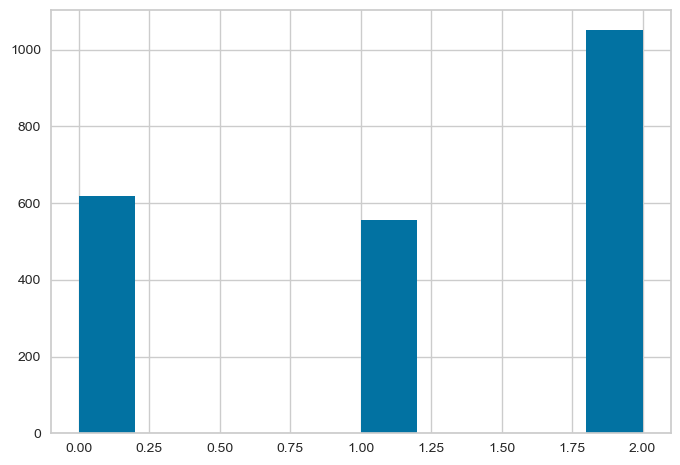

In [82]:
# Checking cluster distribution
data_model["K_means_segments_3"].hist()

In [83]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)

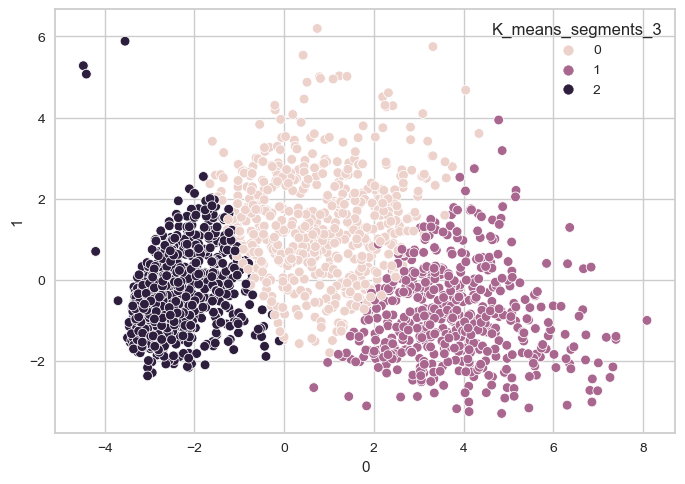

In [84]:
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

**K-Means have given us 3 distinct clusters with some slight overlap. So far this is looking good but let's check the cluster profile to see if we can determine more insights.**

### **Cluster Profiling**

In [85]:
# Taking the cluster-wise mean of all the variables
cluster_profile_KMeans_3 = data.groupby('K_means_segments_3').mean()

In [86]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)

In [87]:
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

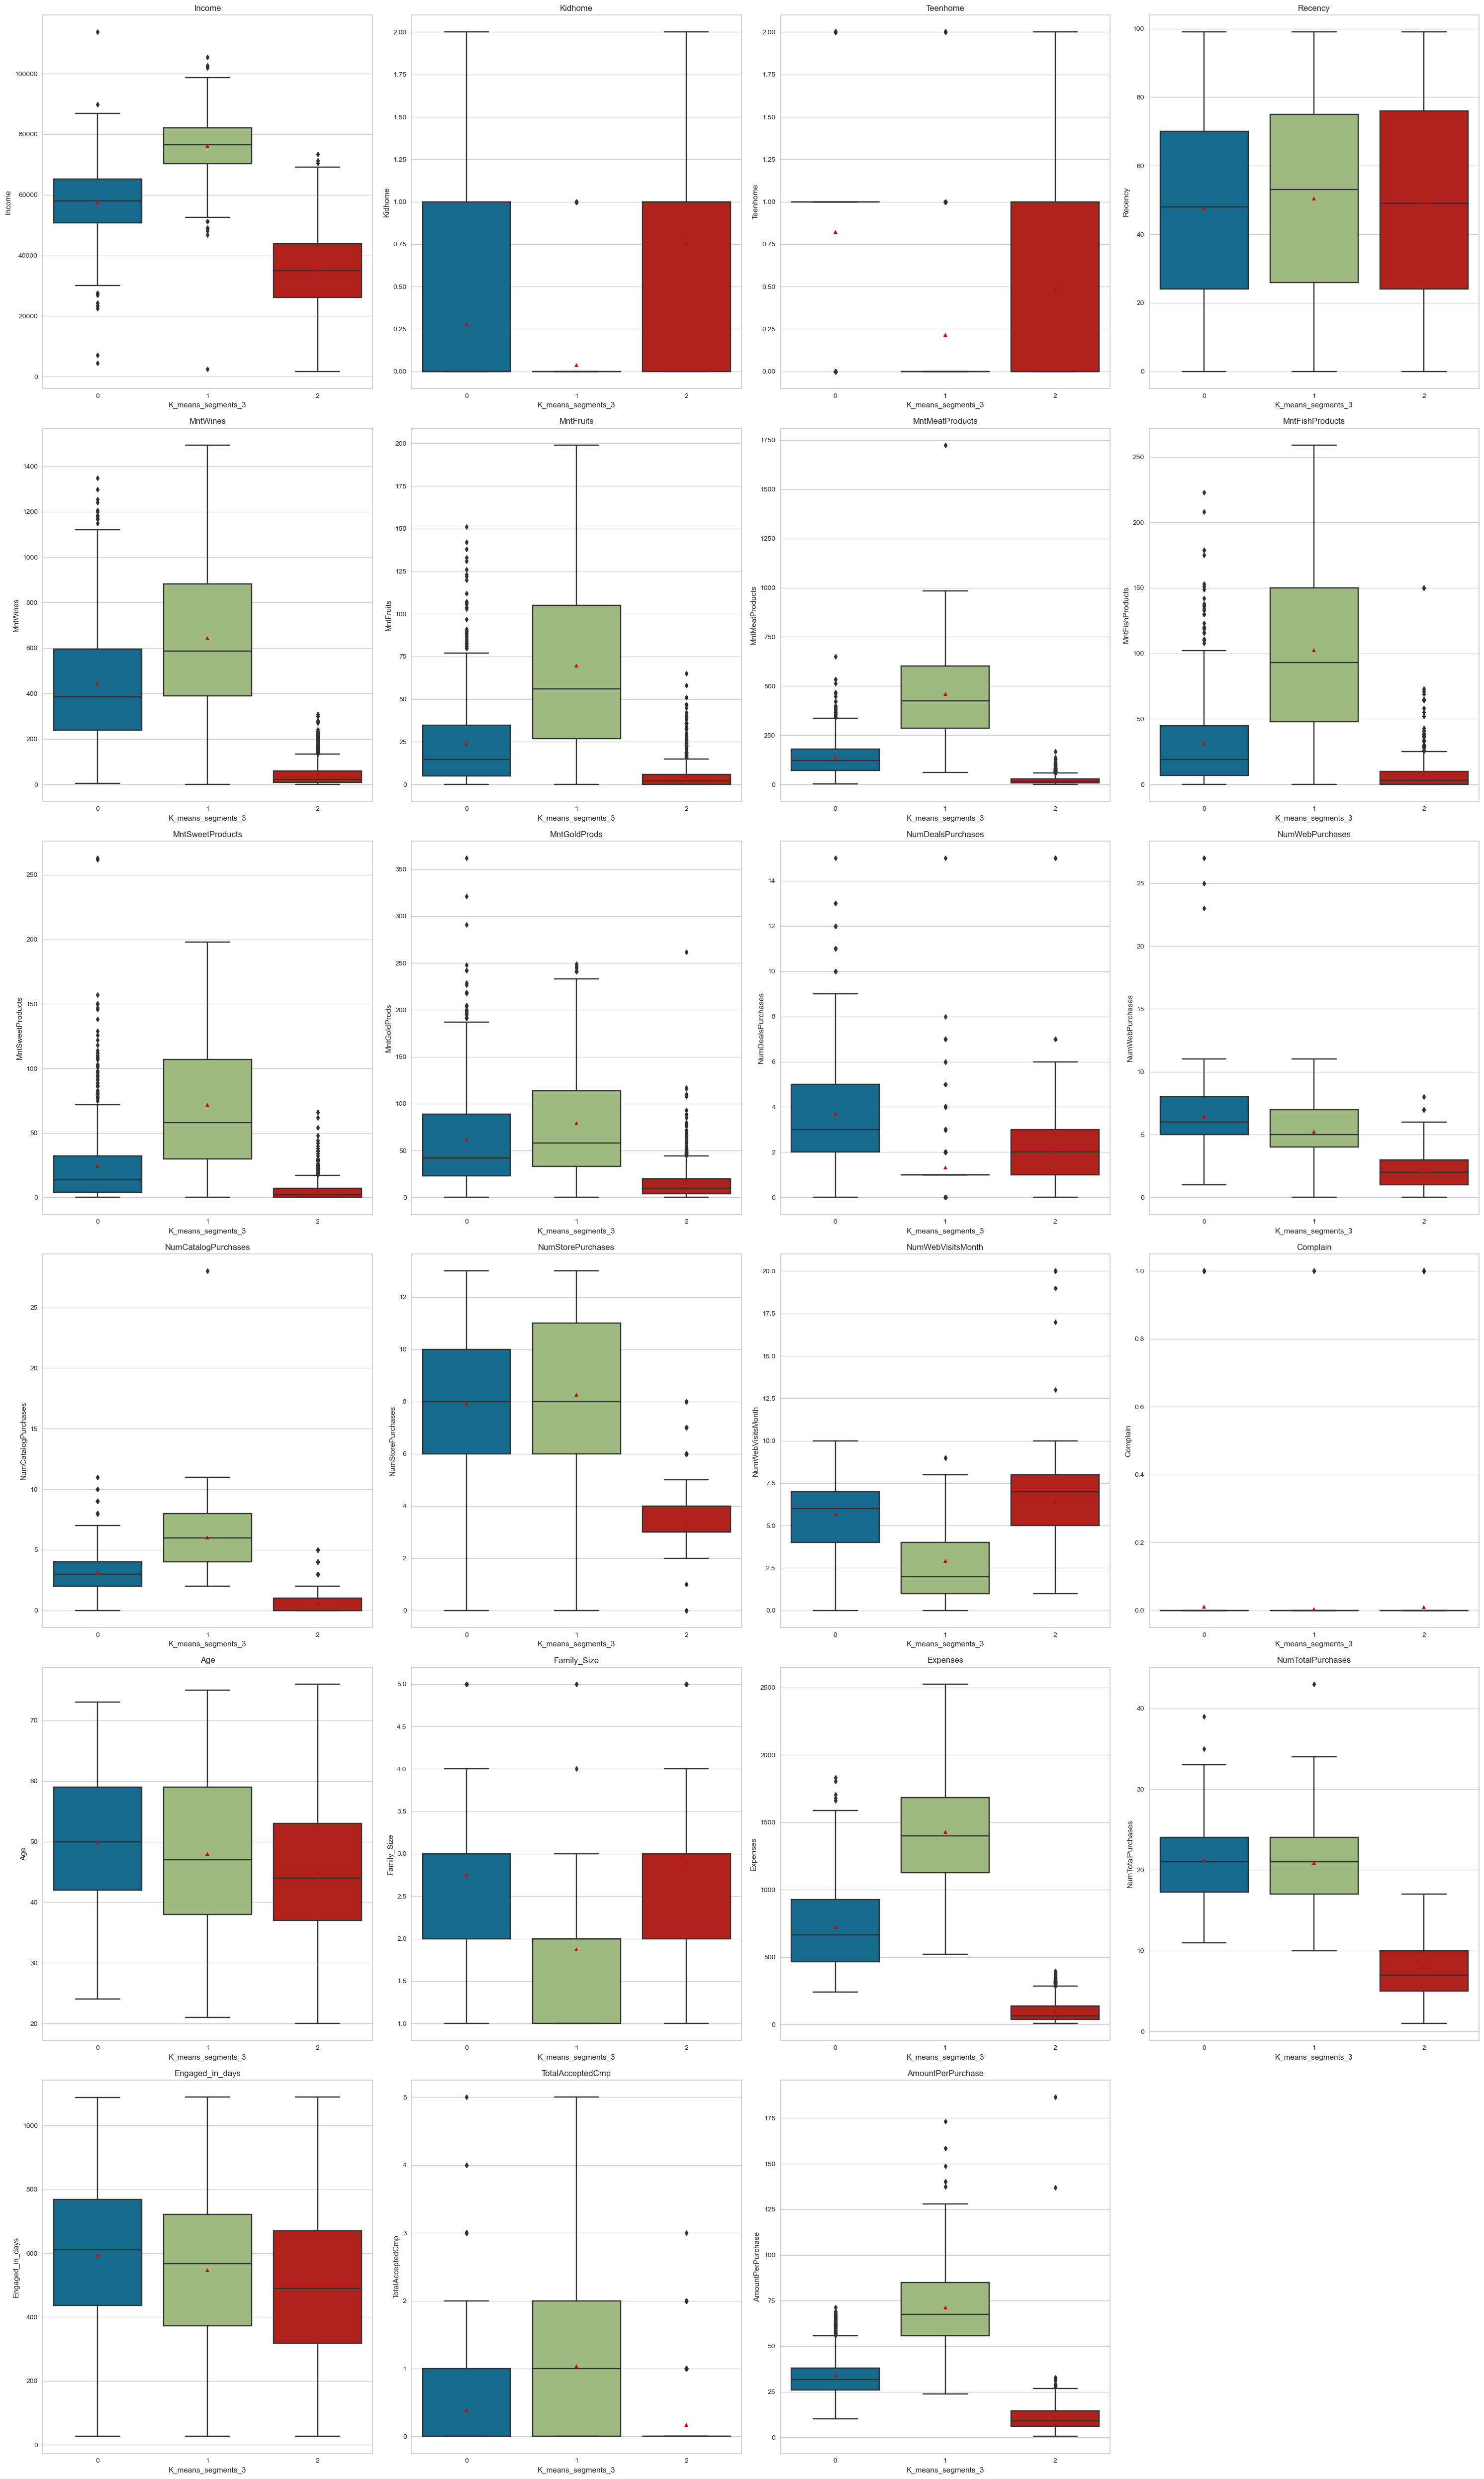

In [88]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_means_segments_3'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster:**



**Cluster 0:**
*Contains moderate spenders despite a high quanity of web purchases. They accept campaigns moderately, primarily purchase online, and are ready to act on discounts/deals. Their demographic is slightly older with moderate income, older children, and a mix of Single and in a Relationship. They are also the most likely to file a complaint.*

**Cluster 1:**
*Are the highest purchasers but are moderately active. They spend substantially higher regardless of discounts/deals and do so in-store and through catalog. They do not frequent the website, but when they do they purchase a moderate-high amount. Their demographic consists of high-income middle-aged individuals with smaller family sizes.*

**Cluster 2:**
*Represents low-spending customers. They make virtually no purchases via Catalog but frequent the website more than our other groups. Despite these visits, purchase quantities are relatively low. Their primary purchases, while still low in quantity, are Meat and Wine by a decent margin. They are the least likely to respond to a campaign. Their demographic is slightly younger low-income individuals with the highest family size.*

We can see from the above profiles that K=3 segments the customers into High, Medium and Low Income/Purchasing customers. Let's try to build K=5 (which has another elbow in the Elbow curve) to see if we can determine better behavioral cluster profiles.

In [89]:
# Dropping labels we got from K=3
data_pca.drop(labels = 'K_means_segments_3', axis=1, inplace=True)
data.drop(labels = 'K_means_segments_3', axis=1, inplace=True)
data_model.drop(labels = 'K_means_segments_3', axis=1, inplace=True)

**Let's build K-Means using K=5**

In [90]:
# Fitting the K-Means algorithm using number of cluster as 5
kmeans = KMeans(n_clusters=5, random_state=1)                               
kmeans.fit_transform(data_pca) 

array([[8.14155826, 3.93455635, 4.48152009, 5.25762791, 6.23745244],
       [1.75737648, 7.01291892, 7.84243106, 5.15236284, 4.50403337],
       [4.82691008, 3.69114682, 4.94811383, 2.02163816, 3.78978648],
       ...,
       [5.66287275, 4.47507664, 4.251885  , 3.5563448 , 4.91049368],
       [5.04407553, 3.42097885, 4.72005025, 1.92009385, 3.90147877],
       [1.97064761, 6.3426994 , 6.55753717, 4.12698016, 2.61245474]])

In [91]:
# Adding labels
data_pca['K_means_segments_5'] = kmeans.labels_
data['K_means_segments_5'] = kmeans.labels_
data_model['K_means_segments_5'] = kmeans.labels_

<AxesSubplot:>

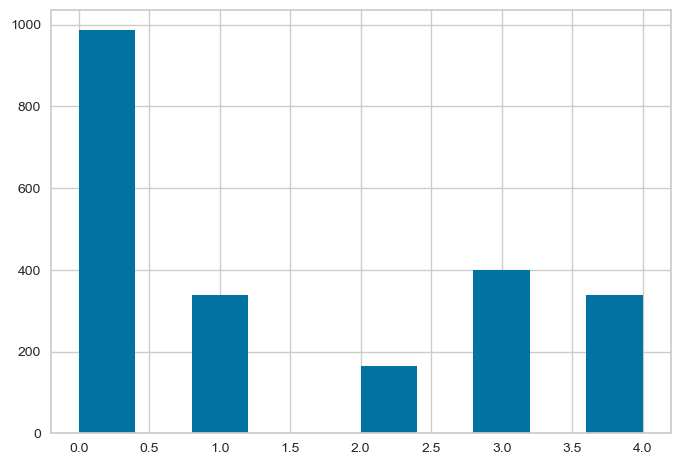

In [92]:
# Checking distribution
data_model["K_means_segments_5"].hist()

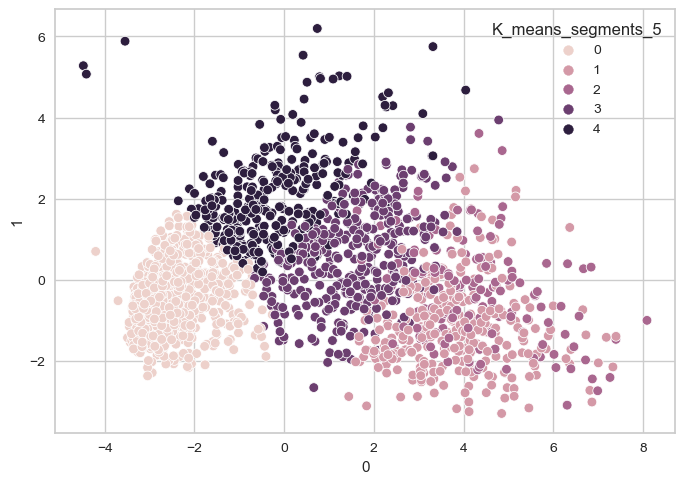

In [93]:
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
    
PCA_PLOT(0, 1, data_pca, "K_means_segments_5")

### **Cluster Profiling**

In [94]:
# Take the cluster-wise mean of all the variables. Hint: First groupby 'data' by cluster labels column and then find mean
cluster_profile_KMeans_5 = data.groupby('K_means_segments_5').mean()

In [95]:
# Highlight the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_5.style.highlight_max(color="lightgreen", axis=0)

**Let's plot the boxplot**

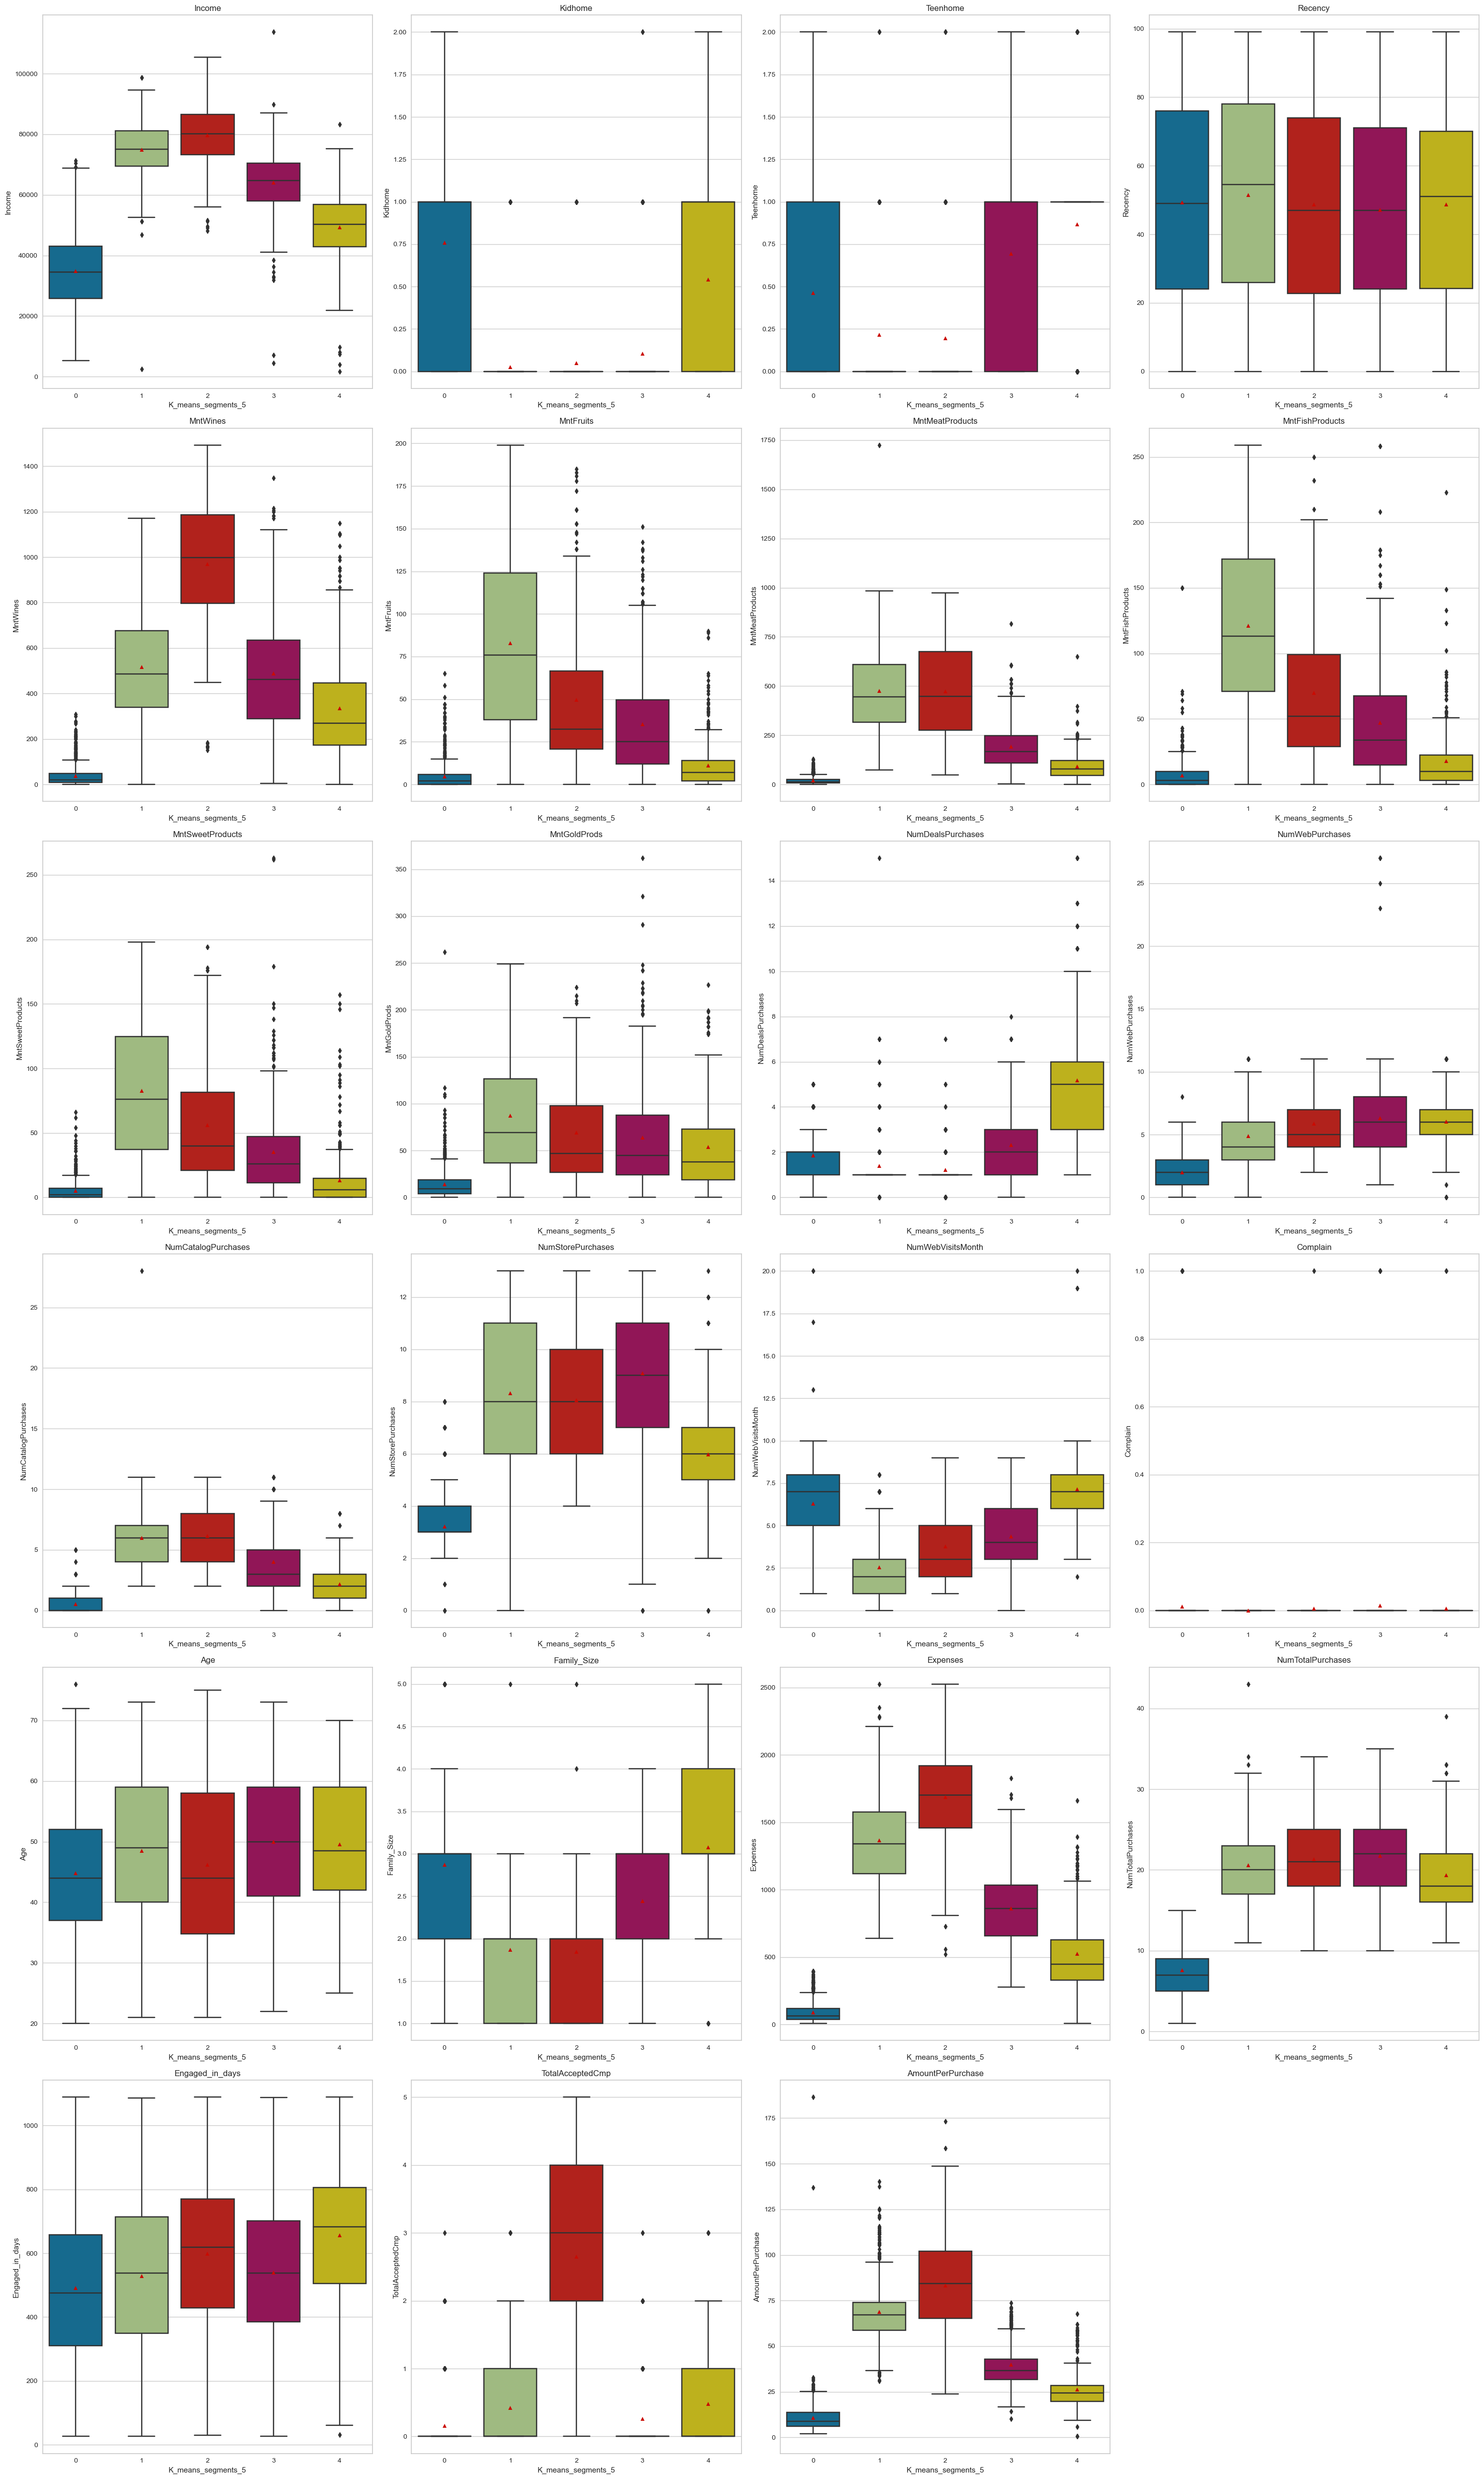

In [96]:
# Create boxplot for each of the variables
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['K_means_segments_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

From the above profiles, K=5 provides more interesting insights about customer's purchasing behavior and preferred channels for purchasing products. We can also see that the High, Medium and Low income groups have different age groups and preferences, which was not evident in K=3. So, **we can choose K=5.**

**Cluster 0** *Accounts for the least amount of purchases, but still frequents the web relatively often. These could be potential customers.*

**Cluster 1** *Are the most frequent purchasers of products, and purchase fish and fruit at a substantially higher amount.* 

**Cluster 2** *Are the most responsive to campaigns, the highest spenders, and purchase the most wine by a large margin. They are also frequent purchasers of these products.* 

**Cluster 3** *Spends the most online and in-store and are frequent purchasers.*

**Cluster 4** *Are the most likely to act on deals/discounts and are most likely to frequent the web. These are long-term customers.*

In [97]:
# Dropping labels 
data_pca.drop(labels = 'K_means_segments_5', axis=1, inplace=True)
data.drop(labels = 'K_means_segments_5', axis=1, inplace=True)
data_model.drop(labels = 'K_means_segments_5', axis=1, inplace=True)

## **K-Medoids**

**Let's find the silhouette score for K=4 in K-Medoids**

In [98]:
# Initializing K-Medoids
kmedo = KMedoids(n_clusters = 5, random_state=1)           
preds = kmedo.fit_predict(data_pca)            

# Calculating silhouette score
score = silhouette_score(data_pca, preds)          

print(score)                  

0.11877423017715671


In [99]:
# Adding labels
data_pca['KMed_segments'] = kmedo.labels_
data['KMed_segments'] = kmedo.labels_
data_model['KMed_segments'] = kmedo.labels_

<AxesSubplot:>

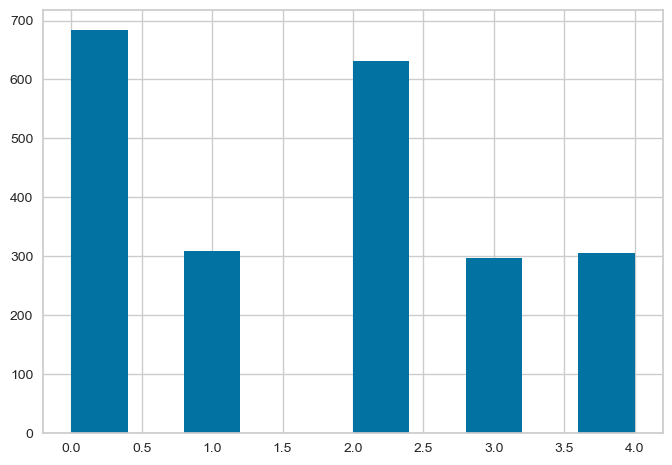

In [100]:
# Checking distribution
data_model["KMed_segments"].hist()

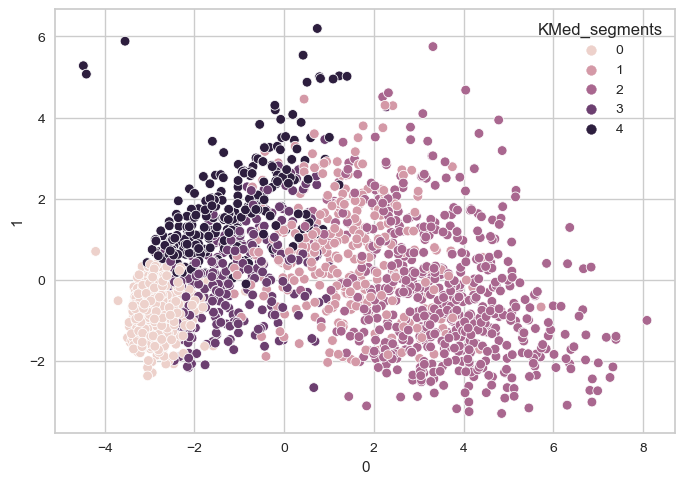

In [101]:
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
    
PCA_PLOT(0, 1, data_pca, "KMed_segments")

### **Cluster Profiling**

In [102]:
kmed_cluster_profile = data.groupby('KMed_segments').mean()

In [103]:
# Highlighting the maximum average value among all the clusters for each of the variables
kmed_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

**Let's plot the boxplot**

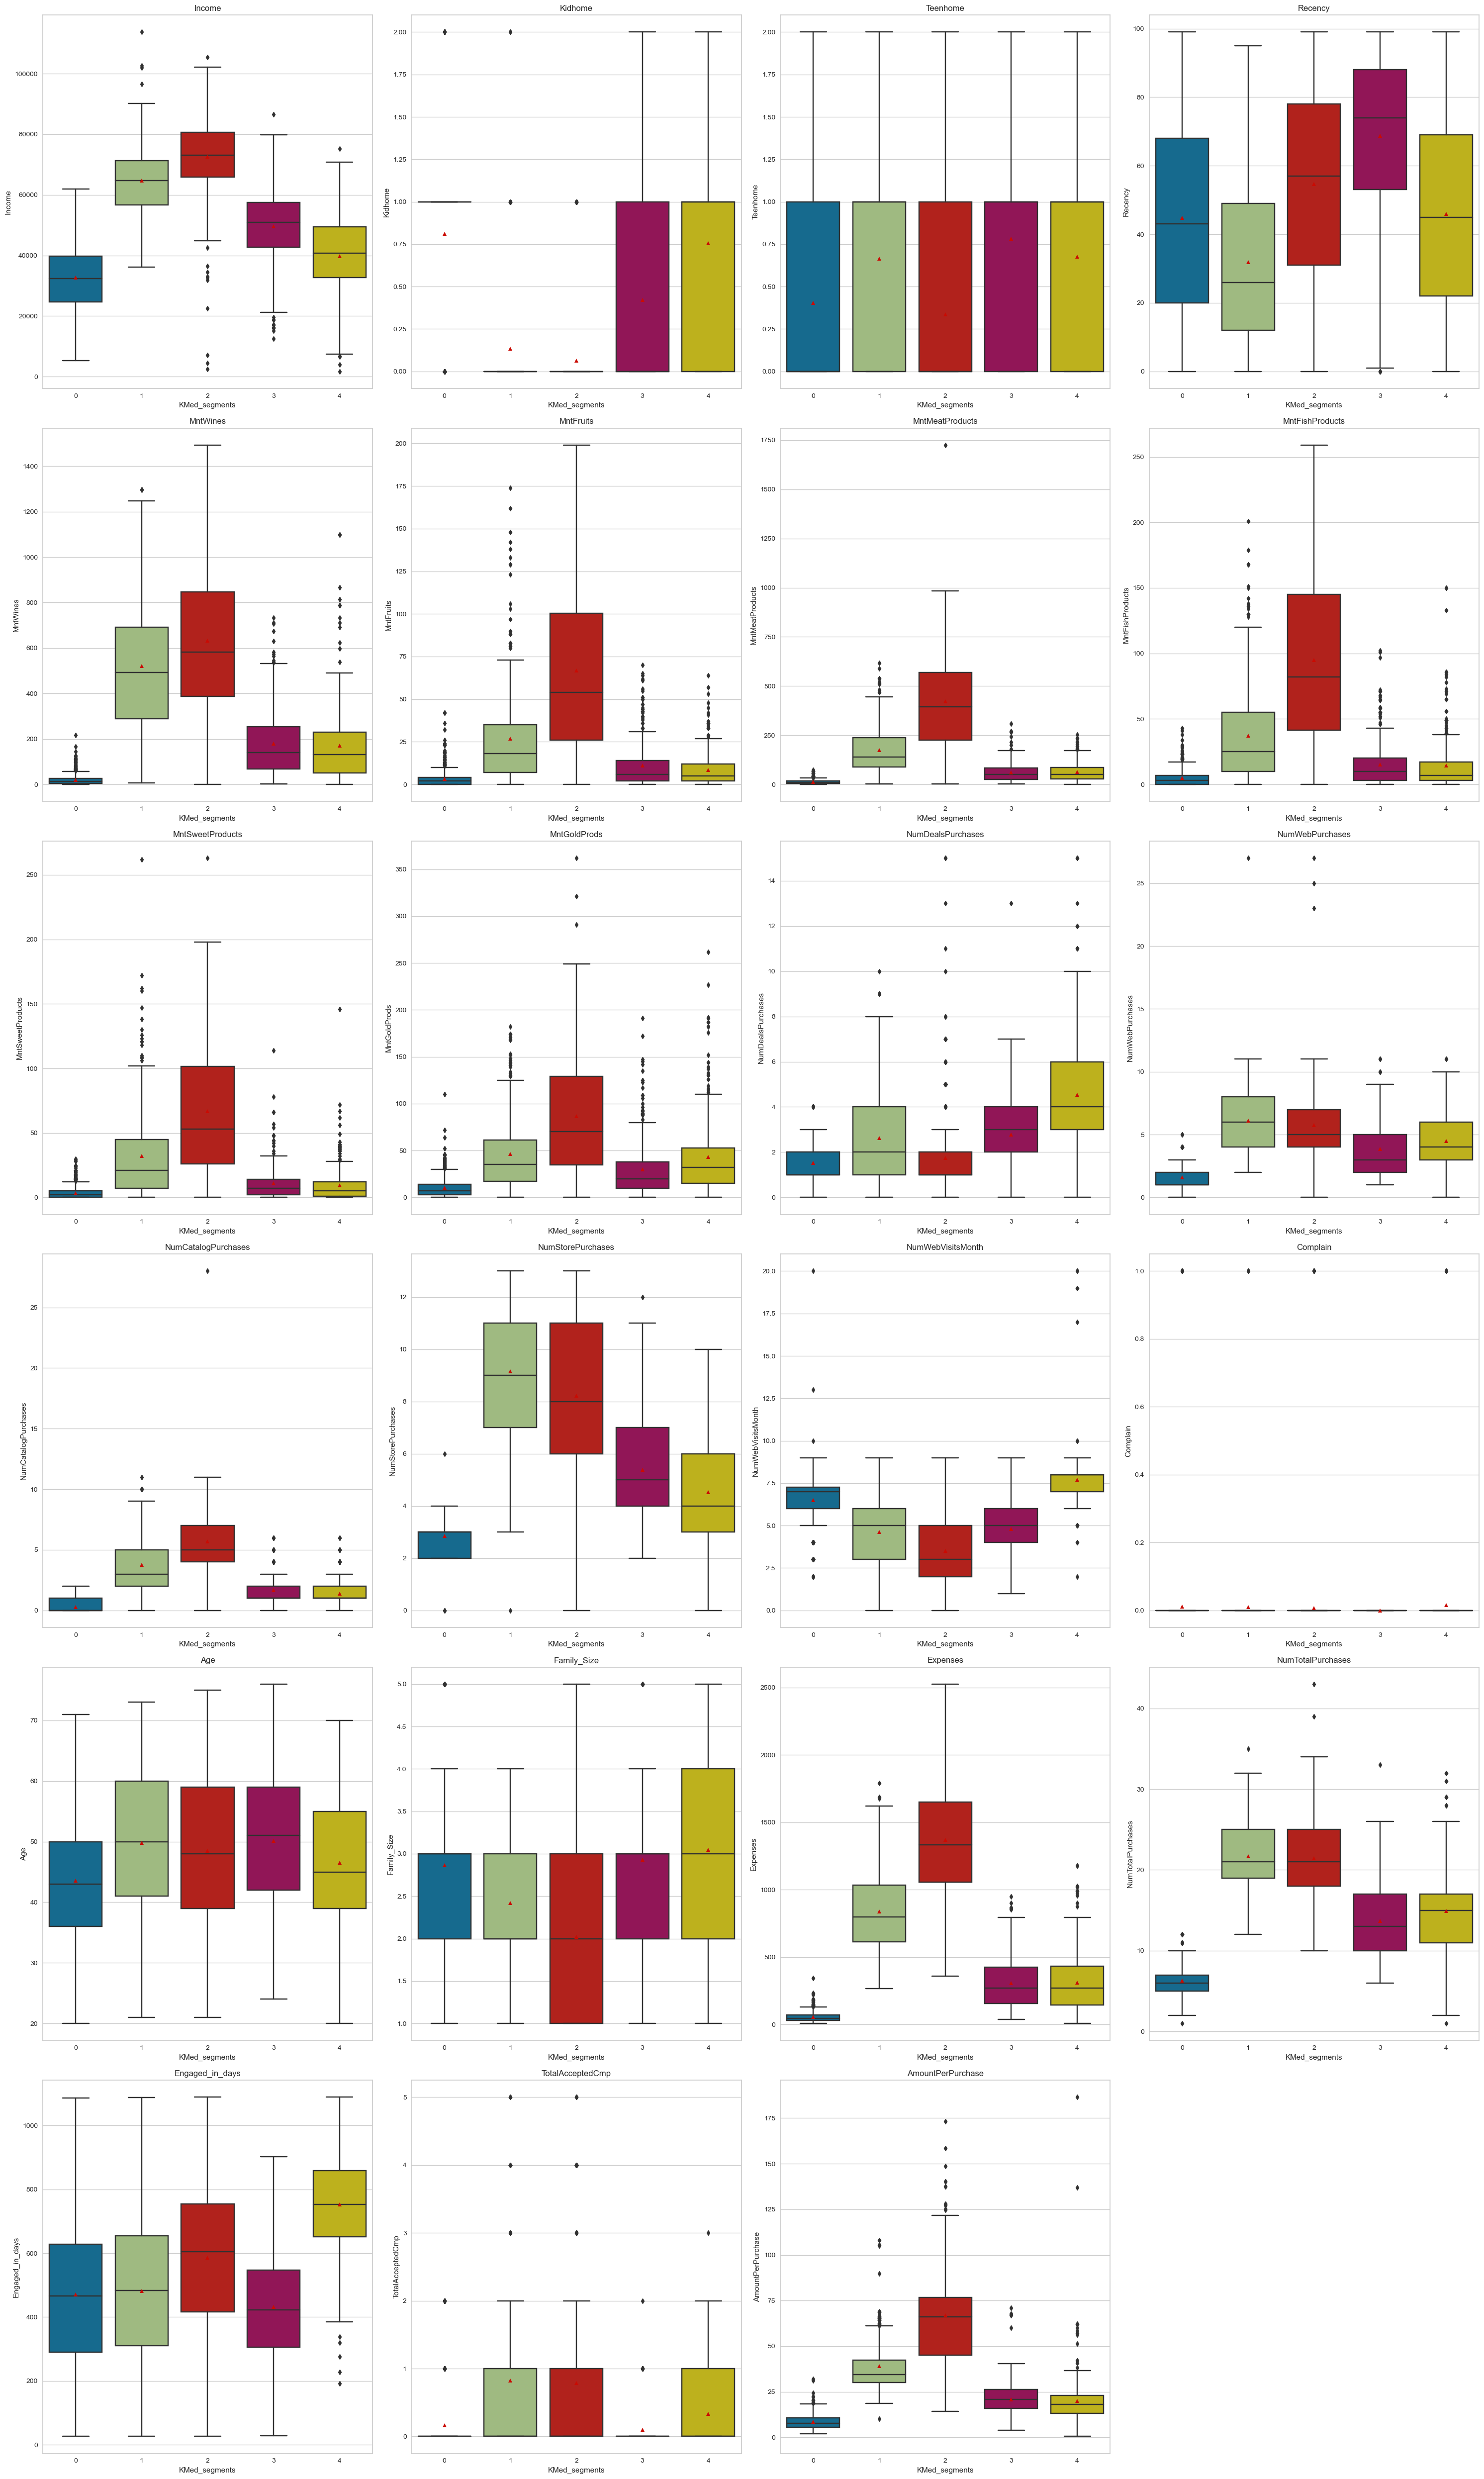

In [104]:
# Creating boxplot for each of the variables
plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['KMed_segments'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Cluster Characteristics**

**K-Medoids seems to have done a sufficient job in providing more variety in Recency, NumWebPurchases, NumCatalogPurchases, and NumStorePurchases than our K-Means algorithm. We have lost some of the specific product distinctions, especially between Cluster 3 and Cluster 4. These obversations can let us conclude K-Medoids has segmented our customer data by favoring the type of traffic/shopping methods used.**

**Cluster 0** *Consists of customers with low-spending and low-quantity purchases. Despite this, they account for the 2nd highest amount of web visits per month. They are the youngest group, with the lowest income and most children.*

**Cluster 1** *Consists of frequent customers purchasing the highest amount of products in-store and via web. They are the most responsive to campaigns and are the 2nd highest spenders, and 2nd highest income group.*

**Cluster 2** *Are the highest purchasers via Catalog, and 2nd highest via in-store. They are the highest spenders and are the 2nd highest group in number of purchases made. They also spend a substantially higher amount per purchase. They are our highest income group with the smallest family size.*

**Cluster 3** *Consists of our least-frequent customers. They purchase wine and meat in relatively high quantities and are unresponsive/accepting of campaigns. They also account for our newest customers with an average of 431 days engaged. They are relatively active with in-store and web purchasers and moderately low spenders. In terms of age, they are our oldest group but are more likely to be married and have teenage children.*

**Cluster 4** *Consists of individuals with similar product interests as Cluster 3 but they are substantially more active in deals/discounts. They also account for the highest frequency of web visits each month. They are also the longest-term customer group, with relatively low purchases/purchase amounts. They have the 2nd lowest income with the largest family size.*

In [105]:
# Dropping labels
data_pca.drop(labels = 'KMed_segments', axis=1, inplace=True)
data.drop(labels = 'KMed_segments', axis=1, inplace=True)
data_model.drop(labels = 'KMed_segments', axis=1, inplace=True)

## **Hierarchical Clustering**

Let's find the Cophenetic correlation for different distances with different linkage methods.

**The cophenetic correlation coefficient** is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. 

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms. 

**Let's calculate Cophenetic correlation for each of the distance metrics with each of the linkage methods**

In [106]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.8062100610937556.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7657893665328821.
Cophenetic correlation for Euclidean distance and average linkage is 0.8292553735872853.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7917818738616755.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7096592661697423.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7614766312922938.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6339448165023532.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.39584826893014363.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6172312275222197.
Cophenetic correlation for Cityblock distance and single linkage is 0.8158647328132629.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7223352899437288.
Cophenetic cor

In [107]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8341659122296071, which is obtained with Cityblock distance and average linkage.


**Let's have a look at the dendrograms for different linkages with `Cityblock distance`**

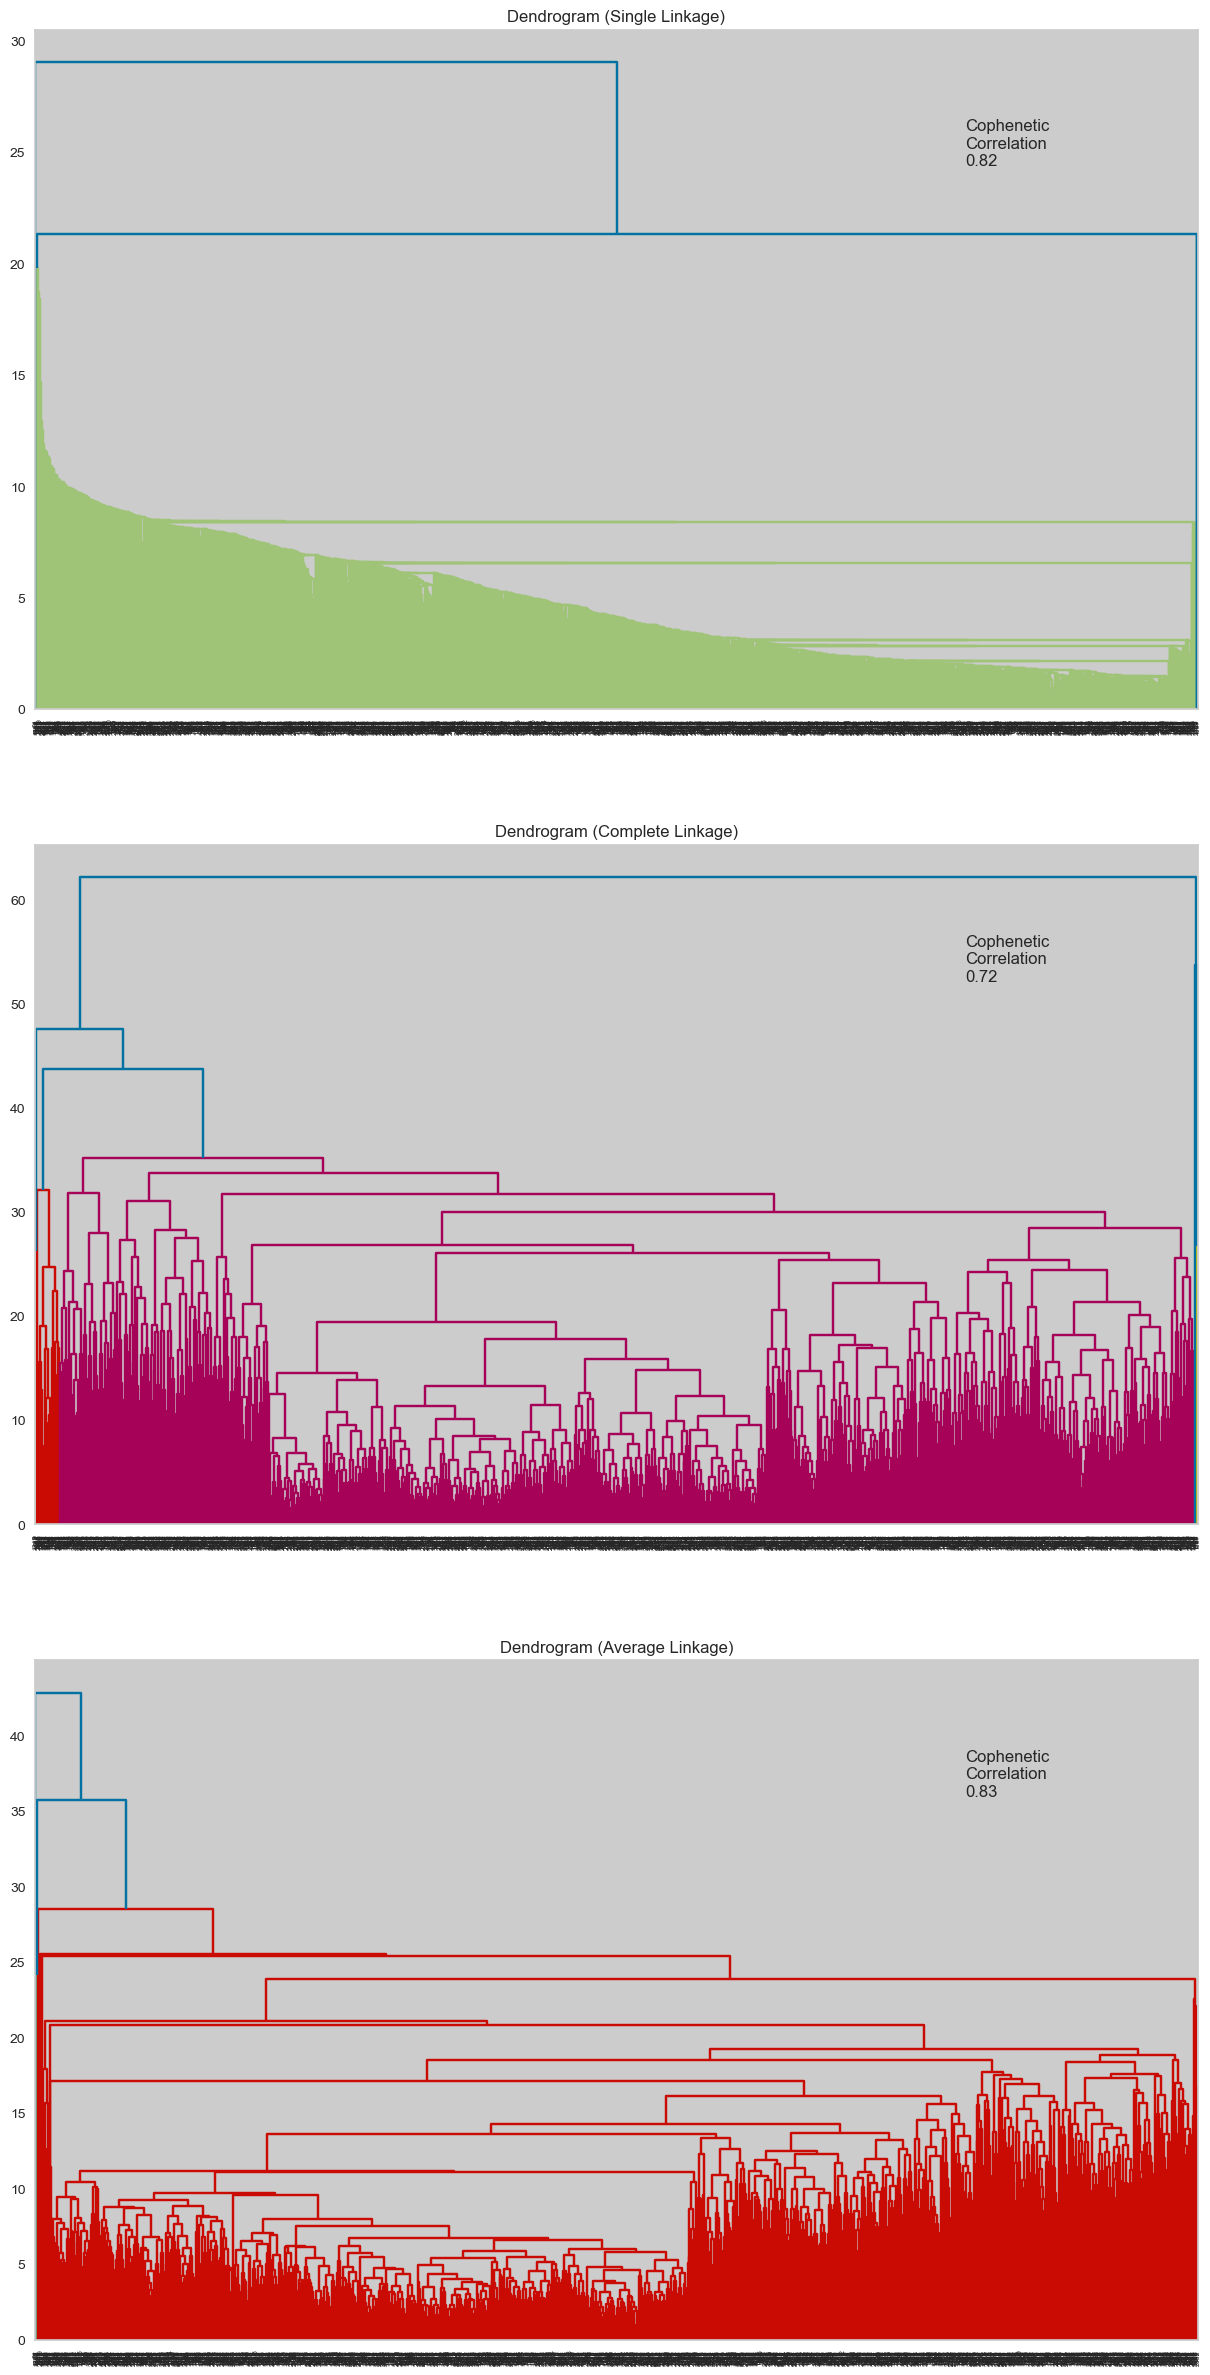

In [108]:
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Let's have a look at the dendrograms for different linkages with `Chebyshev distance`**

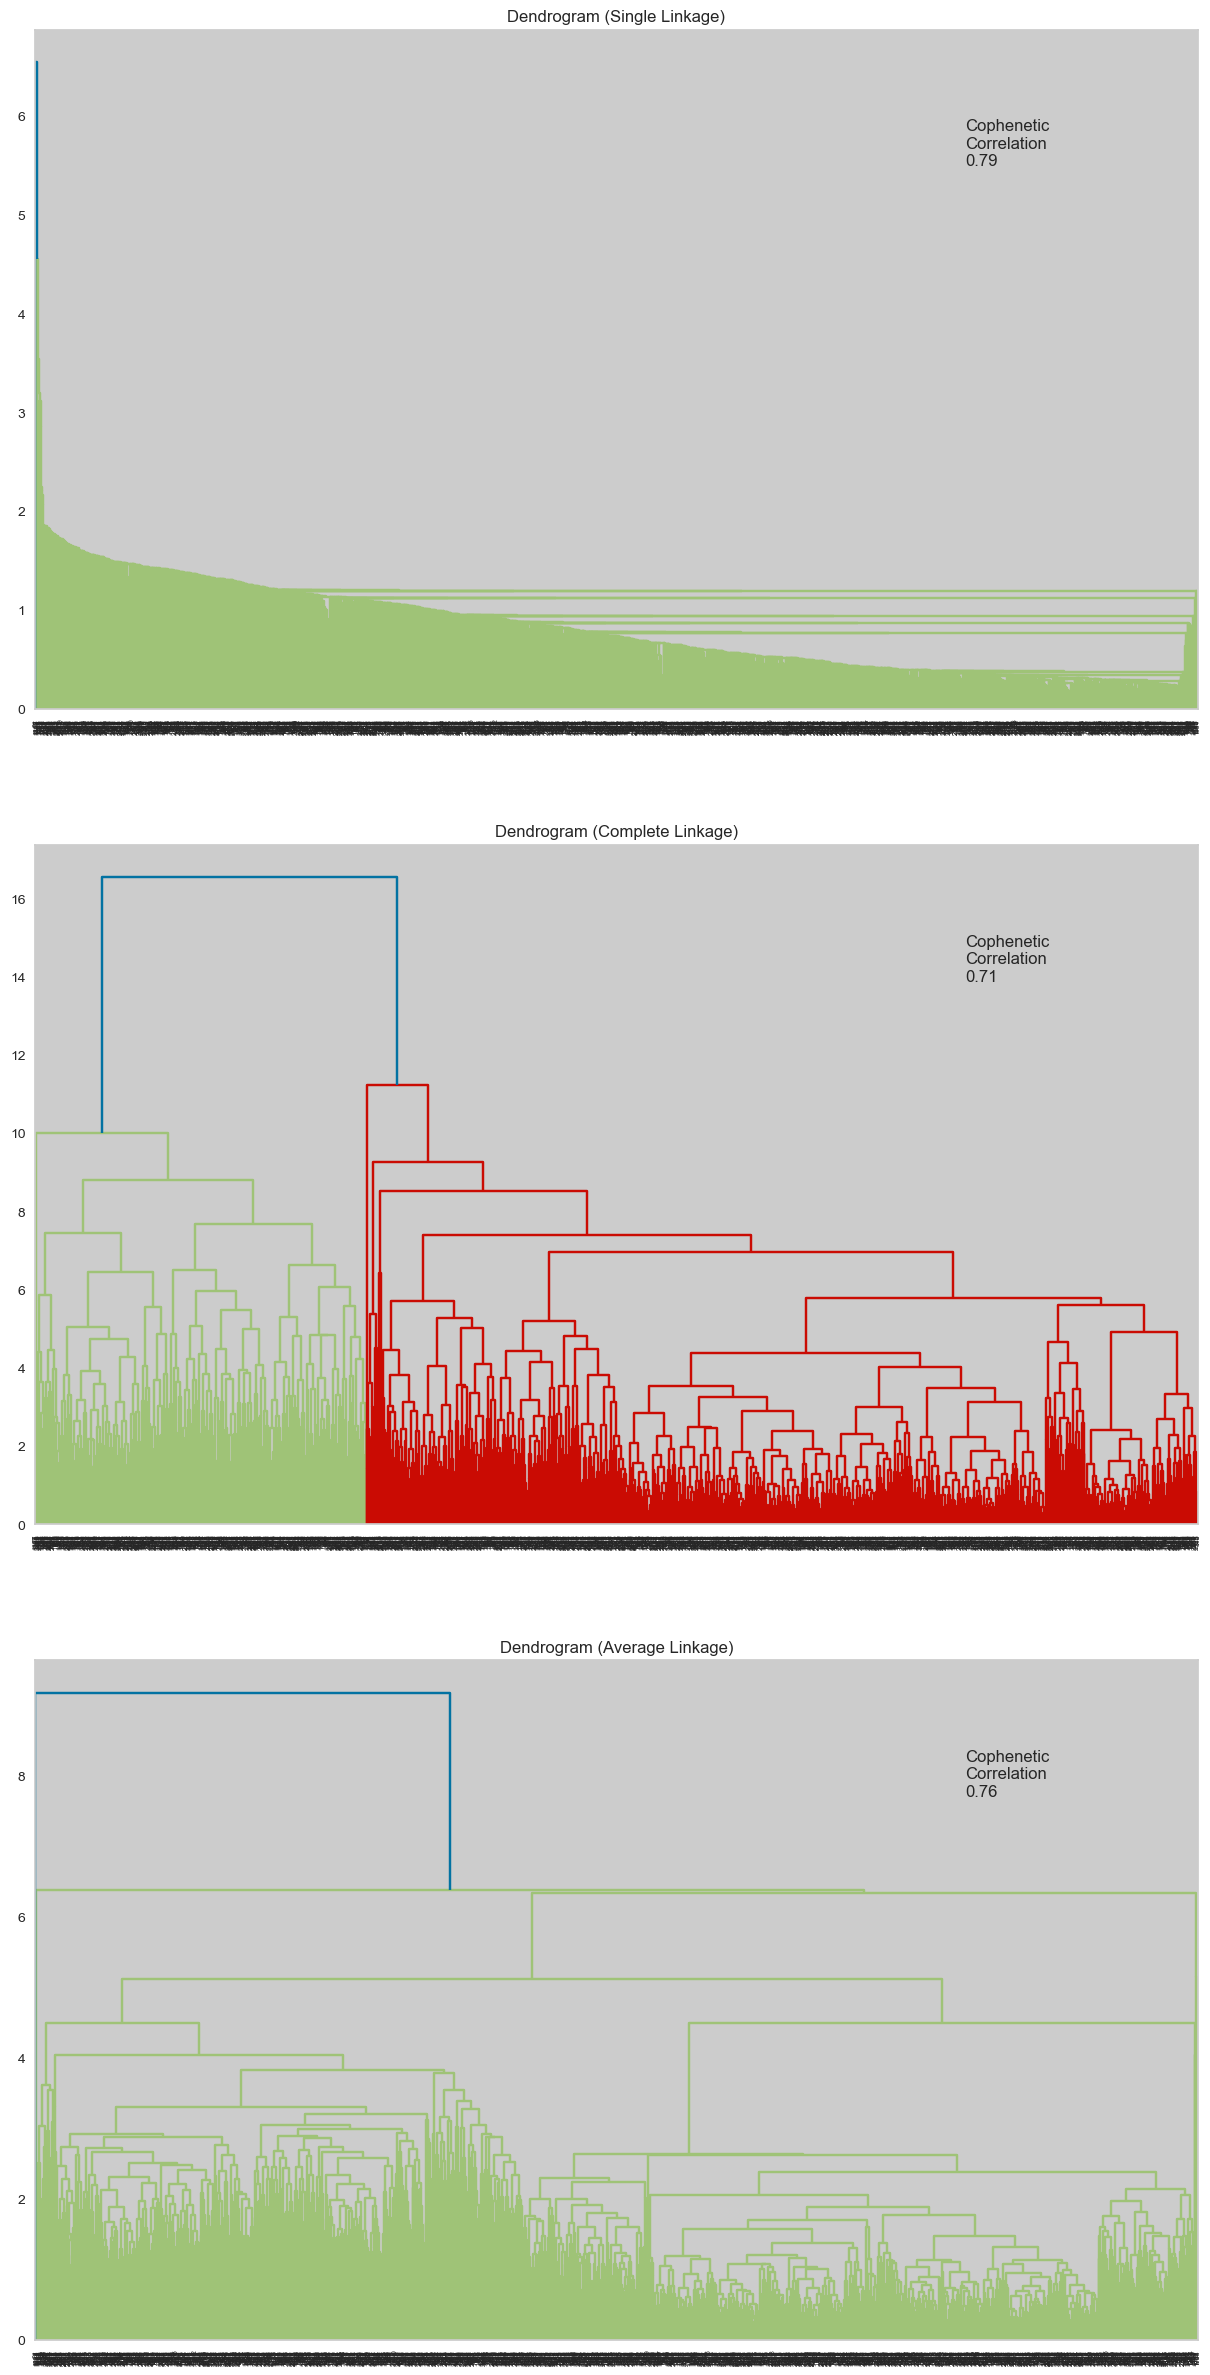

In [109]:
# Plotting the dendrogram for Chebyshev distance with linkages single, complete and average. 

linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Chebyshev", method=method)                  

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

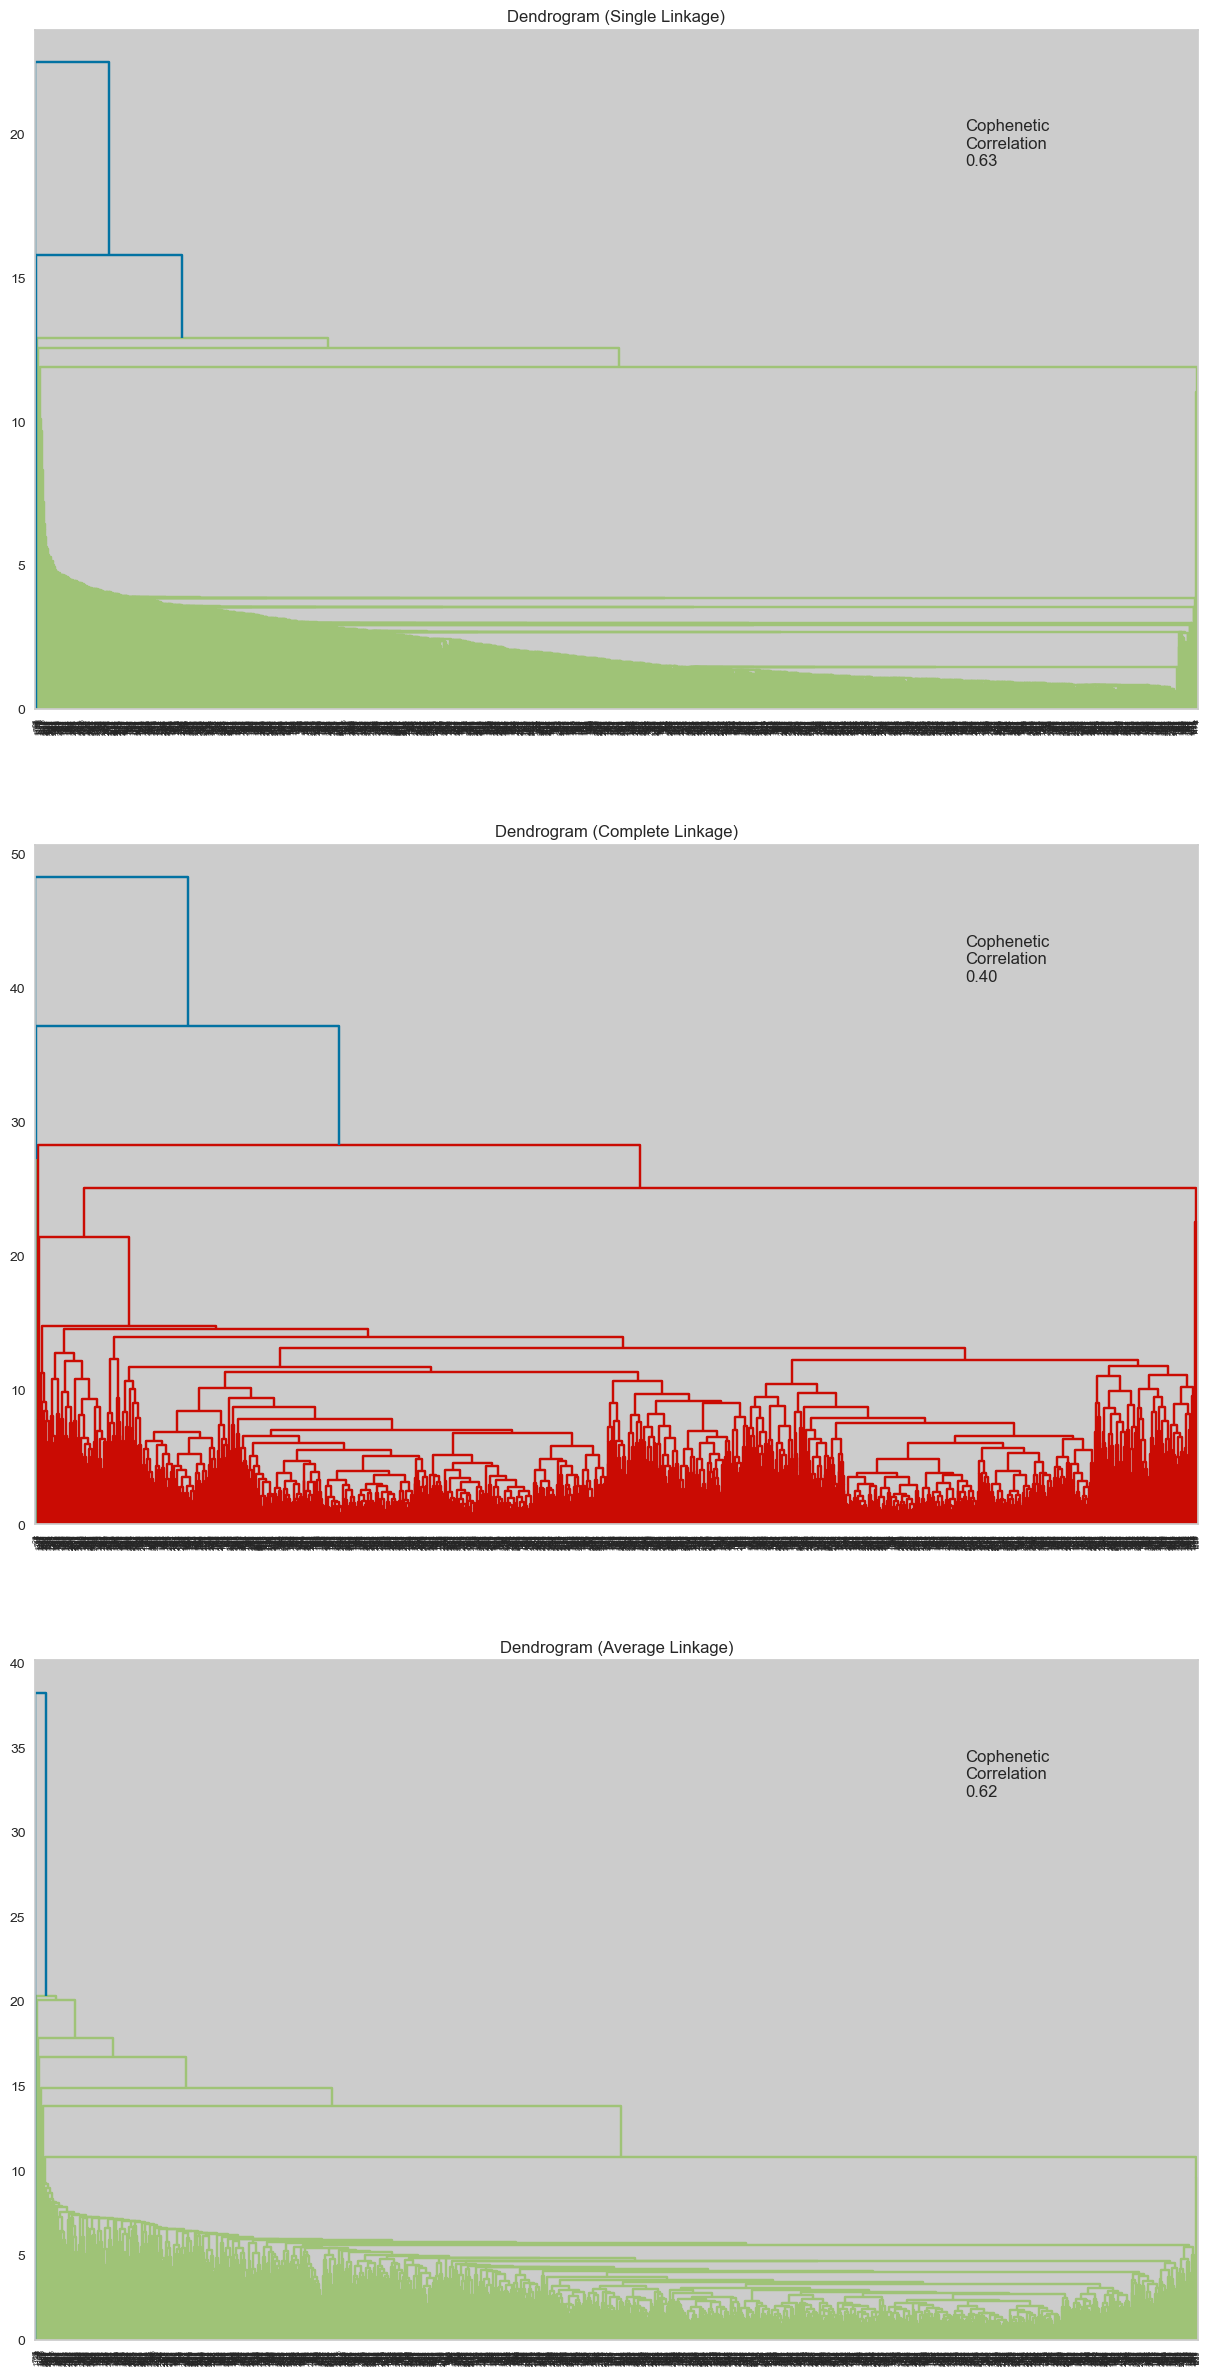

In [110]:
# Plotting the dendrogram for Mahalanobis distance with linkages single, complete and average. 
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Mahalanobis", method=method)                  

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

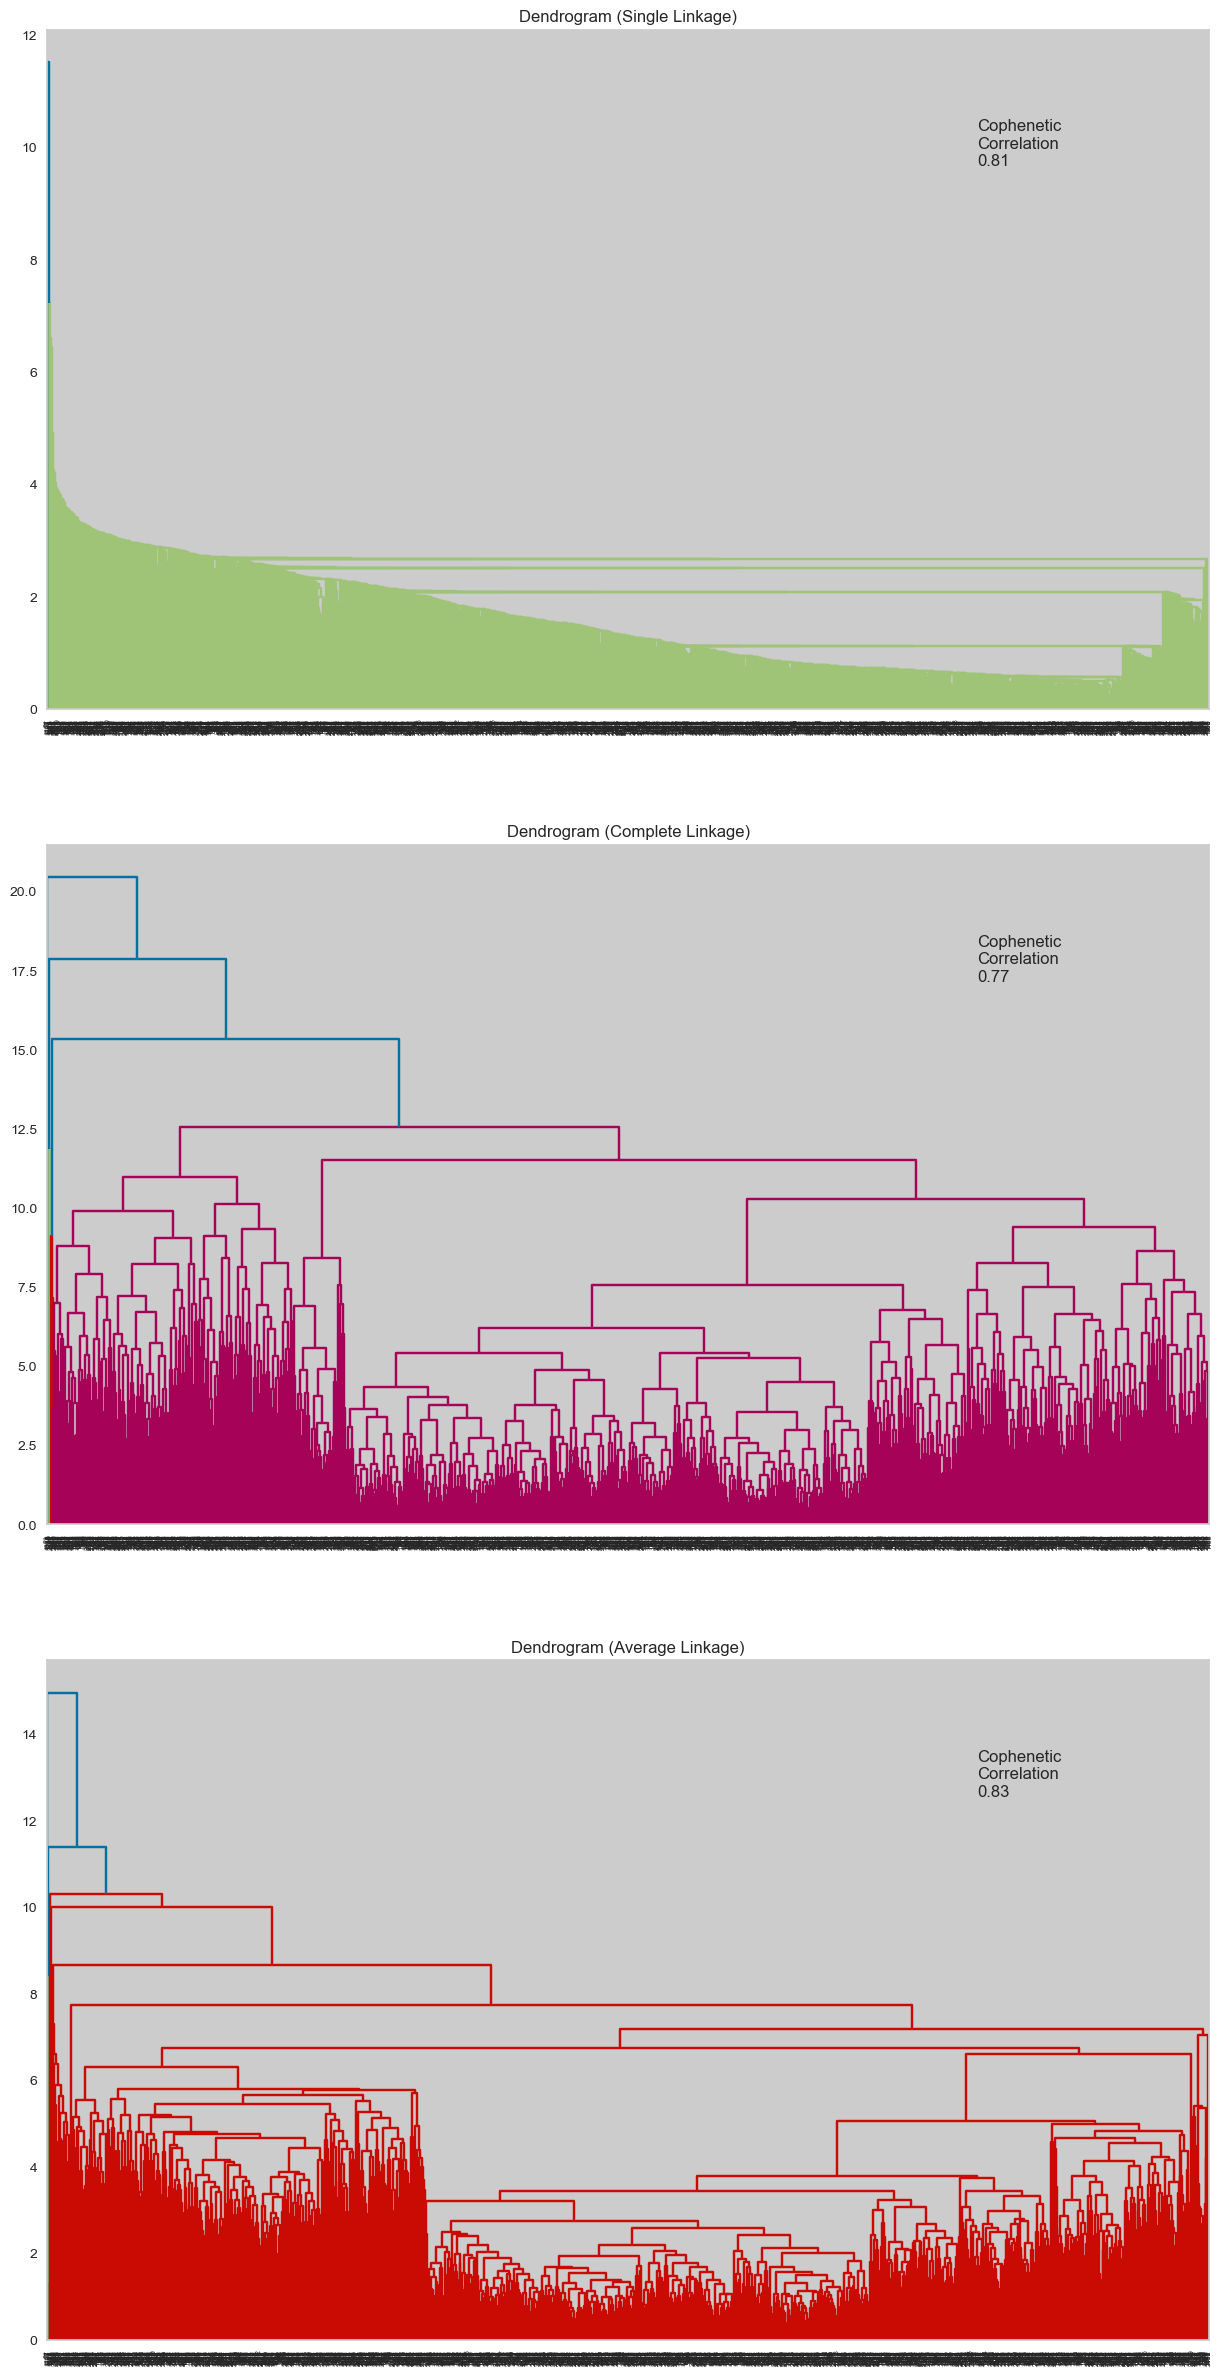

In [111]:
# Plotting the dendrogram for Euclidean distance with linkages single, complete, average and ward. 
# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Euclidean", method=method)                  

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [112]:
# Initializing Agglomerative Clustering with affinity (distance) as Euclidean, linkage as 'Ward' with clusters=3
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward',) 

# Fitting on data_pca
HCmodel.fit(data_pca)                                                                  

AgglomerativeClustering(n_clusters=3)

In [113]:
# Adding labels
data_pca['HC_segments'] = HCmodel.labels_
data['HC_segments'] = HCmodel.labels_
data_model['HC_segments'] = HCmodel.labels_

<AxesSubplot:>

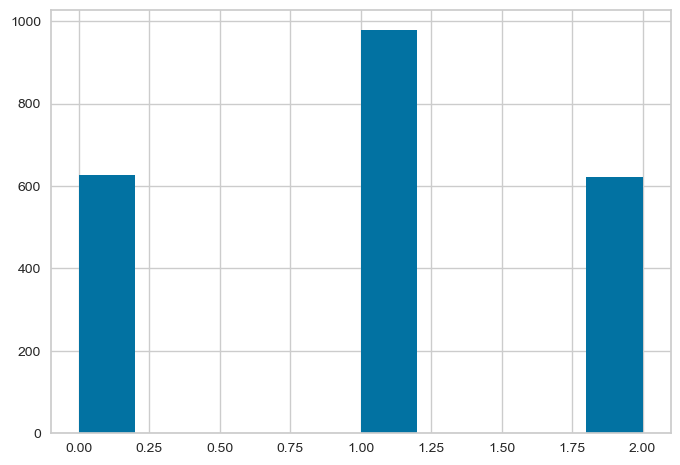

In [114]:
# Checking distribution
data_model["HC_segments"].hist()

**Let's visualize the clusters using PCA.**

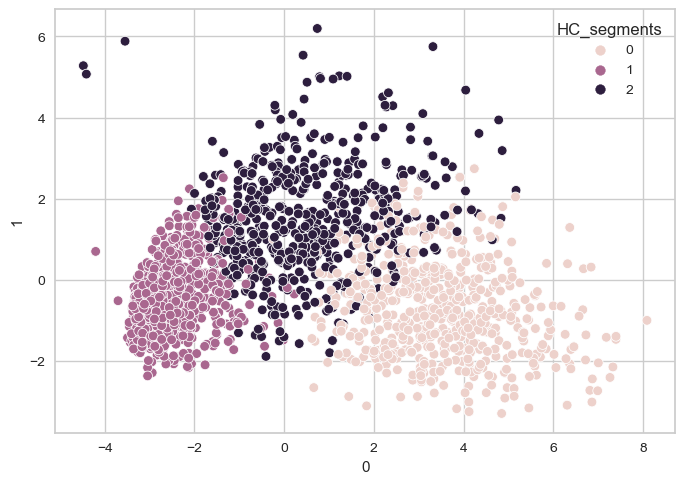

In [115]:
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
    
PCA_PLOT(0, 1, data_pca, "HC_segments")

### **Cluster Profiling**

In [116]:
hc_cluster_profile = data.groupby('HC_segments').mean()

In [117]:
# Highlighting the maximum average value among all the clusters for each of the variables
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

**Let's plot the boxplot**

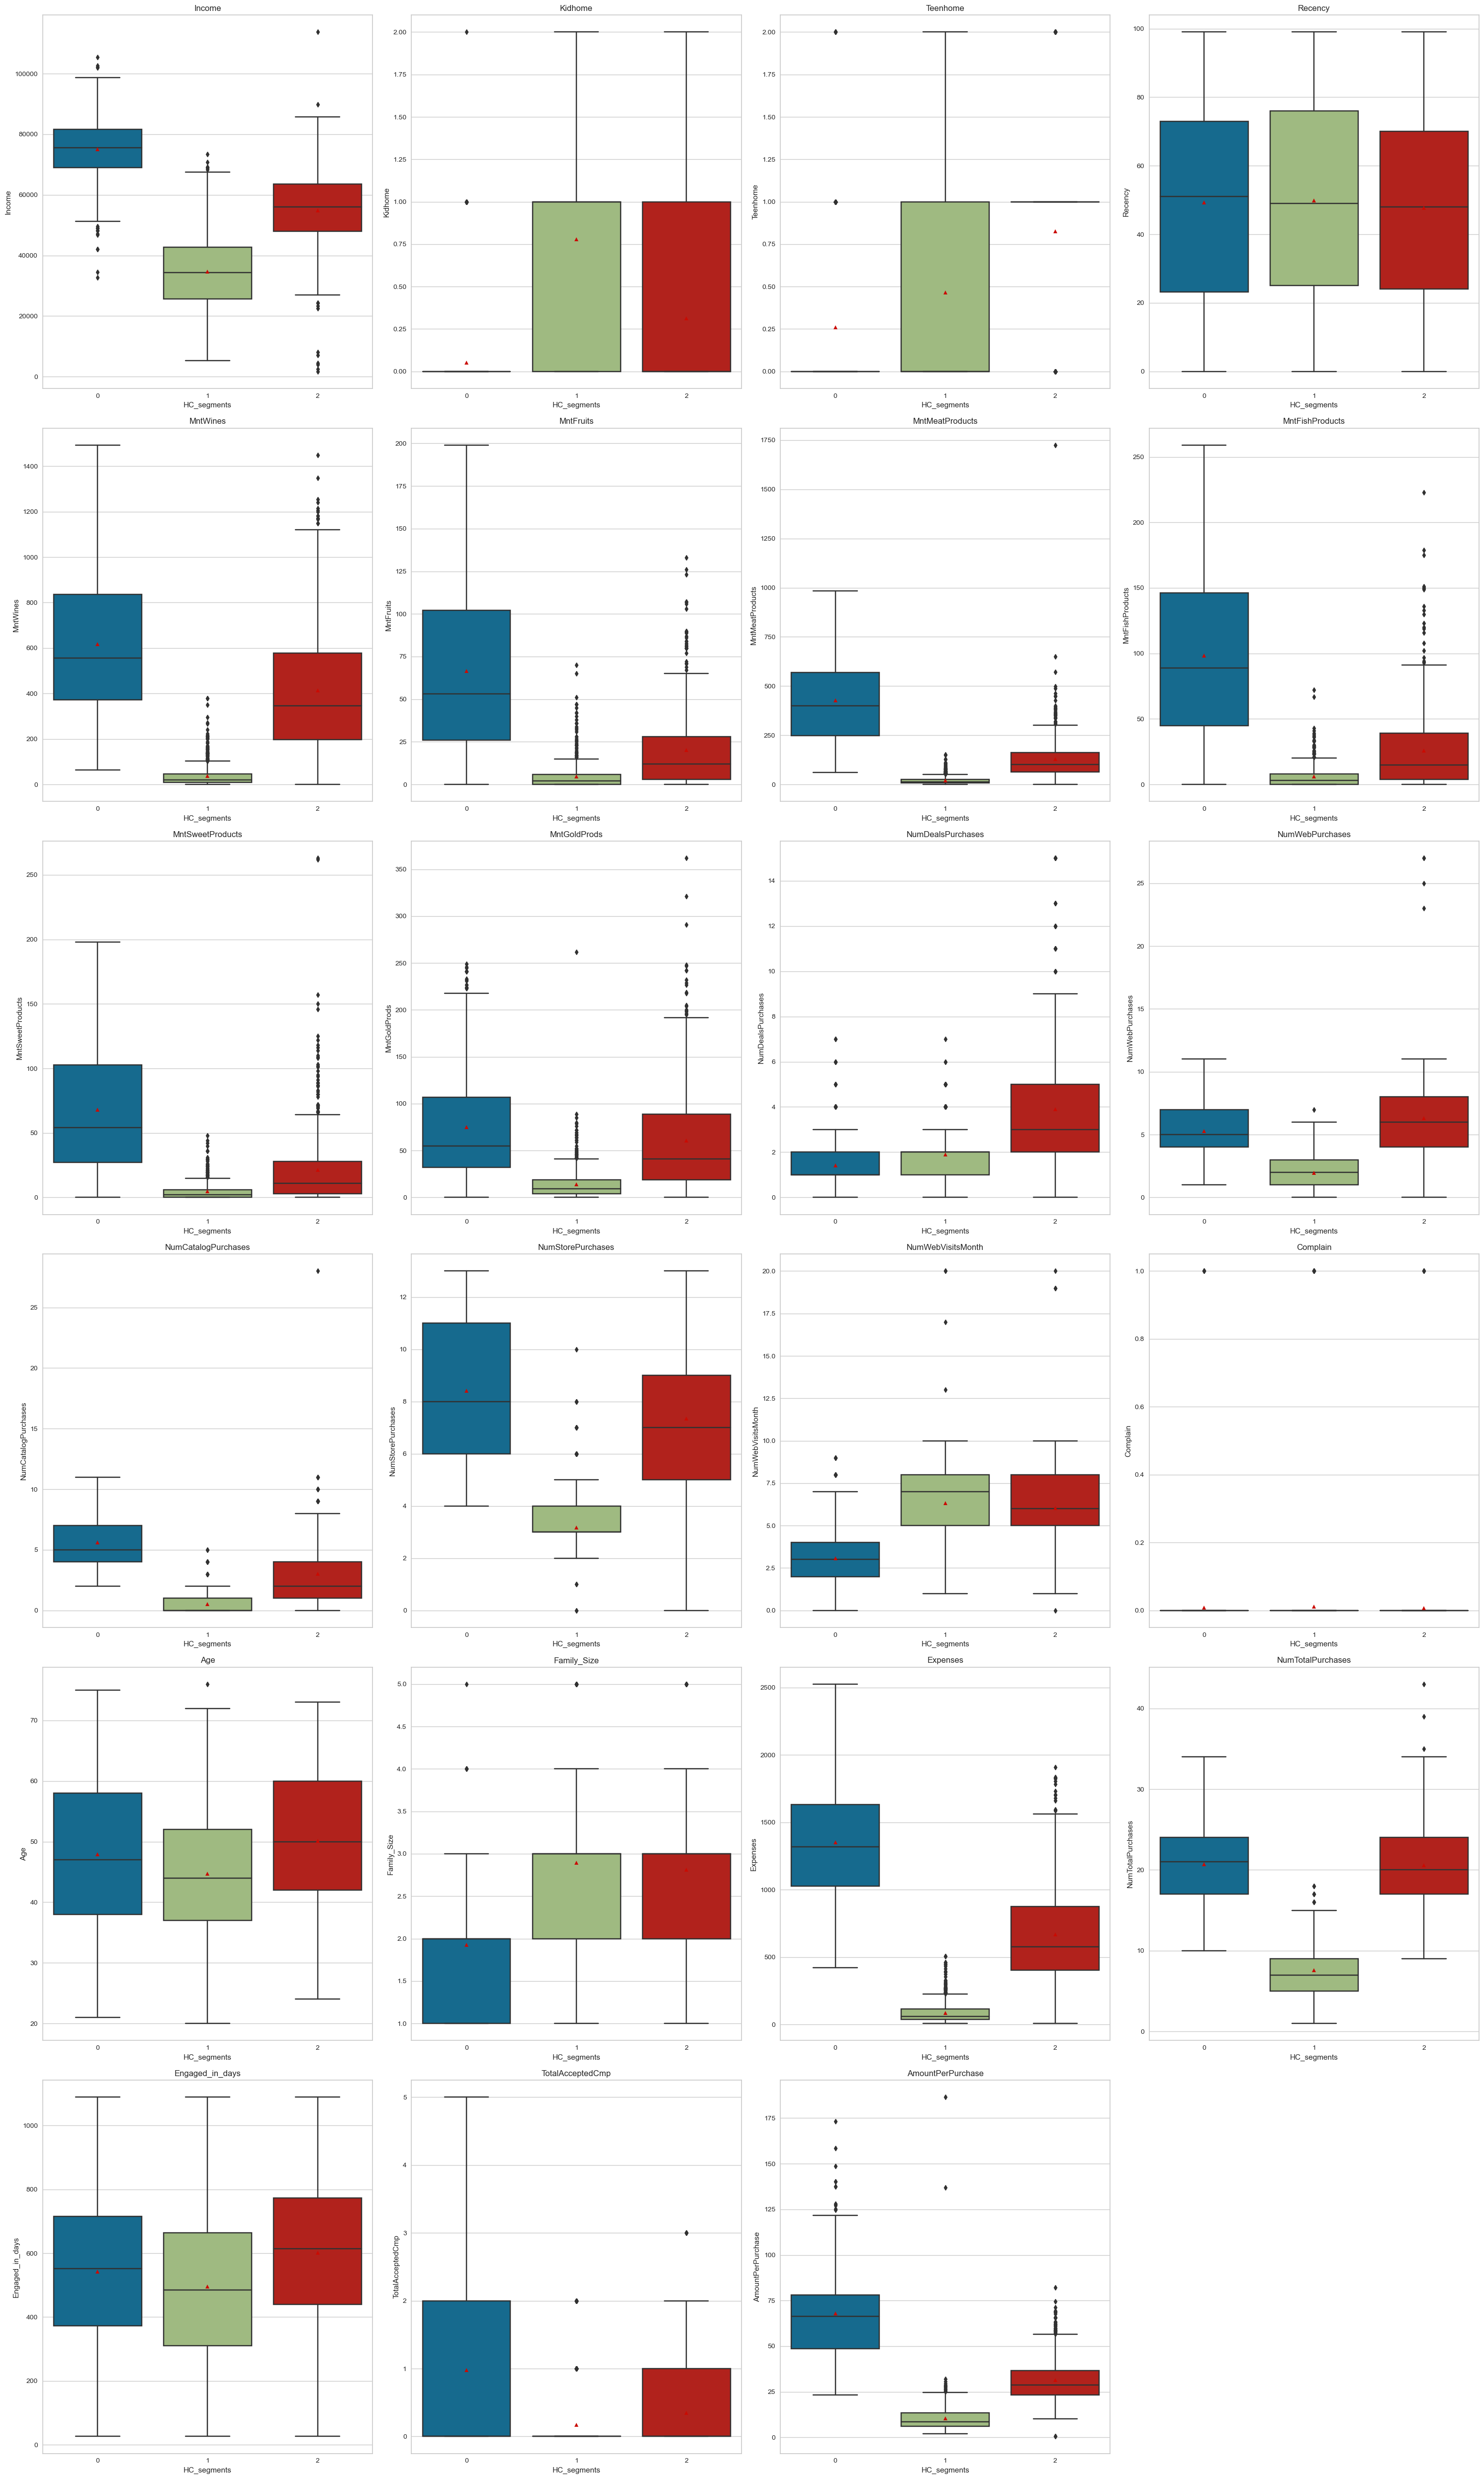

In [118]:
# Creating boxplot for each of the variables
plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=data[variable], x=data['HC_segments'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Our agglomerative clustering profiles have segmented our customers into 3 distinct purchasing groups. Much like K-Means = 3, our segments consist of low, medium, and high income/expenditure demographics.**

**Cluster 0**
*Consists of individuals high-frequency/high-spending customers. These are the highest purchasers of all products who are the most active via Catalog and in-Store. They are the least likely to frequent the web but are the 2nd highest group to make purchases via web. They accept campaigns, on average, more than any other group. They are high-income individuals with the smallest family size.*

**Cluster 1**
*Consists of relatively low-frequency/low-spending customers. They consist of the most web traffic, but a substantially low number of web purchases. They are relatively inactive in terms of Catalog purchases and make most of their purchases in-Store. They are our youngest and lowest-income demographic with a higher likelihood of having young children*

**Cluster 2**
*Consists of moderate-frequency/moderate-spending customers. They make the most purchases via web, with the 2nd highest frequency of in-store purchases. They also the most likely to act on deals and discounts. Their activity via Catalog is moderate.

In [119]:
# Dropping labels 
data_pca.drop(labels = 'HC_segments', axis=1, inplace=True)
data.drop(labels = 'HC_segments', axis=1, inplace=True)
data_model.drop(labels = 'HC_segments', axis=1, inplace=True)

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

The approach we can follow is basically trying different combinations of values and finding the silhouette score for each of them.

In [120]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [121]:
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j                
            high_i_j[0] = i
            high_i_j[1] = j
            high_silhouette_avg = silhouette_avg
   

For eps value =2 For min sample =6 The average silhoutte_score is : 0.1357134335873222
For eps value =2 For min sample =20 The average silhoutte_score is : 0.34654515284213666
For eps value =3 For min sample =6 The average silhoutte_score is : 0.2854116774566223
For eps value =3 For min sample =20 The average silhoutte_score is : 0.3394116238771046


In [122]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0.34654515284213666 for eps = 2 and min sample = 20


In [123]:
# Applying DBSCAN using the above hyperparameter values
dbs = DBSCAN(eps=2, min_samples = 20)

In [124]:
# Fitting labels
data_model['db_segments'] = dbs.fit_predict(data_model)
data_pca['db_segments'] = dbs.fit_predict(data_pca)
data['db_segments'] = dbs.fit_predict(data_model)

<AxesSubplot:>

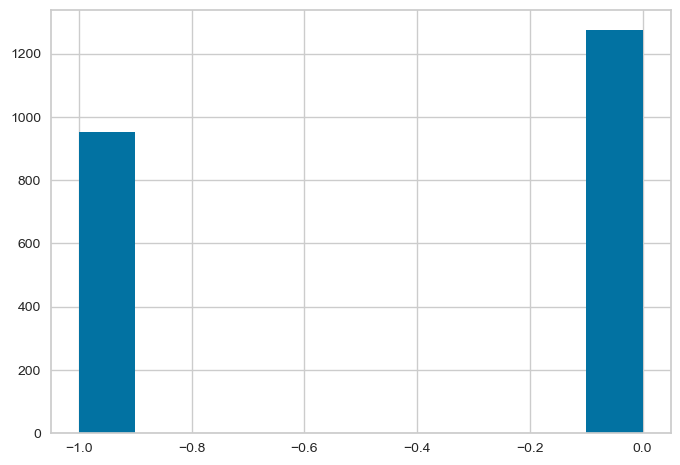

In [125]:
# Checking distribution
data_pca["db_segments"].hist()

**Let's visualize the clusters using PCA.**

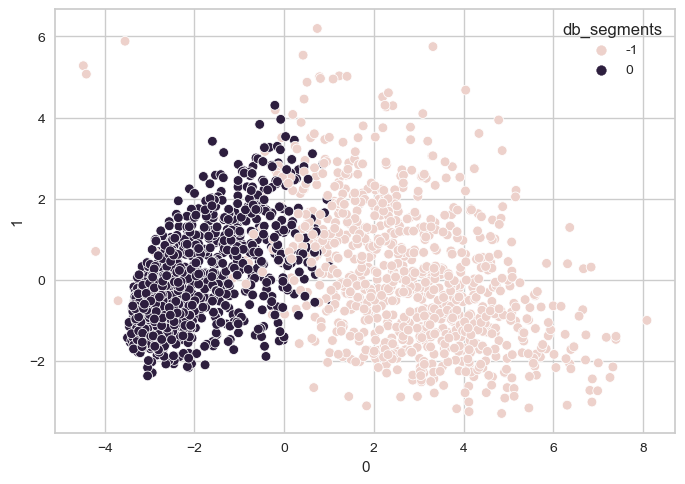

In [126]:
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
    
PCA_PLOT(0, 1, data_pca, "db_segments")

**With eps = 2 and min_samples = 20, DBSCAN provides us with 2 relatively distinct clusters which won't do much in the way of determining customer behaviors.**

In [127]:
# Dropping labels 
data_pca.drop(labels = 'db_segments', axis=1, inplace=True)
data.drop(labels = 'db_segments', axis=1, inplace=True)
data_model.drop(labels = 'db_segments', axis=1, inplace=True)

## **Gaussian Mixture Model**

**Let's find the silhouette score for K=5 in Gaussian Mixture**

In [128]:
# Iterating best silhouette scores for GMM
gmm_sil_score = []                                                             
gmm_cluster_list = range(3, 9)                                                 
for n_clusters in gmm_cluster_list:
    gmm_clusterer = GaussianMixture(n_components=n_clusters, random_state=1)
    preds = gmm_clusterer.fit_predict(data_pca) 
    
    # Calculating silhouette score
    gmm_score = silhouette_score(data_pca, preds)  
    
    # Appending silhouette score to empty list created above
    gmm_sil_score.append(score)         
    
    # Printing the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, gmm_score))

For n_clusters = 3, the silhouette score is 0.1643269028413252)
For n_clusters = 4, the silhouette score is 0.158627747208099)
For n_clusters = 5, the silhouette score is 0.12600984134033924)
For n_clusters = 6, the silhouette score is 0.07404449028835082)
For n_clusters = 7, the silhouette score is 0.05550537931273416)
For n_clusters = 8, the silhouette score is 0.02342179125910562)


**Our silhouette scores with GMM are all quite low. The biggest drop in efficacy is between 5 and 6, and 3 components will not be enough for an in-depth segmentation of our dataset. For better segmentation results let us initalize GMM with 5 components.**

In [129]:
# Initializing GMM
gmm = GaussianMixture(n_components = 5, random_state = 1) 
gmm.fit(data_pca)
preds = gmm.predict(data_pca)                              

In [130]:
# Fitting labels
data_pca['gmm_segments'] = preds
data_model['gmm_segments'] = preds
data['gmm_segments'] = preds

<AxesSubplot:>

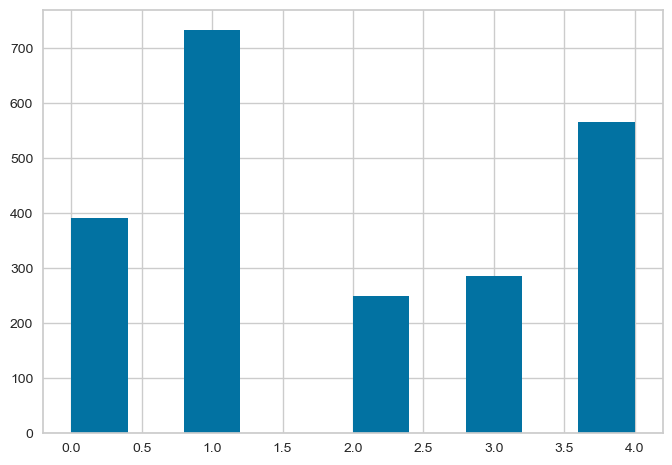

In [131]:
# Checking distribution
data_model["gmm_segments"].hist()

**Let's visualize the clusters using PCA.**

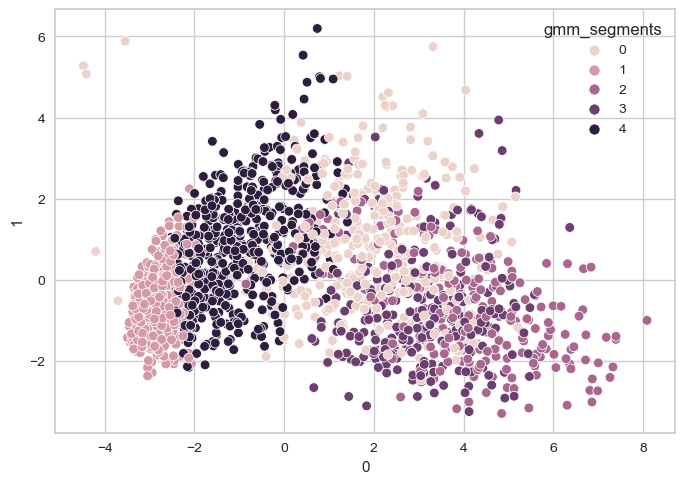

In [132]:
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
    
PCA_PLOT(0, 1, data_pca, "gmm_segments")

### **Cluster Profiling**

In [133]:
gmm_cluster_profile = data.groupby('gmm_segments').mean()

In [134]:
# Highlighting the maximum average value among all the clusters for each of the variables
gmm_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

**Let's plot the boxplot**

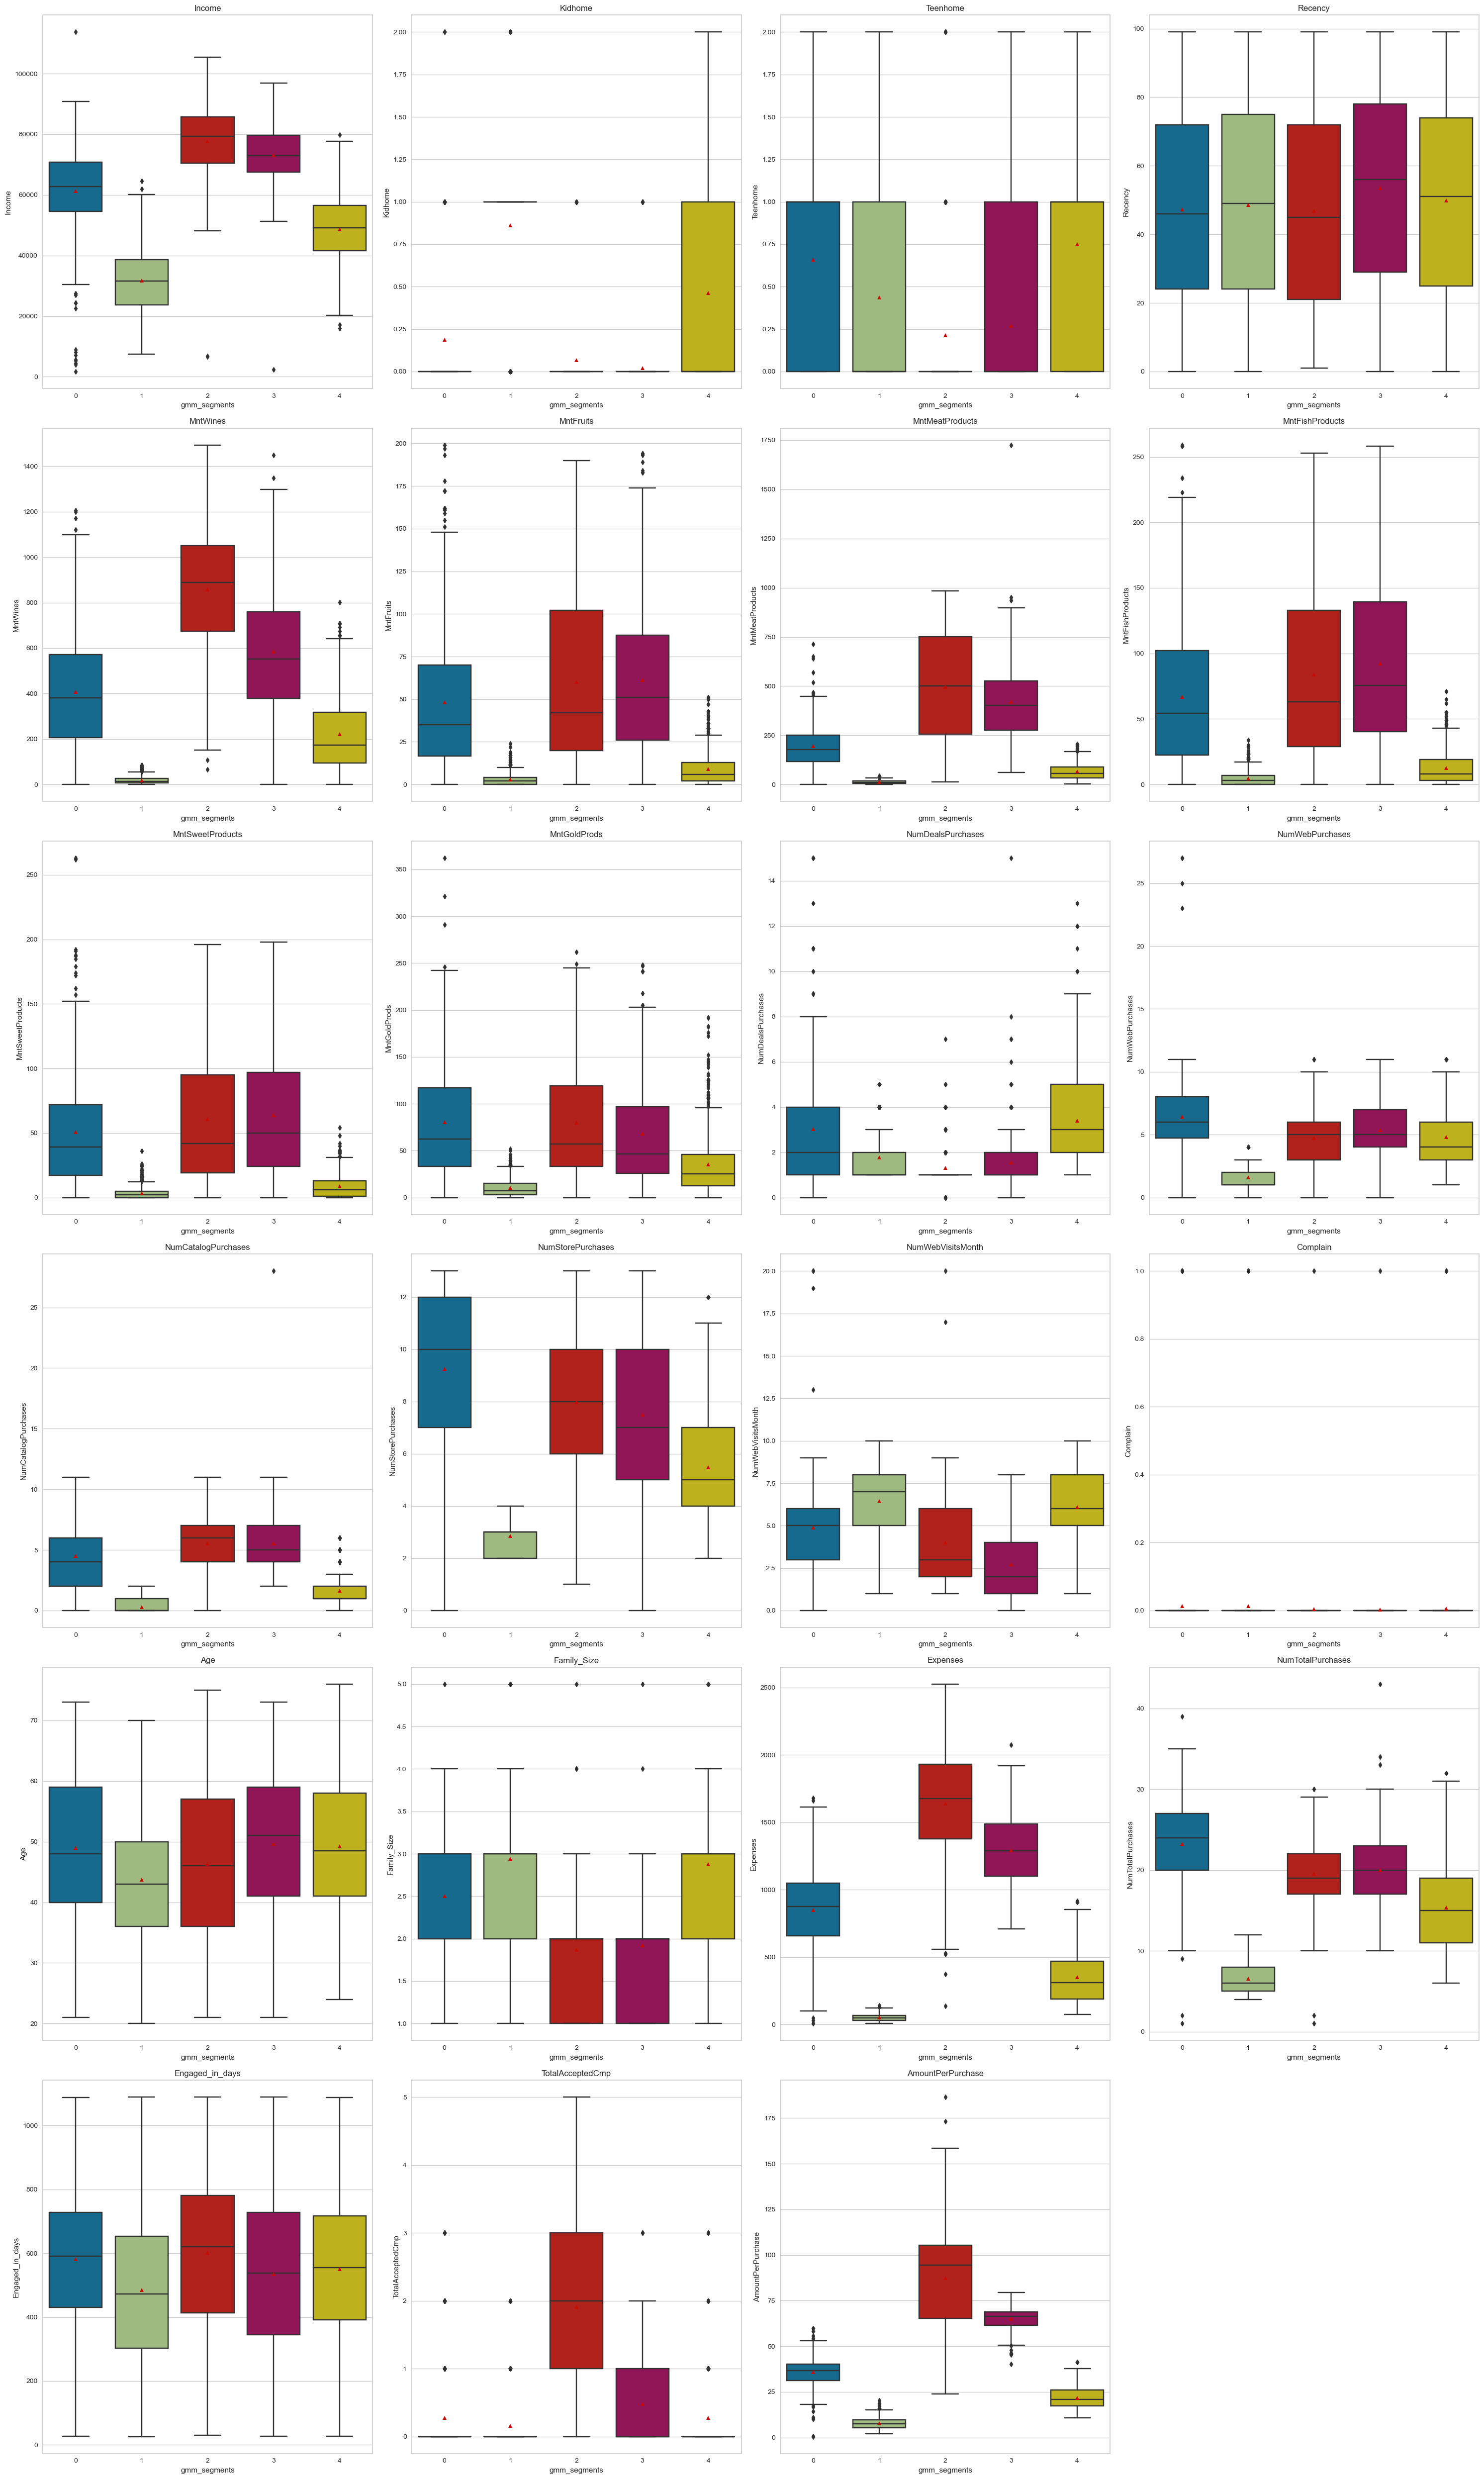

In [135]:
# Creating boxplot for each of the variables
plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y=data[variable], x=data['gmm_segments'],showmeans=True)  
    plt.tight_layout()  
    plt.title(variable)

plt.show()

### **Cluster Characteristics**

**GMM** did well in segmenting our customers based on Expenses, and Amount Per Purchase. These results are similar to K-Means = 5 but with a slightly better distribution as shown in the histogram. We also have better distinction for how long they have been a customer, shown in 'Engaged_in_days'.

Despite this, K-Means = 5 wins out as it provides more distinct information into the customers' purchasing methods and which products they are buying.

## **Conclusion and Recommendations**


- Through the use of silhouette scores, elbow plots, cophenetic correlation, hyperparameter tuning, and trial-and-error methods we were able to derive valuable insight into customer purchasing behaviors through segmentation. 
- Agglomerative Clustering with components = 3 and K-Means = 3 segmented our dataset into 3 distinct clusters of low, medium, and high purchasers while providing more demographic information. 
- Models such as GMM, K-Medoids, and K-Means = 5 performed similarly, but K-Means = 5 provided us with clear distinctions as to how customers are shopping, what products they're more likely to purchase, and with what frequency/average order value - all while maintaing important demographic information.

- By analyzing the cluster profiles of various models we see our algorithms segmenting customers based on a variety of different features/values.